<p style="font-size:36px;text-align:center"> <b>Personalized cancer diagnosis</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from datetime import datetime

<h2>3.1. Reading Data</h2>

<h3>3.1.1. Reading Gene and Variation Data</h3>

In [2]:
data = pd.read_csv('training_variants')
print('Number of data points : ', data.shape[0])
print('Number of features : ', data.shape[1])
print('Features : ', data.columns.values)
data.head()

Number of data points :  3321
Number of features :  4
Features :  ['ID' 'Gene' 'Variation' 'Class']


ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

<p>
    training/training_variants is a comma separated file containing the description of the genetic mutations used for training. <br>
    Fields are 
    <ul>
        <li><b>ID : </b>the id of the row used to link the mutation to the clinical evidence</li>
        <li><b>Gene : </b>the gene where this genetic mutation is located </li>
        <li><b>Variation : </b>the aminoacid change for this mutations </li>
        <li><b>Class :</b> 1-9 the class this genetic mutation has been classified on</li>
    </ul>

<h3>3.1.2. Reading Text Data</h3>

In [3]:
# note the seprator in this file
data_text =pd.read_csv("training_text",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print('Number of data points : ', data_text.shape[0])
print('Number of features : ', data_text.shape[1])
print('Features : ', data_text.columns.values)
data_text.head()

Number of data points :  3321
Number of features :  2
Features :  ['ID' 'TEXT']


ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

<h3>3.1.3. Preprocessing of text</h3>

In [4]:
# loading stop words from nltk library
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        # replace every special char with space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        # replace multiple spaces with single space
        total_text = re.sub('\s+',' ', total_text)
        # converting all the chars into lower-case.
        total_text = total_text.lower()
        
        for word in total_text.split():
        # if the word is a not a stop word then retain that word from the data
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [5]:
#text processing stage.
start_time = time.clock()
for index, row in data_text.iterrows():
    if type(row['TEXT']) is str:
        nlp_preprocessing(row['TEXT'], index, 'TEXT')
    else:
        print("there is no text description for id:",index)
print('Time took for preprocessing the text :',time.clock() - start_time, "seconds")

there is no text description for id: 1109
there is no text description for id: 1277
there is no text description for id: 1407
there is no text description for id: 1639
there is no text description for id: 2755
Time took for preprocessing the text : 39.248337 seconds


In [6]:
#merging both gene_variations and text data based on ID
result = pd.merge(data, data_text,on='ID', how='left')
result.head()

ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                TEXT  
0  cyclin dependent kinases cdks regulate variety...  
1  abstract background non small cell lung cancer...  
2  abstract background non small cell lung cancer...  
3  recent evidence demonstrated acquired uniparen...  
4  oncogenic mutations monomeric casitas b lineag...

In [7]:
result[result.isnull().any(axis=1)]

ID    Gene             Variation  Class TEXT
1109  1109   FANCA                S1088F      1  NaN
1277  1277  ARID5B  Truncating Mutations      1  NaN
1407  1407   FGFR3                 K508M      6  NaN
1639  1639    FLT1         Amplification      6  NaN
2755  2755    BRAF                 G596C      7  NaN

In [8]:
result.loc[result['TEXT'].isnull(),'TEXT'] = result['Gene'] +' '+result['Variation']

In [9]:
result[result['ID']==1109]

ID   Gene Variation  Class          TEXT
1109  1109  FANCA    S1088F      1  FANCA S1088F

<h3>3.1.4. Test, Train and Cross Validation Split</h3>

<h4>3.1.4.1. Splitting data into train, test and cross validation (64:20:16)</h4>

In [10]:
y_true = result['Class'].values
result.Gene      = result.Gene.str.replace('\s+', '_')
result.Variation = result.Variation.str.replace('\s+', '_')

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [11]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])

Number of data points in train data: 2124
Number of data points in test data: 665
Number of data points in cross validation data: 532


<h4>3.1.4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

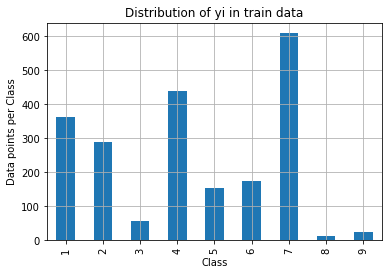

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)
--------------------------------------------------------------------------------


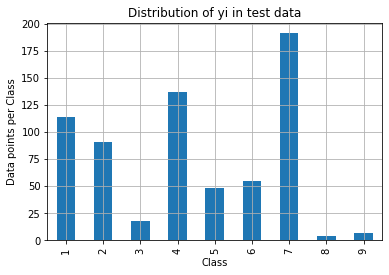

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)
--------------------------------------------------------------------------------


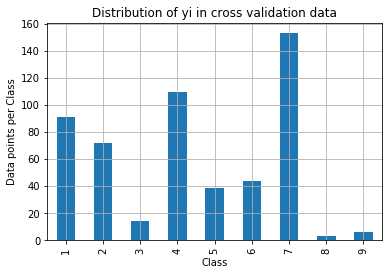

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [12]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = train_df['Class'].value_counts().sort_index()
test_class_distribution = test_df['Class'].value_counts().sort_index()
cv_class_distribution = cv_df['Class'].value_counts().sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')


<h2>3.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the NINE class probabilites randomly such that they sum to 1. </p>

In [13]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    B =(C/C.sum(axis=0))
    
    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 2.4978985738972366
Log loss on Test Data using Random Model 2.4325776116286435
-------------------- Confusion matrix --------------------


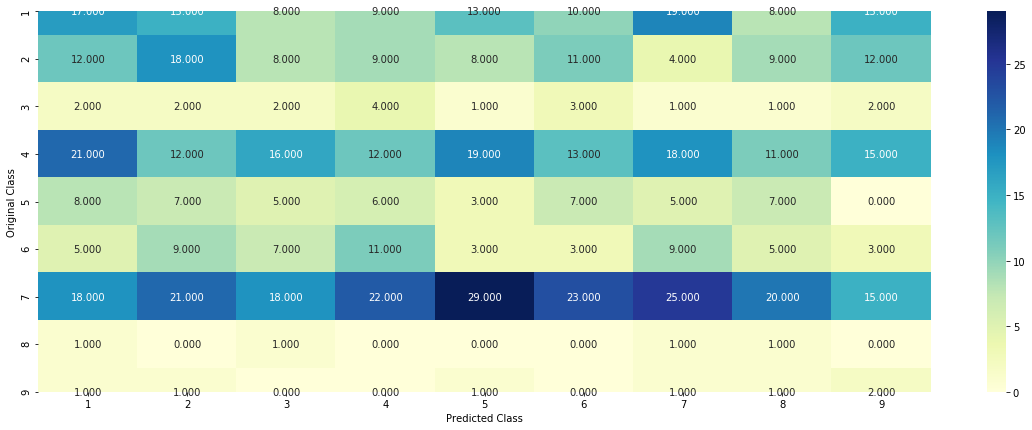

-------------------- Precision matrix (Columm Sum=1) --------------------


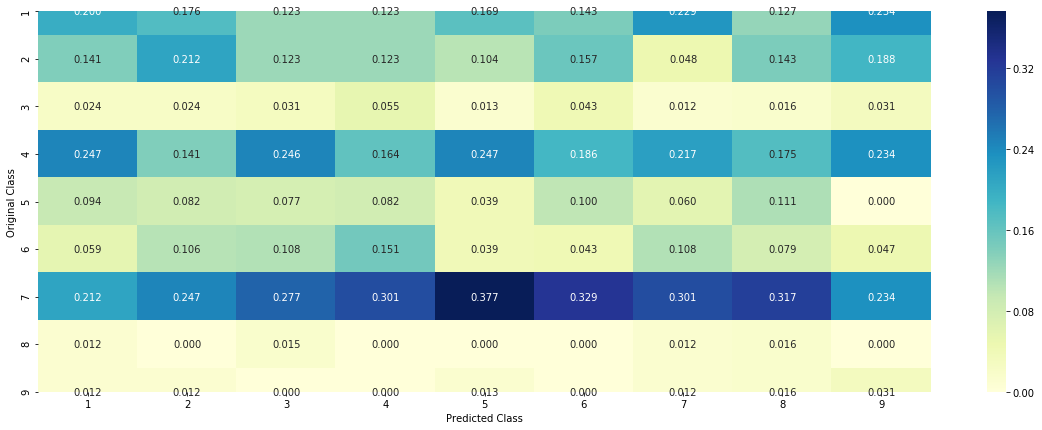

-------------------- Recall matrix (Row sum=1) --------------------


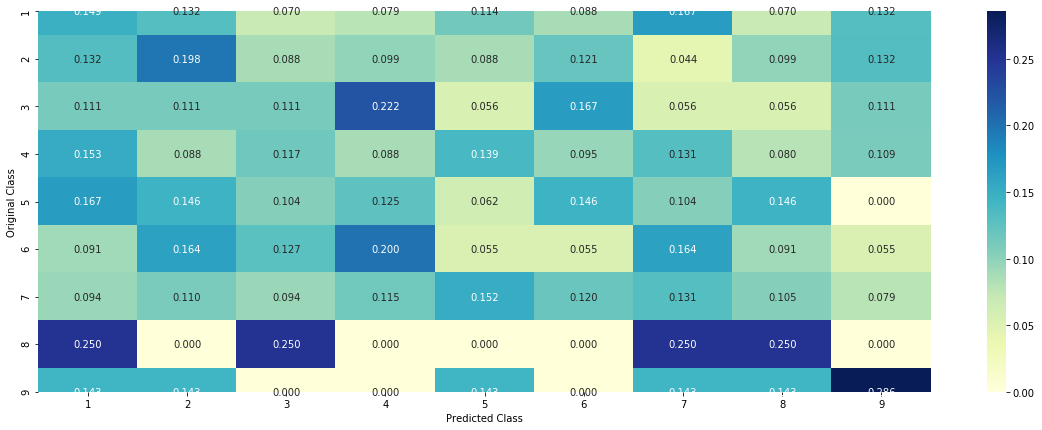

In [14]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h2>3.3 Univariate Analysis</h2>

In [15]:
# code for response coding with Laplace smoothing.

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
 
    value_count = train_df[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):

            cls_cnt = train_df.loc[(train_df['Class']==k) & (train_df[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = train_df[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

when we caculate the probability of a feature belongs to any particular class, we apply laplace smoothing
<li>(numerator + 10\*alpha) / (denominator + 90\*alpha) </li>

<h3>3.2.1 Univariate Analysis on Gene Feature</h3>

<p style="font-size:18px;"> <b>Q1.</b> Gene, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Gene is a categorical variable </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [16]:
unique_genes = train_df['Gene'].value_counts()
print('Number of Unique Genes :', unique_genes.shape[0])
# the top 10 genes that occured most
print(unique_genes.head(10))

Number of Unique Genes : 238
BRCA1    173
TP53     111
EGFR      87
PTEN      79
BRCA2     72
KIT       61
BRAF      57
ERBB2     47
ALK       46
TSC2      35
Name: Gene, dtype: int64


In [17]:
print("Ans: There are", unique_genes.shape[0] ,"different categories of genes in the train data, and they are distibuted as follows",)

Ans: There are 238 different categories of genes in the train data, and they are distibuted as follows


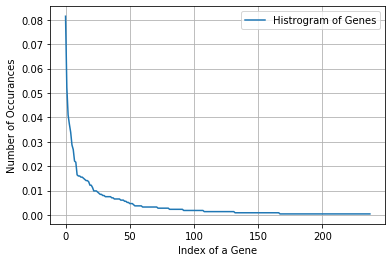

In [18]:
s = sum(unique_genes.values);
h = unique_genes.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


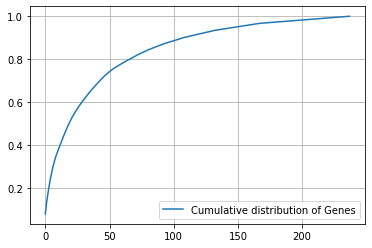

In [19]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q3.</b> How to featurize this Gene feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>there are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will choose the appropriate featurization based on the ML model we use.  For this problem of multi-class classification with categorical features, one-hot encoding is better for Logistic regression while response coding is better for Random Forests. </p>

In [20]:
#response-coding of the Gene feature
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", train_df))
# test gene feature
test_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", test_df))
# cross validation gene feature
cv_gene_feature_responseCoding = np.array(get_gv_feature(alpha, "Gene", cv_df))

In [21]:
print("train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature:", train_gene_feature_responseCoding.shape)

train_gene_feature_responseCoding is converted feature using respone coding method. The shape of gene feature: (2124, 9)


In [22]:
# one-hot encoding of Gene feature.
gene_vectorizer = CountVectorizer()

train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(train_df['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(test_df['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(cv_df['Gene'])

In [23]:
train_df['Gene'].head()

1663     FLT3
2421    BRCA1
2157     PTEN
2875    BRCA2
2307     JAK1
Name: Gene, dtype: object

In [24]:
print("train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_gene_feature_onehotCoding.shape)

train_gene_feature_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (2124, 238)


<p style="font-size:18px;"> <b>Q4.</b> How good is this gene feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Gene feature (one hot encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.2470099437550046
For values of alpha =  0.0001 The log loss is: 1.2070016107321717
For values of alpha =  0.001 The log loss is: 1.228728645143541
For values of alpha =  0.01 The log loss is: 1.3273906054208207
For values of alpha =  0.1 The log loss is: 1.4322272557020783
For values of alpha =  1 The log loss is: 1.4777093735809081


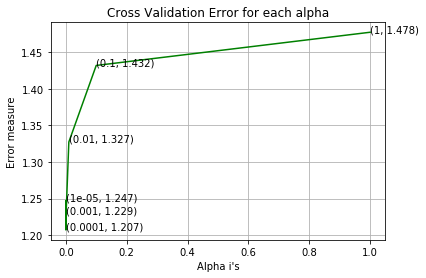

For values of best alpha =  0.0001 The train log loss is: 1.010720378304358
For values of best alpha =  0.0001 The cross validation log loss is: 1.2070016107321717
For values of best alpha =  0.0001 The test log loss is: 1.157870959131667


In [25]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q5.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

In [26]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=test_df[test_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]
cv_coverage=cv_df[cv_df['Gene'].isin(list(set(train_df['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  238  genes in train dataset?
Ans
1. In test data 646 out of 665 : 97.14285714285714
2. In cross validation data 518 out of  532 : 97.36842105263158


<h3>3.2.2 Univariate Analysis on Variation Feature</h3>

<p style="font-size:18px;"> <b>Q7.</b> Variation, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Variation is a categorical variable </p>
<p style="font-size:18px;"> <b>Q8.</b> How many categories are there?</p>

In [27]:
unique_variations = train_df['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1933
Truncating_Mutations    53
Deletion                50
Amplification           38
Fusions                 17
Overexpression           6
Q61H                     3
Q61R                     3
G12V                     3
G13V                     2
T58I                     2
Name: Variation, dtype: int64


In [28]:
print("Ans: There are", unique_variations.shape[0] ,"different categories of variations in the train data, and they are distibuted as follows",)

Ans: There are 1933 different categories of variations in the train data, and they are distibuted as follows


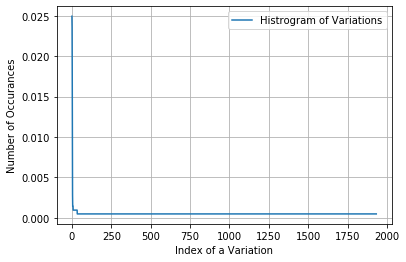

In [29]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02495292 0.04849341 0.06638418 ... 0.99905838 0.99952919 1.        ]


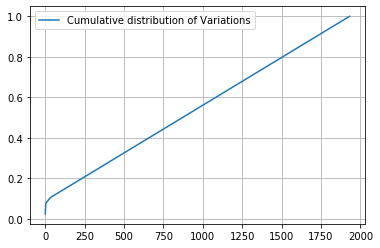

In [30]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

<p style="font-size:18px;"> <b>Q9.</b> How to featurize this Variation feature ?</p>

<p style="font-size:16px;"><b>Ans.</b>There are two ways we can featurize this variable
check out this video: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/
<ol><li>One hot Encoding</li><li>Response coding</li></ol></p>
<p> We will be using both these methods to featurize the Variation Feature </p>

In [31]:
# alpha is used for laplace smoothing
alpha = 1
# train gene feature
train_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", train_df))
# test gene feature
test_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", test_df))
# cross validation gene feature
cv_variation_feature_responseCoding = np.array(get_gv_feature(alpha, "Variation", cv_df))

In [32]:
#train_variation_feature_onehotCoding

In [33]:
print("train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature:", train_variation_feature_responseCoding.shape)

train_variation_feature_responseCoding is a converted feature using the response coding method. The shape of Variation feature: (2124, 9)


In [34]:
# one-hot encoding of variation feature.
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(train_df['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(test_df['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(cv_df['Variation'])

In [35]:
print("train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature:", train_variation_feature_onehotCoding.shape)

train_variation_feature_onehotEncoded is converted feature using the onne-hot encoding method. The shape of Variation feature: (2124, 1968)


<p style="font-size:18px;"> <b>Q10.</b> How good is this Variation feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.7285403354698365
For values of alpha =  0.0001 The log loss is: 1.7186464283947505
For values of alpha =  0.001 The log loss is: 1.7174076262537608
For values of alpha =  0.01 The log loss is: 1.724564563853165
For values of alpha =  0.1 The log loss is: 1.7402873530099634
For values of alpha =  1 The log loss is: 1.7408498417500768


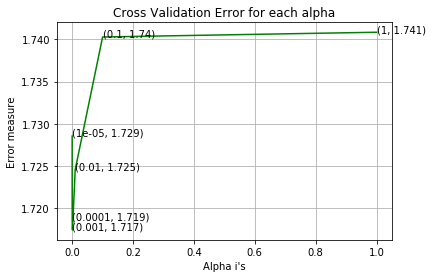

For values of best alpha =  0.001 The train log loss is: 1.1034461957502508
For values of best alpha =  0.001 The cross validation log loss is: 1.7174076262537608
For values of best alpha =  0.001 The test log loss is: 1.6626310647370643


In [36]:
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q11.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Not sure! But lets be very sure using the below analysis. </p>

In [37]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=test_df[test_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
cv_coverage=cv_df[cv_df['Variation'].isin(list(set(train_df['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',test_df.shape[0], ":",(test_coverage/test_df.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',cv_df.shape[0],":" ,(cv_coverage/cv_df.shape[0])*100)

Q12. How many data points are covered by total  1933  genes in test and cross validation data sets?
Ans
1. In test data 88 out of 665 : 13.233082706766917
2. In cross validation data 44 out of  532 : 8.270676691729323


<h3>3.2.3 Univariate Analysis on Text Feature</h3>

1. How many unique words are present in train data?
2. How are word frequencies distributed?
3. How to featurize text field?
4. Is the text feature useful in predicitng y_i?
5. Is the text feature stable across train, test and CV datasets?

In [38]:
def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['TEXT'].split():
            dictionary[word] +=1
    return dictionary

In [39]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['TEXT'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['TEXT'].split()))
            row_index += 1
    return text_feature_responseCoding

In [40]:
# building a CountVectorizer with all the words that occured minimum 3 times in train data
text_vectorizer = CountVectorizer(min_df=3)
train_text_feature_onehotCoding = text_vectorizer.fit_transform(train_df['TEXT'])
# getting all the feature names (words)
train_text_features= text_vectorizer.get_feature_names()

# train_text_feature_onehotCoding.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_onehotCoding.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))


print("Total number of unique words in train data :", len(train_text_features))

Total number of unique words in train data : 52320


In [41]:
dict_list = []
# dict_list =[] contains 9 dictionaries each corresponds to a class
for i in range(1,10):
    cls_text = train_df[train_df['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(train_df)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

In [42]:
#response coding of text features
train_text_feature_responseCoding  = get_text_responsecoding(train_df)
test_text_feature_responseCoding  = get_text_responsecoding(test_df)
cv_text_feature_responseCoding  = get_text_responsecoding(cv_df)

In [43]:
# https://stackoverflow.com/a/16202486
# we convert each row values such that they sum to 1  

train_text_feature_responseCoding = (train_text_feature_responseCoding.T/train_text_feature_responseCoding.sum(axis=1)).T
test_text_feature_responseCoding = (test_text_feature_responseCoding.T/test_text_feature_responseCoding.sum(axis=1)).T
cv_text_feature_responseCoding = (cv_text_feature_responseCoding.T/cv_text_feature_responseCoding.sum(axis=1)).T

In [44]:
# don't forget to normalize every feature
train_text_feature_onehotCoding = normalize(train_text_feature_onehotCoding, axis=0)

test_text_feature_onehotCoding = text_vectorizer.transform(test_df['TEXT'])
test_text_feature_onehotCoding = normalize(test_text_feature_onehotCoding, axis=0)

cv_text_feature_onehotCoding = text_vectorizer.transform(cv_df['TEXT'])
cv_text_feature_onehotCoding = normalize(cv_text_feature_onehotCoding, axis=0)

In [45]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [46]:
# Number of words for a given frequency.
#Not Printing all of the words in the interest of Brevity.

counter = Counter(sorted_text_occur)
#Checking for the number of words that occur a total of 3 Times in the Corpus. For any other count, simply change
#the index value in the cell and rerun.
count3 = counter[3]

print(count3)

4716


For values of alpha =  1e-05 The log loss is: 1.2940040496083014
For values of alpha =  0.0001 The log loss is: 1.1310524804130448
For values of alpha =  0.001 The log loss is: 1.1201009049967239
For values of alpha =  0.01 The log loss is: 1.2248111863516835
For values of alpha =  0.1 The log loss is: 1.446412512232011
For values of alpha =  1 The log loss is: 1.6643499140324773


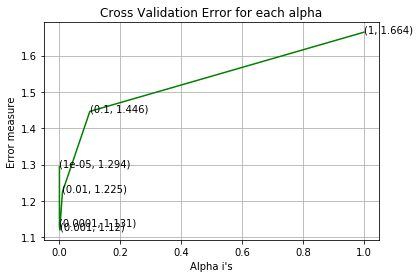

For values of best alpha =  0.001 The train log loss is: 0.7576709910556091
For values of best alpha =  0.001 The cross validation log loss is: 1.1201009049967239
For values of best alpha =  0.001 The test log loss is: 1.1262620661405451


In [47]:
# Train a Logistic regression+Calibration model using text features whicha re on-hot encoded
alpha = [10 ** x for x in range(-5, 1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_onehotCoding, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q.</b> Is the Text feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it seems like! </p>

In [48]:
def get_intersec_text(df):
    df_text_vec = CountVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['TEXT'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [49]:
len1,len2 = get_intersec_text(test_df)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(cv_df)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

97.087 % of word of test data appeared in train data
98.171 % of word of Cross Validation appeared in train data


<h1>4. Machine Learning Models (Using BOW Representation)</h1>

In [57]:
def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [51]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [52]:
# this function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not

def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<p style="font-size:24px;text-align:Center"> <b>Stacking the Three types of Features </b><p>

In [53]:
# merging gene, variance and text features
# building train, test and cross validation data sets
               
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_x_onehotCoding = hstack((train_gene_var_onehotCoding, train_text_feature_onehotCoding)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotCoding = hstack((test_gene_var_onehotCoding, test_text_feature_onehotCoding)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotCoding = hstack((cv_gene_var_onehotCoding, cv_text_feature_onehotCoding)).tocsr()
cv_y = np.array(list(cv_df['Class']))


train_gene_var_responseCoding = np.hstack((train_gene_feature_responseCoding,train_variation_feature_responseCoding))
test_gene_var_responseCoding = np.hstack((test_gene_feature_responseCoding,test_variation_feature_responseCoding))
cv_gene_var_responseCoding = np.hstack((cv_gene_feature_responseCoding,cv_variation_feature_responseCoding))

train_x_responseCoding = np.hstack((train_gene_var_responseCoding, train_text_feature_responseCoding))
test_x_responseCoding = np.hstack((test_gene_var_responseCoding, test_text_feature_responseCoding))
cv_x_responseCoding = np.hstack((cv_gene_var_responseCoding, cv_text_feature_responseCoding))

In [54]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", train_x_onehotCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_onehotCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_onehotCoding.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 55319)
(number of data points * number of features) in test data =  (665, 55319)
(number of data points * number of features) in cross validation data = (532, 55319)


In [55]:
print(" Response encoding features :")
print("(number of data points * number of features) in train data = ", train_x_responseCoding.shape)
print("(number of data points * number of features) in test data = ", test_x_responseCoding.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_responseCoding.shape)

 Response encoding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


# 4.1. Base Line Model (Using BOW Representation)

<h3>Naive Bayes (Using BOW Representation)</h3>

<h4>4.1.1.1. Hyper parameter tuning</h4>

for alpha = 1e-05
Log Loss : 1.1848159454401566
for alpha = 0.0001
Log Loss : 1.1854461030143015
for alpha = 0.001
Log Loss : 1.1834613224548796
for alpha = 0.1
Log Loss : 1.1909412520090463
for alpha = 1
Log Loss : 1.1883808485132612
for alpha = 10
Log Loss : 1.2817570546734736
for alpha = 100
Log Loss : 1.2897127217368973
for alpha = 1000
Log Loss : 1.2241565551190932


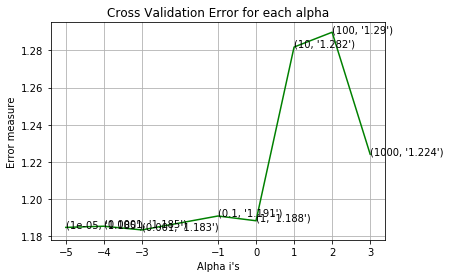

For values of best alpha =  0.001 The train log loss is: 0.8775426086058823
For values of best alpha =  0.001 The cross validation log loss is: 1.1834613224548796
For values of best alpha =  0.001 The test log loss is: 1.3236715242848964


In [60]:
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotCoding, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h4>4.1.1.2. Testing the model with best hyper parameters</h4>

Log Loss : 1.1834613224548796
Number of missclassified point : 0.34210526315789475
-------------------- Confusion matrix --------------------


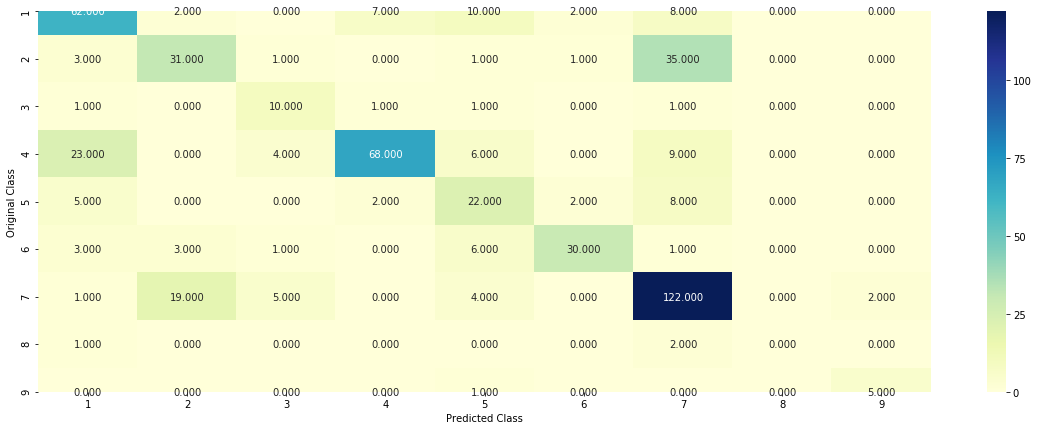

-------------------- Precision matrix (Columm Sum=1) --------------------


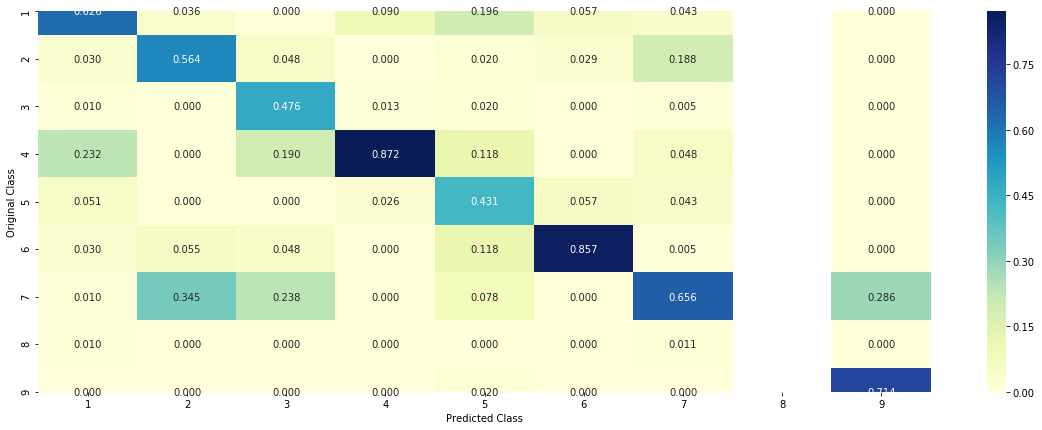

-------------------- Recall matrix (Row sum=1) --------------------


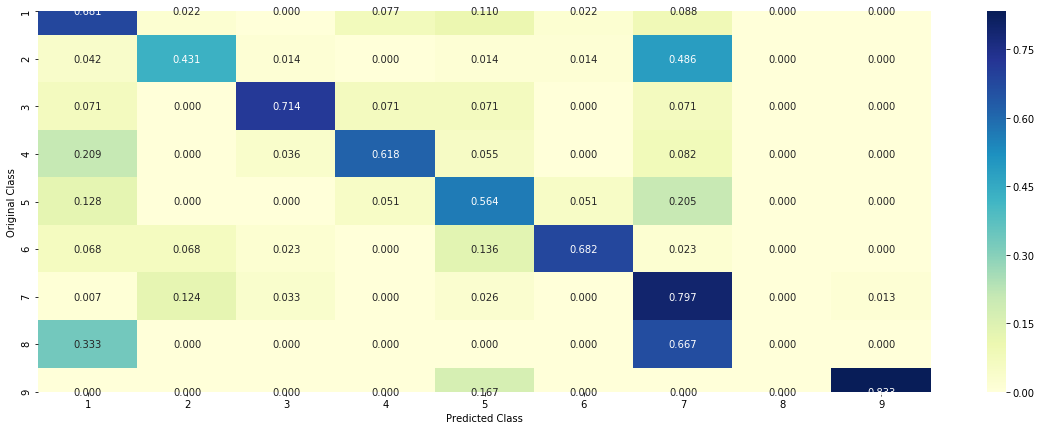

In [61]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotCoding)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotCoding.toarray()))

<h4>4.1.1.3. Feature Importance, Correctly classified point</h4>

In [62]:
test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0955 0.0838 0.0134 0.1134 0.0346 0.0372 0.6135 0.0044 0.0042]]
Actual Class : 1
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h4>4.1.1.4. Feature Importance, Incorrectly classified point</h4>

In [63]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0986 0.087  0.0139 0.1163 0.1797 0.3786 0.1171 0.0045 0.0043]]
Actual Class : 6
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h2>4.2. K Nearest Neighbour Classification (Using BOW Representation)</h2>

<h3>4.2.1. Hyper parameter tuning</h3>

for alpha = 5
Log Loss : 0.9428689974958668
for alpha = 11
Log Loss : 0.9604355632342658
for alpha = 15
Log Loss : 0.9788076313967776
for alpha = 21
Log Loss : 0.9864290912921524
for alpha = 31
Log Loss : 0.993387857647931
for alpha = 41
Log Loss : 0.996884212187504
for alpha = 51
Log Loss : 1.0146394504335559
for alpha = 99
Log Loss : 1.039076103878536


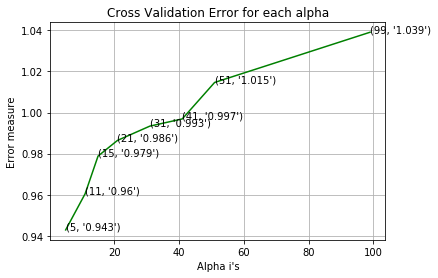

For values of best alpha =  5 The train log loss is: 0.4933779096849355
For values of best alpha =  5 The cross validation log loss is: 0.9428689974958668
For values of best alpha =  5 The test log loss is: 1.128256092291025


In [64]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_responseCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>4.2.2. Testing the model with best hyper parameters</h3>

Log loss : 0.9428689974958668
Number of mis-classified points : 0.3026315789473684
-------------------- Confusion matrix --------------------


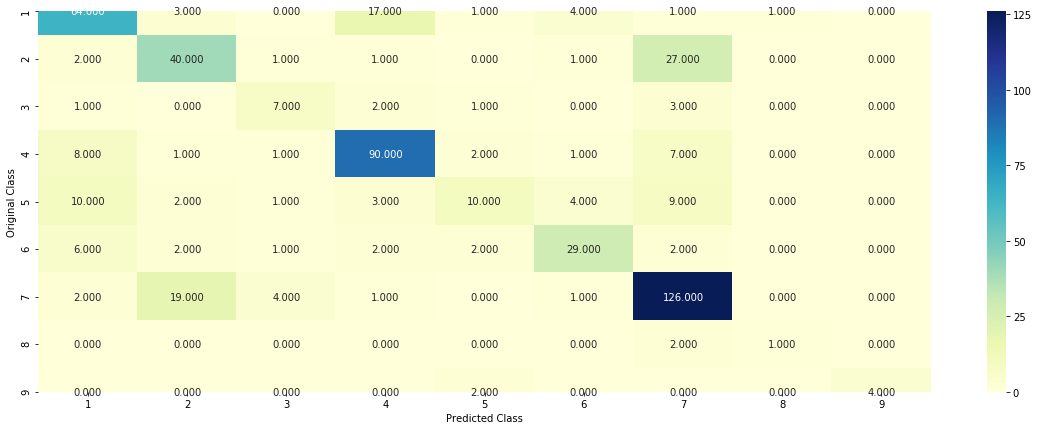

-------------------- Precision matrix (Columm Sum=1) --------------------


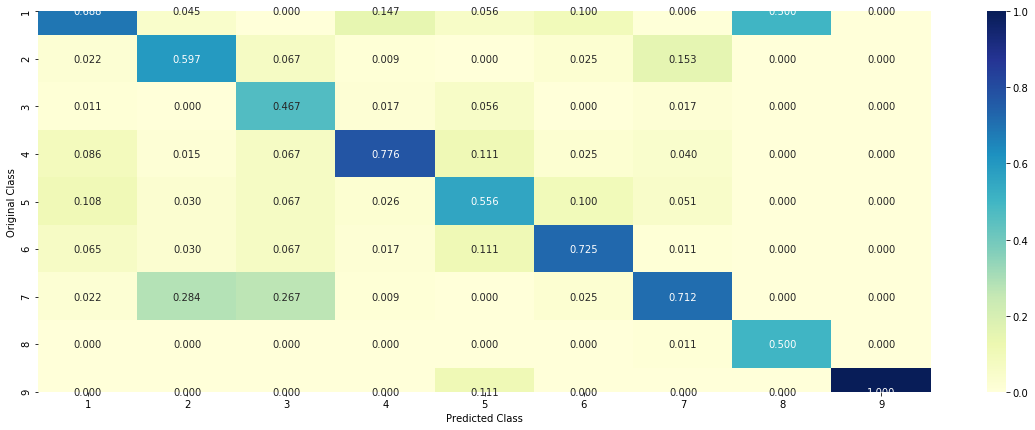

-------------------- Recall matrix (Row sum=1) --------------------


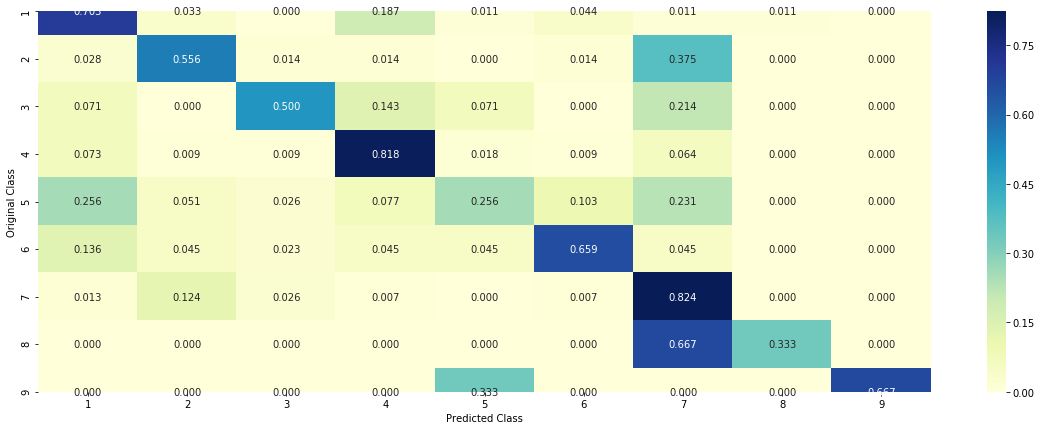

In [65]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y, cv_x_responseCoding, cv_y, clf)

<h3>4.2.3.Sample Query point -1</h3>

In [66]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 1
The  5  nearest neighbours of the test points belongs to classes [1 1 1 1 1]
Fequency of nearest points : Counter({1: 5})


<h3>4.2.4. Sample Query Point-2 </h3>

In [67]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 6
Actual Class : 6
the k value for knn is 5 and the nearest neighbours of the test points belongs to classes [6 6 6 1 6]
Fequency of nearest points : Counter({6: 4, 1: 1})


<h2>4.3. Logistic Regression (Using BOW Representation)</h2>

<h3>4.3.1. With Class balancing & Using BOW Representation</h3>

<h4>4.3.1.1. Hyper parameter tuning</h4>

for alpha = 1e-06
Log Loss : 1.2820002904055086
for alpha = 1e-05
Log Loss : 1.241946878726827
for alpha = 0.0001
Log Loss : 1.0360937629065765
for alpha = 0.001
Log Loss : 0.9767910079880365
for alpha = 0.01
Log Loss : 1.0351886716800898
for alpha = 0.1
Log Loss : 1.3518173950507897
for alpha = 1
Log Loss : 1.603551505685224
for alpha = 10
Log Loss : 1.6401950348171674
for alpha = 100
Log Loss : 1.644220976844693


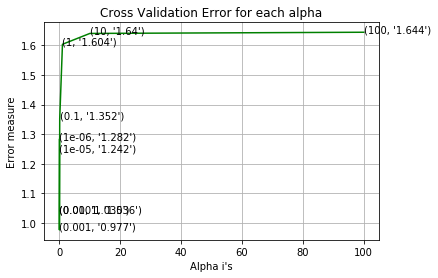

For values of best alpha =  0.001 The train log loss is: 0.5520217028116221
For values of best alpha =  0.001 The cross validation log loss is: 0.9767910079880365
For values of best alpha =  0.001 The test log loss is: 1.138527931225908


In [68]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.1.2. Testing the model with best hyper parameters</h4>

Log loss : 0.9767910079880365
Number of mis-classified points : 0.29699248120300753
-------------------- Confusion matrix --------------------


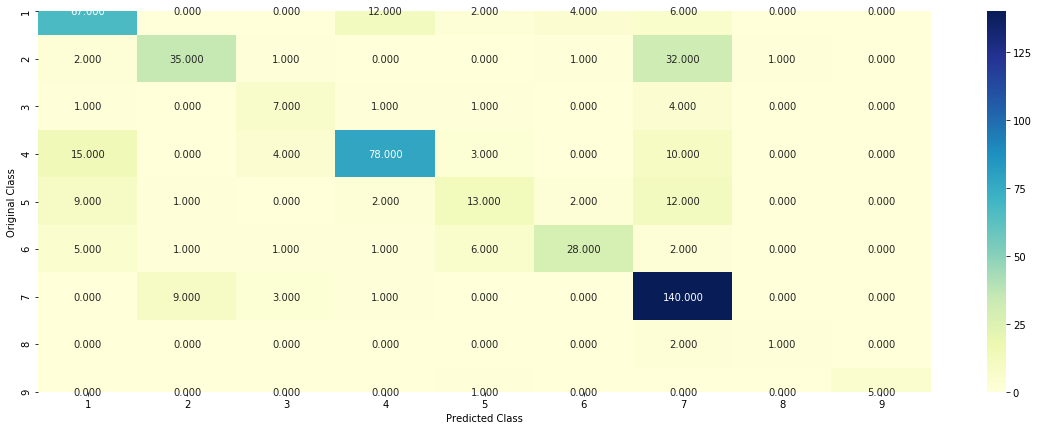

-------------------- Precision matrix (Columm Sum=1) --------------------


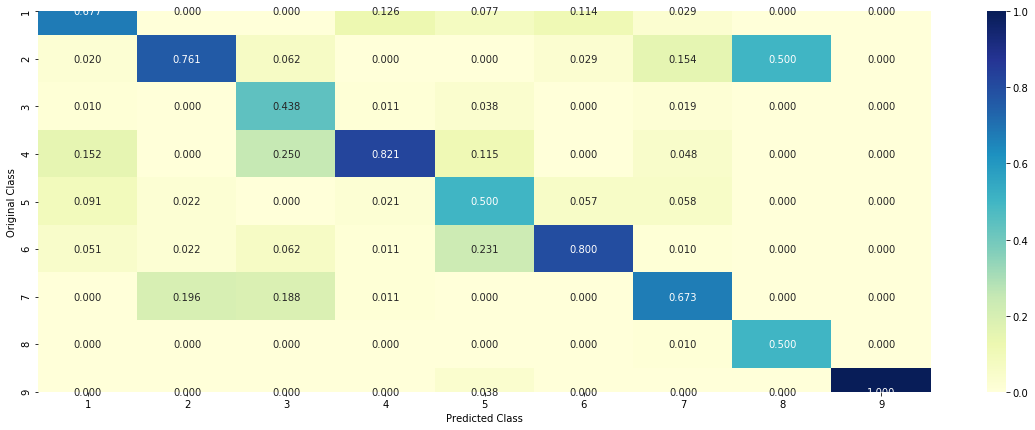

-------------------- Recall matrix (Row sum=1) --------------------


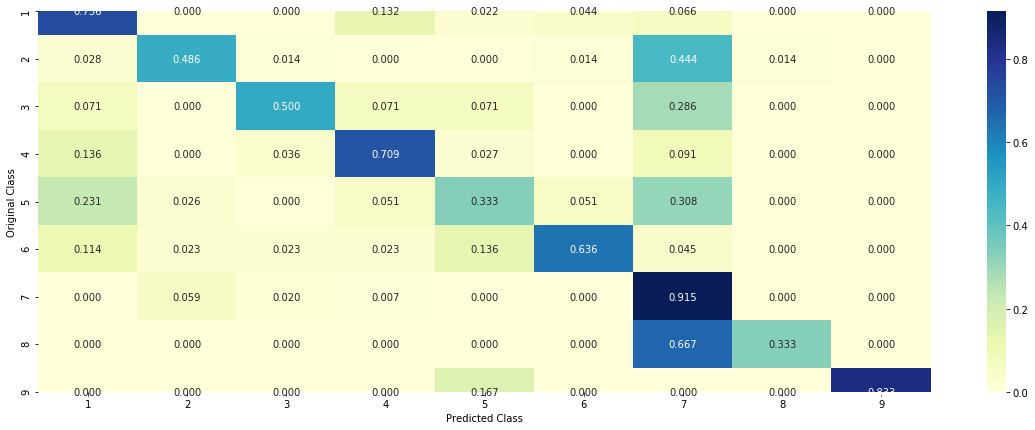

In [69]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.1.3. Feature Importance</h4>

In [70]:
def get_imp_feature_names(text, indices, removed_ind = []):
    
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    
    for i in indices:
        if i < train_gene_feature_onehotCoding.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

<h5>4.3.1.3.1. Correctly Classified point</h5>

In [71]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.3022 0.0033 0.     0.0312 0.     0.     0.4618 0.2014 0.    ]]
Actual Class : 1
--------------------------------------------------
72 Text feature [3t3] present in test data point [True]
77 Text feature [constitutively] present in test data point [True]
84 Text feature [transforming] present in test data point [True]
93 Text feature [constitutive] present in test data point [True]
112 Text feature [nude] present in test data point [True]
118 Text feature [nf] present in test data point [True]
119 Text feature [missense] present in test data point [True]
122 Text feature [nonsense] present in test data point [True]
123 Text feature [unstable] present in test data point [True]
161 Text feature [activated] present in test data point [True]
179 Text feature [affected] present in test data point [True]
224 Text feature [extracellular] present in test data point [True]
225 Text feature [putative] present in test data point [True]
232 Tex

<h5>4.3.1.3.2. Incorrectly Classified point</h5>

In [72]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.0543 0.0453 0.0135 0.0411 0.406  0.3973 0.0328 0.0061 0.0035]]
Actual Class : 6
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h3>4.3.2. Without Class balancing & Using BOW Representation </h3>

<h4>4.3.2.1. Hyper parameter tuning</h4>

for alpha = 1e-06
Log Loss : 1.2419627871634125
for alpha = 1e-05
Log Loss : 1.2025888023111966
for alpha = 0.0001
Log Loss : 1.04221631771874
for alpha = 0.001
Log Loss : 0.9943133729835737
for alpha = 0.01
Log Loss : 1.0832642611185135
for alpha = 0.1
Log Loss : 1.3029167244293158
for alpha = 1
Log Loss : 1.6034754083199727


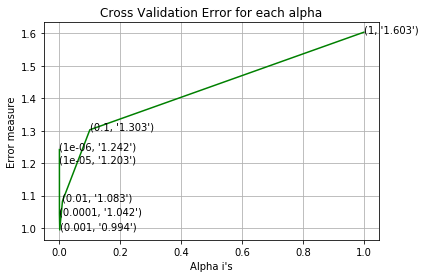

For values of best alpha =  0.001 The train log loss is: 0.5602564944566475
For values of best alpha =  0.001 The cross validation log loss is: 0.9943133729835737
For values of best alpha =  0.001 The test log loss is: 1.1511963582028382


In [73]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>4.3.2.2. Testing model with best hyper parameters</h4>

Log loss : 0.9943133729835737
Number of mis-classified points : 0.3007518796992481
-------------------- Confusion matrix --------------------


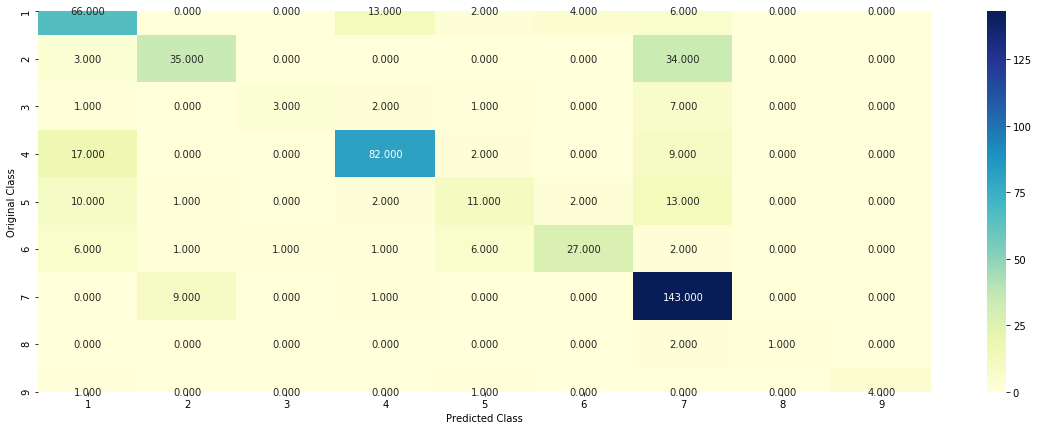

-------------------- Precision matrix (Columm Sum=1) --------------------


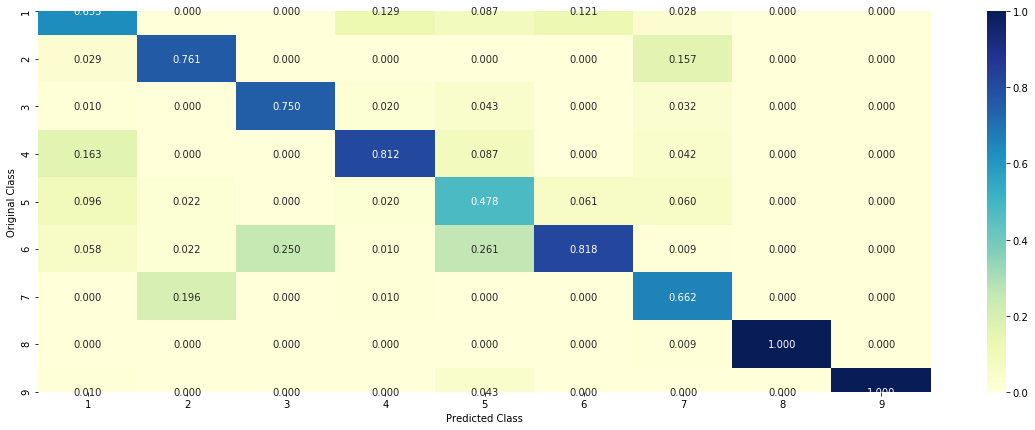

-------------------- Recall matrix (Row sum=1) --------------------


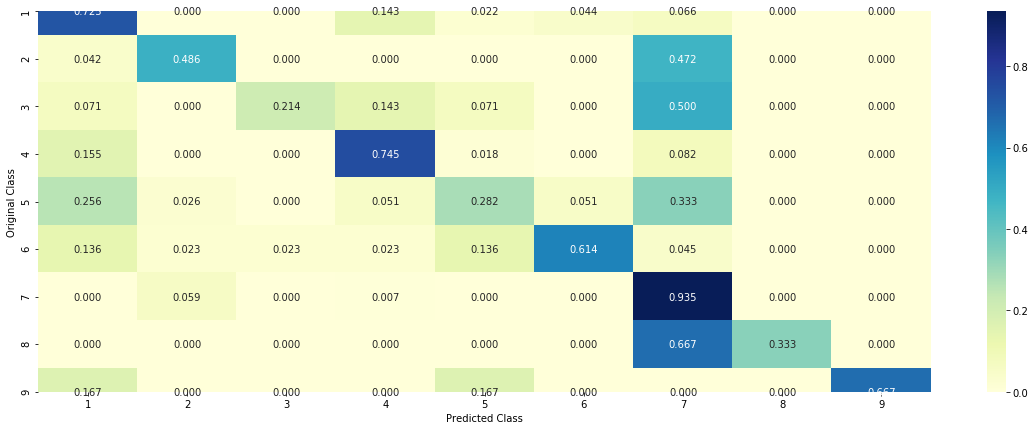

In [74]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y, cv_x_onehotCoding, cv_y, clf)

<h4>4.3.2.3. Feature Importance, Correctly Classified point</h4>

In [75]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.264  0.0011 0.     0.0311 0.     0.     0.531  0.1727 0.    ]]
Actual Class : 1
--------------------------------------------------
113 Text feature [3t3] present in test data point [True]
123 Text feature [constitutively] present in test data point [True]
127 Text feature [transforming] present in test data point [True]
162 Text feature [constitutive] present in test data point [True]
184 Text feature [nf] present in test data point [True]
217 Text feature [nude] present in test data point [True]
279 Text feature [activated] present in test data point [True]
311 Text feature [iix] present in test data point [True]
324 Text feature [psv2neo] present in test data point [True]
330 Text feature [unstable] present in test data point [True]
331 Text feature [activating] present in test data point [True]
337 Text feature [extracellular] present in test data point [True]
350 Text feature [technology] present in test data point [True]
354 T

<h4>4.3.2.4. Feature Importance, Inorrectly Classified point</h4>

In [76]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0537 0.0461 0.0154 0.0402 0.3937 0.4042 0.0367 0.0071 0.003 ]]
Actual Class : 6
--------------------------------------------------
203 Text feature [homozygote] present in test data point [True]
310 Text feature [assays] present in test data point [True]
336 Text feature [previously] present in test data point [True]
354 Text feature [results] present in test data point [True]
378 Text feature [described] present in test data point [True]
396 Text feature [effect] present in test data point [True]
442 Text feature [consistent] present in test data point [True]
457 Text feature [possible] present in test data point [True]
464 Text feature [revealed] present in test data point [True]
493 Text feature [expressed] present in test data point [True]
Out of the top  500  features  10 are present in query point


<h2>4.4. Linear Support Vector Machines (Using BOW Representation)</h2>

<h3>4.4.1. Hyper parameter tuning</h3>

for C = 1e-05
Log Loss : 1.2463902087098375
for C = 0.0001
Log Loss : 1.1595436224036635
for C = 0.001
Log Loss : 1.0631647132126851
for C = 0.01
Log Loss : 1.0259398832611064
for C = 0.1
Log Loss : 1.2441270372274964
for C = 1
Log Loss : 1.6296385030675256
for C = 10
Log Loss : 1.644889319944694
for C = 100
Log Loss : 1.6448897800075999


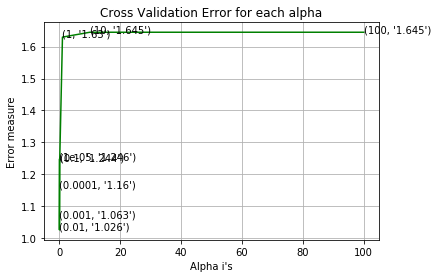

For values of best alpha =  0.01 The train log loss is: 0.7471074160100234
For values of best alpha =  0.01 The cross validation log loss is: 1.0259398832611064
For values of best alpha =  0.01 The test log loss is: 1.1920473248785894


In [77]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotCoding, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotCoding, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h3>4.4.2. Testing model with best hyper parameters</h3>

Log loss : 1.0259398832611064
Number of mis-classified points : 0.30451127819548873
-------------------- Confusion matrix --------------------


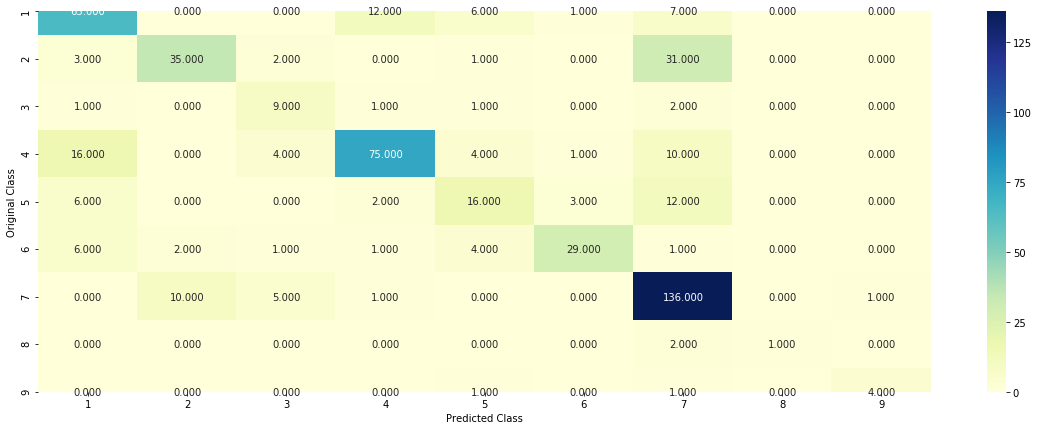

-------------------- Precision matrix (Columm Sum=1) --------------------


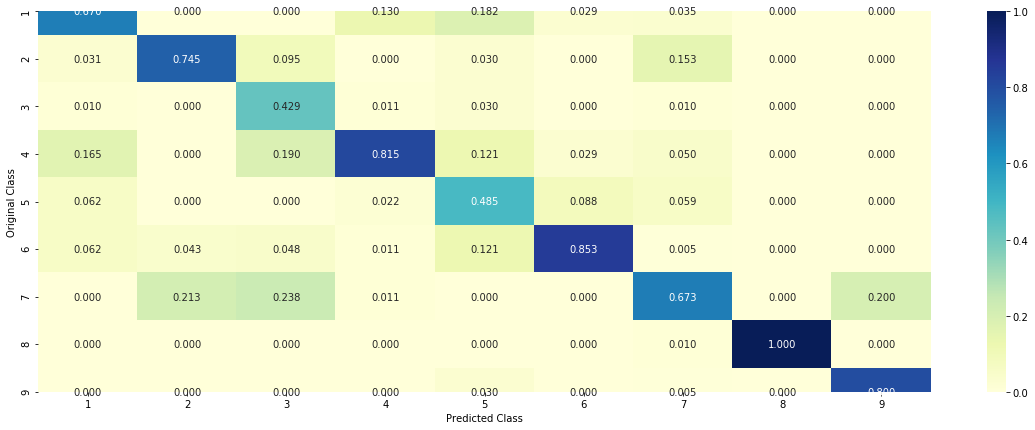

-------------------- Recall matrix (Row sum=1) --------------------


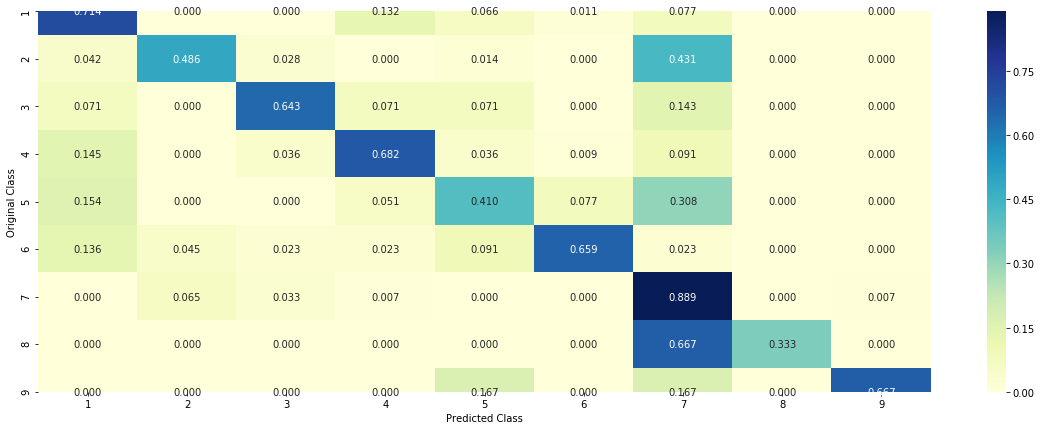

In [78]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.3.3. Feature Importance</h3>

<h4>4.3.3.1. For Correctly classified point</h4>

In [79]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotCoding,train_y)
test_point_index = 1
# test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[5.240e-01 3.000e-03 0.000e+00 6.490e-02 2.000e-04 1.000e-04 4.075e-01
  3.000e-04 0.000e+00]]
Actual Class : 1
--------------------------------------------------
103 Text feature [ivs1] present in test data point [True]
126 Text feature [irf1] present in test data point [True]
204 Text feature [premature] present in test data point [True]
222 Text feature [burlington] present in test data point [True]
224 Text feature [genotypic] present in test data point [True]
258 Text feature [watanabe] present in test data point [True]
295 Text feature [constitutively] present in test data point [True]
310 Text feature [abrogating] present in test data point [True]
350 Text feature [ddx3x] present in test data point [True]
411 Text feature [ishida] present in test data point [True]
429 Text feature [associate] present in test data point [True]
445 Text feature [intron] present in test data point [True]
Out of the top  500  features  12 are prese

<h4>4.3.3.2. For Incorrectly classified point</h4>

In [80]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0724 0.0571 0.0135 0.0669 0.2338 0.4688 0.079  0.0049 0.0036]]
Actual Class : 6
--------------------------------------------------
129 Text feature [centrosome] present in test data point [True]
154 Text feature [posterior] present in test data point [True]
158 Text feature [likelihoods] present in test data point [True]
192 Text feature [exceeds] present in test data point [True]
339 Text feature [fell] present in test data point [True]
Out of the top  500  features  5 are present in query point


<h2>4.5 Random Forest Classifier (Using BOW Representation)</h2>

<h3>4.5.1. Hyper parameter tuning (With One hot Encoding)</h3>

In [81]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotCoding, train_y)
        
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotCoding)
        
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_onehotCoding)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2059089659480262
for n_estimators = 100 and max depth =  10
Log Loss : 1.140660031979066
for n_estimators = 200 and max depth =  5
Log Loss : 1.1972627720378857
for n_estimators = 200 and max depth =  10
Log Loss : 1.1245943201836026
for n_estimators = 500 and max depth =  5
Log Loss : 1.188266203965518
for n_estimators = 500 and max depth =  10
Log Loss : 1.118630169164555
for n_estimators = 1000 and max depth =  5
Log Loss : 1.1817845674850018
for n_estimators = 1000 and max depth =  10
Log Loss : 1.1165954416713577
for n_estimators = 2000 and max depth =  5
Log Loss : 1.181671927537291
for n_estimators = 2000 and max depth =  10
Log Loss : 1.11517737993224
For values of best estimator =  2000 The train log loss is: 0.7245635838408253
For values of best estimator =  2000 The cross validation log loss is: 1.11517737993224
For values of best estimator =  2000 The test log loss is: 1.1943085784055696


<h3>4.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.11517737993224
Number of mis-classified points : 0.35714285714285715
-------------------- Confusion matrix --------------------


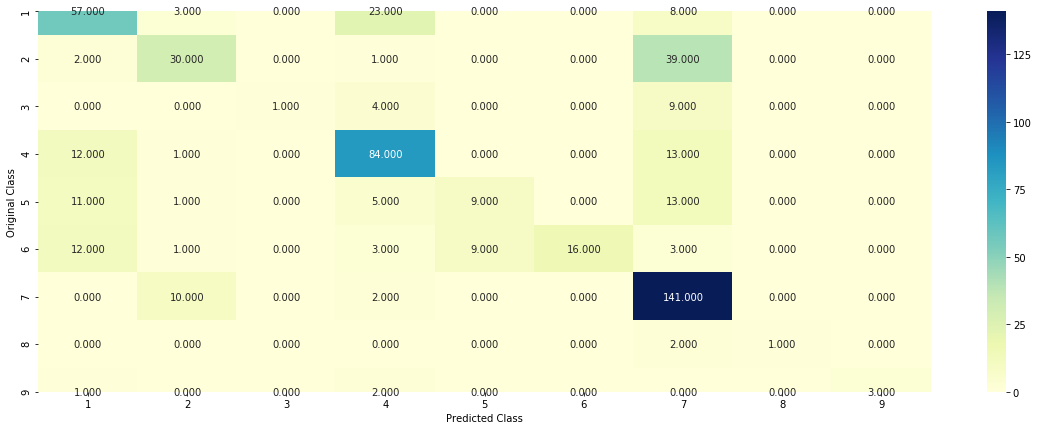

-------------------- Precision matrix (Columm Sum=1) --------------------


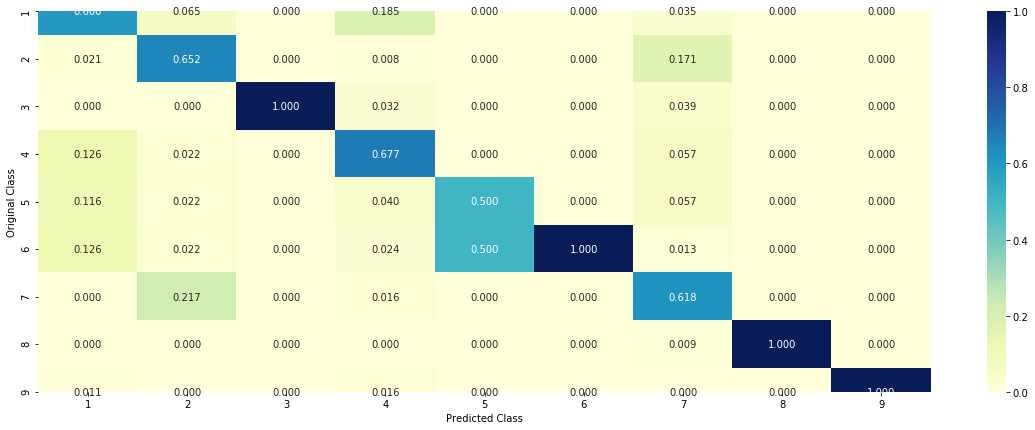

-------------------- Recall matrix (Row sum=1) --------------------


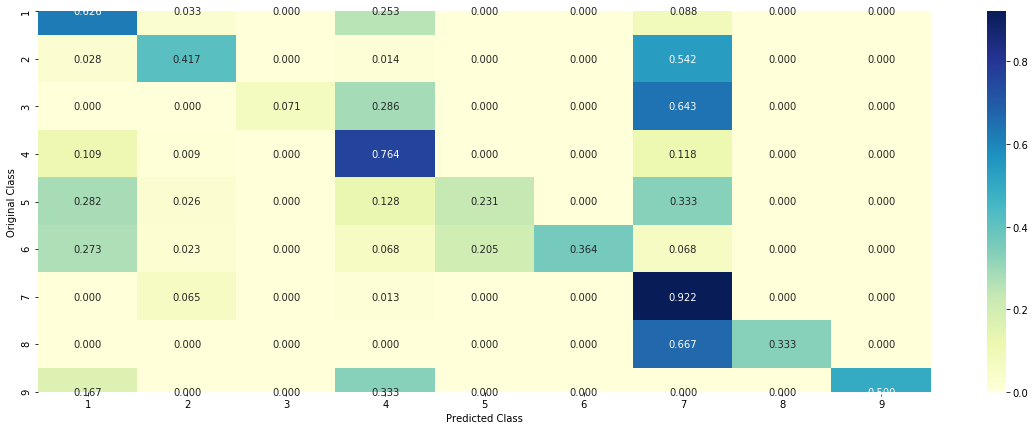

In [82]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotCoding, train_y,cv_x_onehotCoding,cv_y, clf)

<h3>4.5.3. Feature Importance</h3>

<h4>4.5.3.1. Correctly Classified point</h4>

In [83]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotCoding, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.2109 0.2055 0.0224 0.1569 0.0496 0.0423 0.2705 0.0129 0.029 ]]
Actual Class : 1
--------------------------------------------------
0 Text feature [activating] present in test data point [True]
3 Text feature [constitutive] present in test data point [True]
4 Text feature [activation] present in test data point [True]
6 Text feature [signaling] present in test data point [True]
8 Text feature [activated] present in test data point [True]
10 Text feature [missense] present in test data point [True]
11 Text feature [function] present in test data point [True]
12 Text feature [inhibitor] present in test data point [True]
13 Text feature [nonsense] present in test data point [True]
14 Text feature [suppressor] present in test data point [True]
15 Text feature [treatment] present in test data point [True]
17 Text feature [constitutively] present in test data point [True]
19 Text feature [oncogenic] present in test data point [True]
21 Te

<h4>4.5.3.2. Inorrectly Classified point</h4>

In [84]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_onehotCoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_onehotCoding[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.1789 0.0346 0.0264 0.1369 0.1127 0.4666 0.0318 0.0058 0.0062]]
Actuall Class : 6
--------------------------------------------------
10 Text feature [missense] present in test data point [True]
11 Text feature [function] present in test data point [True]
21 Text feature [loss] present in test data point [True]
24 Text feature [brca1] present in test data point [True]
30 Text feature [receptor] present in test data point [True]
38 Text feature [pathogenic] present in test data point [True]
39 Text feature [variants] present in test data point [True]
43 Text feature [functional] present in test data point [True]
46 Text feature [cell] present in test data point [True]
49 Text feature [deleterious] present in test data point [True]
52 Text feature [patients] present in test data point [True]
59 Text feature [brct] present in test data point [True]
64 Text feature [pathogenicity] present in test data point [True]
69 Text feature [brca2]

<h3>4.5.3. Hyper parameter Tuning (With Response Coding)</h3>

In [85]:
alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, train_y)
        
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_responseCoding, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_responseCoding)
        
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''
fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/4)],max_depth[int(i%4)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)

predict_y = sig_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 1.9840420181198548
for n_estimators = 10 and max depth =  3
Log Loss : 1.5630057633989198
for n_estimators = 10 and max depth =  5
Log Loss : 1.4837248114565642
for n_estimators = 10 and max depth =  10
Log Loss : 1.6387862220554854
for n_estimators = 50 and max depth =  2
Log Loss : 1.5141353281326793
for n_estimators = 50 and max depth =  3
Log Loss : 1.346681146561361
for n_estimators = 50 and max depth =  5
Log Loss : 1.2500358832395029
for n_estimators = 50 and max depth =  10
Log Loss : 1.678252623496407
for n_estimators = 100 and max depth =  2
Log Loss : 1.423292759959476
for n_estimators = 100 and max depth =  3
Log Loss : 1.3780442247864102
for n_estimators = 100 and max depth =  5
Log Loss : 1.1803583415042407
for n_estimators = 100 and max depth =  10
Log Loss : 1.606282151698521
for n_estimators = 200 and max depth =  2
Log Loss : 1.529774876066893
for n_estimators = 200 and max depth =  3
Log Loss : 1.399497258061828
for

<h3>4.5.4. Testing model with best hyper parameters (Response Coding)</h3>

Log loss : 1.1803583415042407
Number of mis-classified points : 0.4041353383458647
-------------------- Confusion matrix --------------------


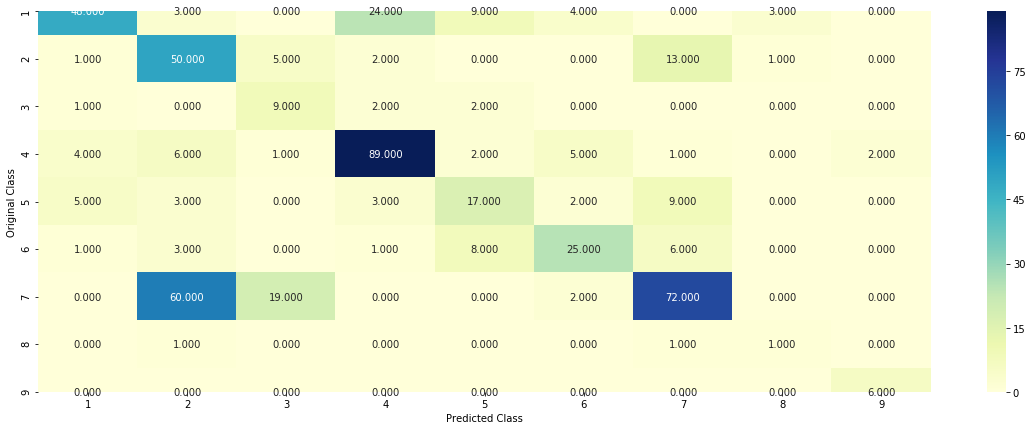

-------------------- Precision matrix (Columm Sum=1) --------------------


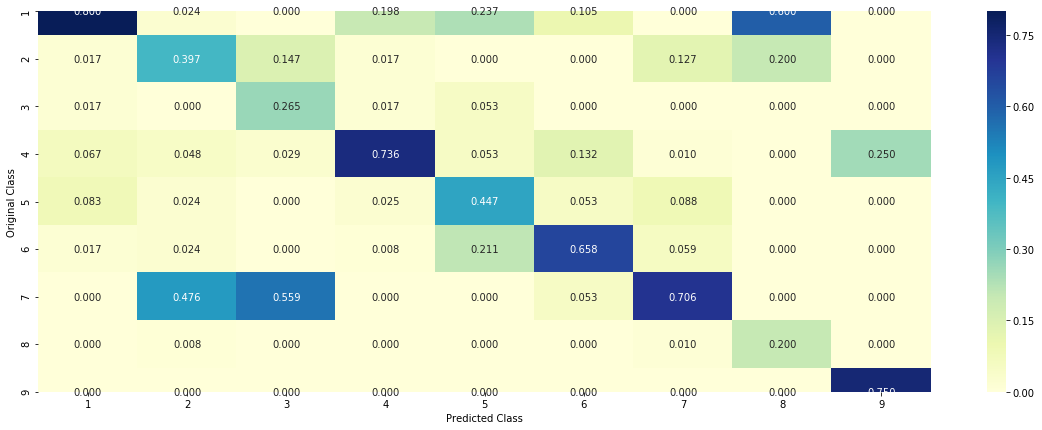

-------------------- Recall matrix (Row sum=1) --------------------


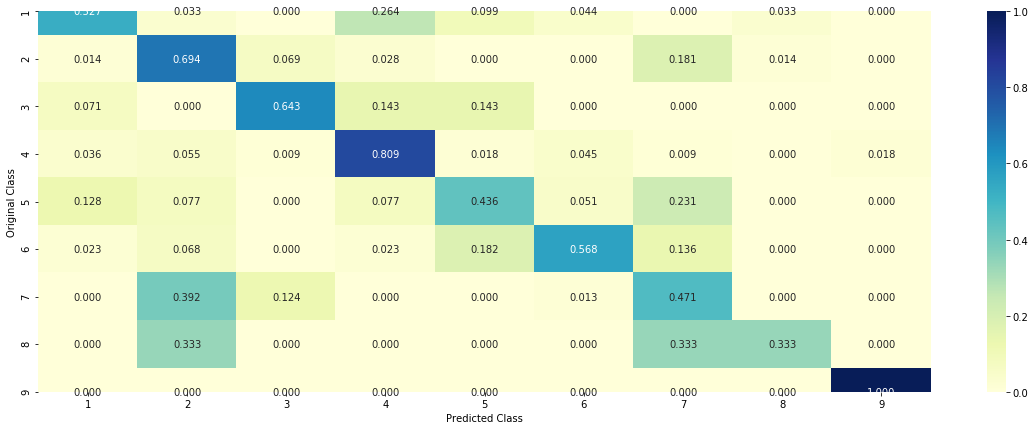

In [86]:
clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, train_y,cv_x_responseCoding,cv_y, clf)

<h3>4.5.5. Feature Importance</h3>

<h4>4.5.5.1. Correctly Classified point</h4>

In [87]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_responseCoding, train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 1
Predicted Class Probabilities: [[0.8741 0.0038 0.0026 0.0952 0.0017 0.0073 0.0022 0.0068 0.0063]]
Actual Class : 1
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h4>4.5.5.2. Incorrectly Classified point</h4>

In [88]:
test_point_index = 100
predicted_cls = sig_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 6
Predicted Class Probabilities: [[0.0246 0.0037 0.0186 0.0147 0.4223 0.505  0.0022 0.0043 0.0047]]
Actual Class : 6
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h2>4.7 Stack the models obtained using BOW Representation </h2>

<h3>4.7.1 Testing with hyper parameter tuning</h3>

In [89]:
clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotCoding, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotCoding, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotCoding, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotCoding, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotCoding))))
sig_clf2.fit(train_x_onehotCoding, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotCoding))))
sig_clf3.fit(train_x_onehotCoding, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotCoding))))
print("-"*50)

alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotCoding, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 0.98
Support vector machines : Log Loss: 1.63
Naive Bayes : Log Loss: 1.18
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.178
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.034
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.484
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.032
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.079
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.332


<h3>4.7.2 Testing the model with the Best Hyper Parameters</h3>

Log loss (train) on the stacking classifier : 0.6413412735221915
Log loss (CV) on the stacking classifier : 1.03195039360881
Log loss (test) on the stacking classifier : 1.1678136697649486
Number of missclassified point : 0.38345864661654133
-------------------- Confusion matrix --------------------


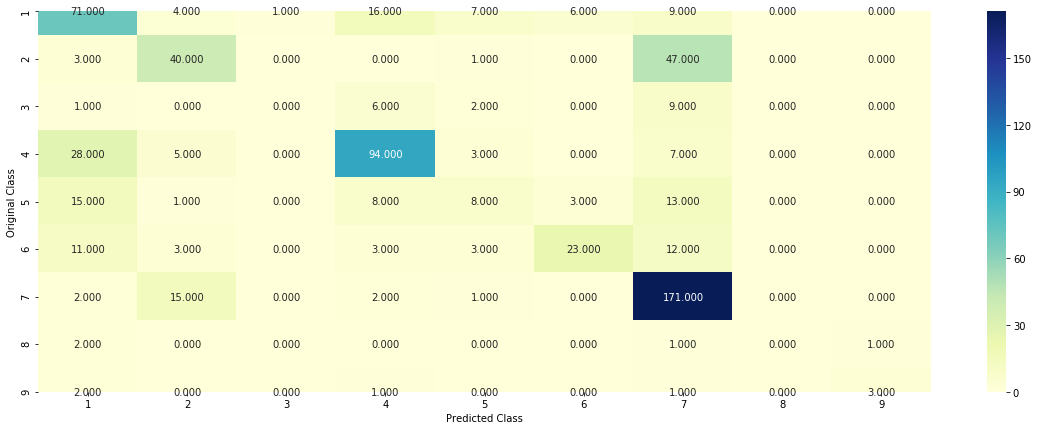

-------------------- Precision matrix (Columm Sum=1) --------------------


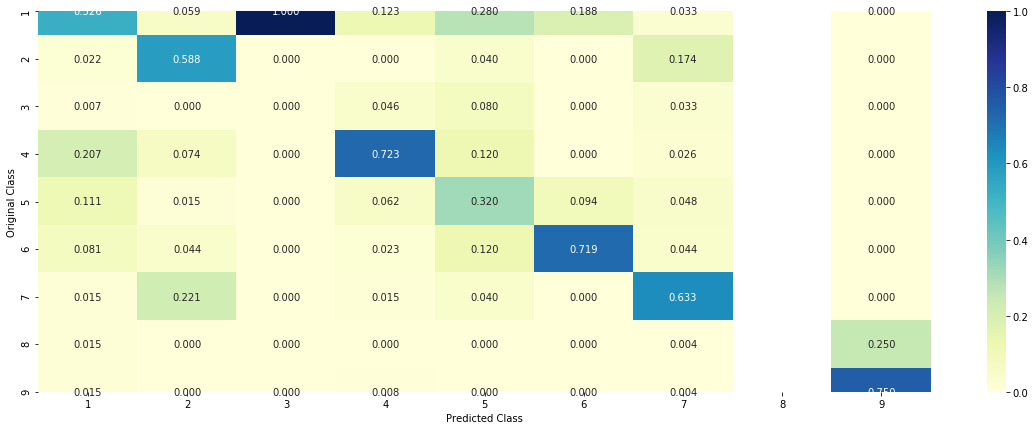

-------------------- Recall matrix (Row sum=1) --------------------


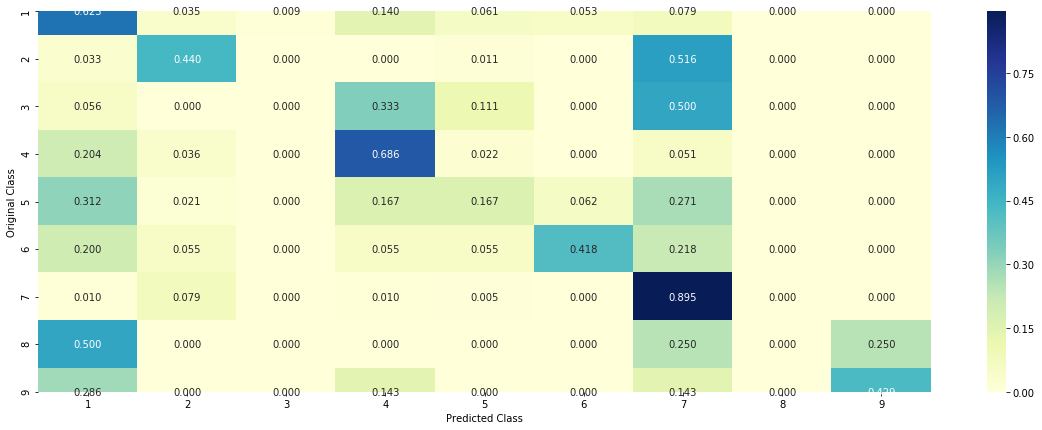

In [90]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotCoding, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotCoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotCoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotCoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotCoding))

<h3>4.7.3 Maximum Voting classifier </h3>

Log loss (train) on the VotingClassifier : 0.8995651050427256
Log loss (CV) on the VotingClassifier : 1.109363760605069
Log loss (test) on the VotingClassifier : 1.2502783029599136
Number of missclassified point : 0.39849624060150374
-------------------- Confusion matrix --------------------


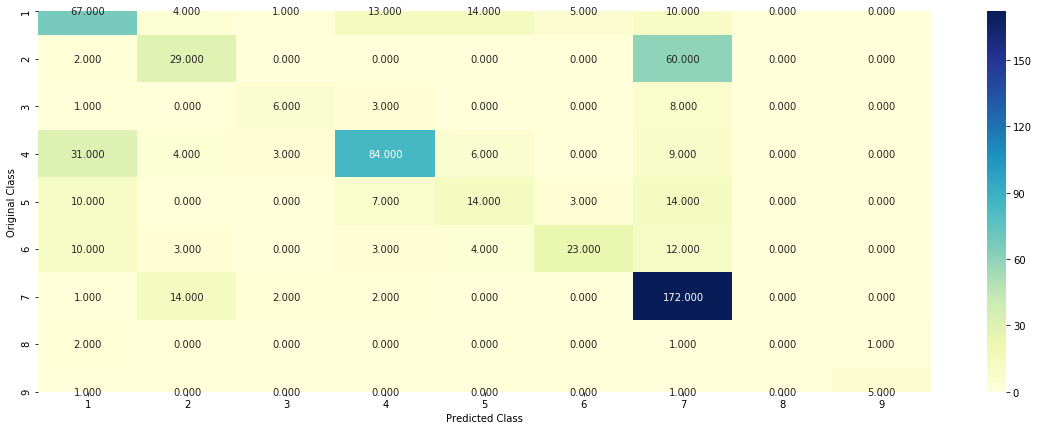

-------------------- Precision matrix (Columm Sum=1) --------------------


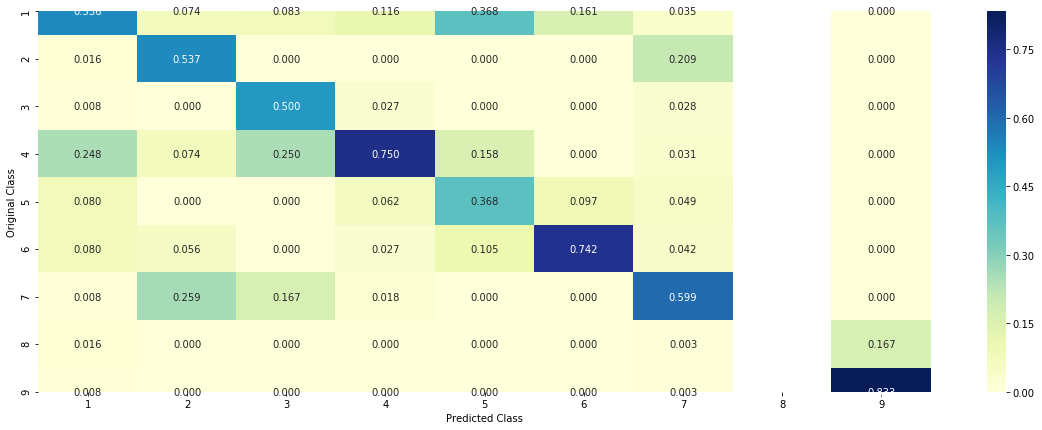

-------------------- Recall matrix (Row sum=1) --------------------


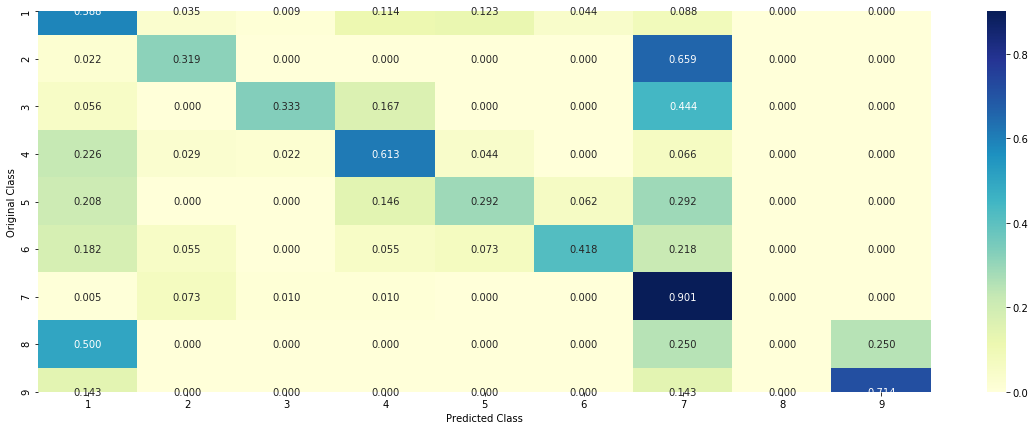

In [91]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_onehotCoding, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_onehotCoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_onehotCoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_onehotCoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_onehotCoding)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_onehotCoding))

<h1>5. Machine Learning Models (Using TFIDF Representation)</h1>

In [54]:
#One Hot Encoding of the Gene Feature
gene_vectorizer = TfidfVectorizer()

gene_train_onehotencoding = gene_vectorizer.fit_transform(train_df['Gene'])
gene_cv_onehotencoding = gene_vectorizer.transform(cv_df['Gene'])
gene_test_onehotencoding = gene_vectorizer.transform(test_df['Gene'])


#One Hot Encoding of the Variation Feature
variation_vectorizer = TfidfVectorizer()

variation_train_onehotencoding = variation_vectorizer.fit_transform(train_df['Variation'])
variation_cv_onehotencoding = variation_vectorizer.transform(cv_df['Variation'])
variation_test_onehotencoding = variation_vectorizer.transform(test_df['Variation'])

#One Hot Encoding of the Text Feature
text_vectorizer = TfidfVectorizer()

text_train_onehotencoding = text_vectorizer.fit_transform(train_df['TEXT'])
text_cv_onehotencoding = text_vectorizer.transform(cv_df['TEXT'])
text_test_onehotencoding = text_vectorizer.transform(test_df['TEXT'])

In [58]:
#Normalizing every single feature that you obtain is Extremely Important.

gene_train_onehotencoding = normalize(gene_train_onehotencoding, axis=0)
gene_cv_onehotencoding = normalize(gene_cv_onehotencoding, axis=0)
gene_test_onehotencoding = normalize(gene_test_onehotencoding, axis=0)

variation_train_onehotencoding = normalize(variation_train_onehotencoding, axis=0)
variation_cv_onehotencoding = normalize(variation_cv_onehotencoding, axis=0)
variation_test_onehotencoding = normalize(variation_test_onehotencoding, axis=0)

text_train_onehotencoding = normalize(text_train_onehotencoding, axis=0)
text_cv_onehotencoding = normalize(text_cv_onehotencoding, axis=0)
text_test_onehotencoding = normalize(text_test_onehotencoding, axis=0)

<p style="font-size:24px;text-align:Center"> <b>Stacking the Three types of Features </b><p>

In [53]:
#Again, we stack the Features that we obtained above. First, gene & variation features are combined and this 
#resultant feature is combined with Text :- for Train, CV and Test

train_gene_variation_onehotencoding = hstack((gene_train_onehotencoding,variation_train_onehotencoding))
cv_gene_variation_onehotencoding = hstack((gene_cv_onehotencoding,variation_cv_onehotencoding))
test_gene_variation_onehotCoding = hstack((gene_test_onehotencoding,variation_test_onehotencoding))

TFIDF_train_x_onehotencoding = hstack((train_gene_variation_onehotencoding,text_train_onehotencoding)).tocsr()
TFIDF_train_y = np.array(list(train_df['Class']))

TFIDF_cv_x_onehotencoding = hstack((cv_gene_variation_onehotencoding,text_cv_onehotencoding)).tocsr()
TFIDF_cv_y = np.array(list(cv_df['Class']))

TFIDF_test_x_onehotencoding = hstack((test_gene_variation_onehotCoding,text_test_onehotencoding)).tocsr()
TFIDF_test_y = np.array(list(test_df['Class']))

In [95]:
print("One hot encoding features :")

print("(Number of Data Points * Number of Features) in Train data = ", TFIDF_train_x_onehotencoding.shape)
print("(Number of Data Points * Number of Features) in Cross Validation Data =", TFIDF_cv_x_onehotencoding.shape)
print("(Number of Data Points * Number of Features) in Test Data = ", TFIDF_test_x_onehotencoding.shape)

One hot encoding features :
(Number of Data Points * Number of Features) in Train data =  (2124, 126884)
(Number of Data Points * Number of Features) in Cross Validation Data = (532, 126884)
(Number of Data Points * Number of Features) in Test Data =  (665, 126884)


# 5.1. Base Line Model (Using TFIDF Representation)

<h3>Naive Bayes (Using TFIDF Representation)</h3>

<h4>5.1.1.1. Hyper Parameter Tuning</h4>

for alpha = 1e-05
Log Loss : 1.1889225050501704
for alpha = 0.0001
Log Loss : 1.1931475473017181
for alpha = 0.001
Log Loss : 1.2071794264077598
for alpha = 0.1
Log Loss : 1.2578889453417
for alpha = 1
Log Loss : 1.2591386450820417
for alpha = 10
Log Loss : 1.3239810969933514
for alpha = 100
Log Loss : 1.2728562359255997
for alpha = 1000
Log Loss : 1.2402010531438563


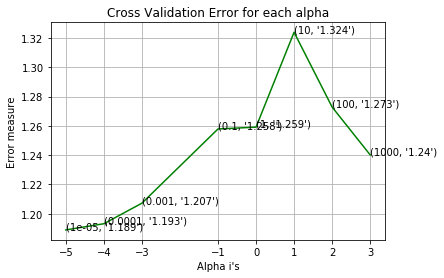

For values of best alpha =  1e-05 The train log loss is: 0.8519489419614159
For values of best alpha =  1e-05 The Cross Validation log loss is: 1.1889225050501704
For values of best alpha =  1e-05 The test log loss is: 1.3314642780536623


In [96]:
#Applying the same Model that was applied previously with BOW Implementation

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_TFIDF = []
for i in alpha:
    print("for alpha =", i)
    
    clf = MultinomialNB(alpha=i)
    clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)
    
    sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sigmoid_clf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
    sigmoid_clf_probs = sigmoid_clf.predict_proba(TFIDF_cv_x_onehotencoding)
    
    cv_log_error_TFIDF.append(log_loss(TFIDF_cv_y, sigmoid_clf_probs, labels=clf.classes_, eps=1e-15))
    
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(TFIDF_cv_y, sigmoid_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_TFIDF,c='g')
for i, txt in enumerate(np.round(cv_log_error_TFIDF,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_TFIDF[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_TFIDF)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)
sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
sigmoid_clf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)


predict_y = sigmoid_clf.predict_proba(TFIDF_train_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(TFIDF_train_y, predict_y,
                                                                               labels=clf.classes_, eps=1e-15))
predict_y = sigmoid_clf.predict_proba(TFIDF_cv_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The Cross Validation log loss is:",log_loss(TFIDF_cv_y,
                                                                        predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(TFIDF_test_y, predict_y, 
                                                                                labels=clf.classes_, eps=1e-15))

<h4>5.1.1.2. Testing the model with Best Hyper Parameters</h4>

Log Loss : 1.1889225050501704
Number of missclassified point : 0.3383458646616541
-------------------- Confusion matrix --------------------


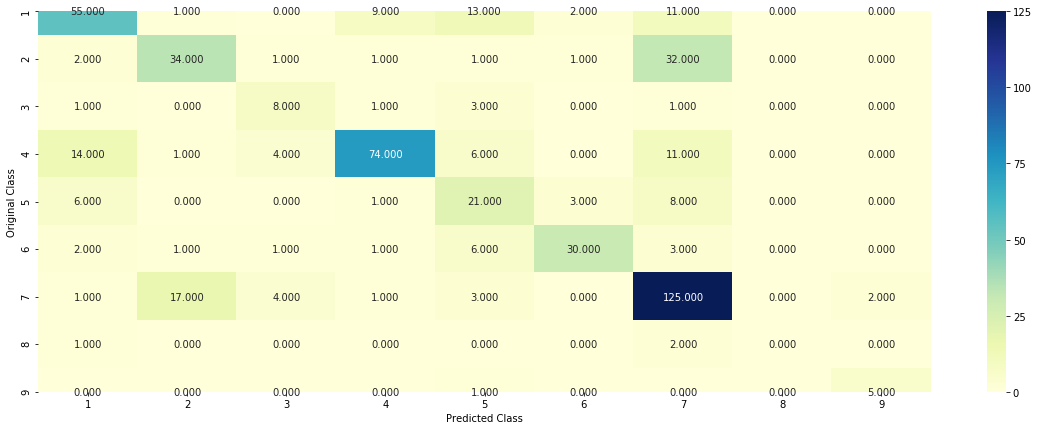

-------------------- Precision matrix (Columm Sum=1) --------------------


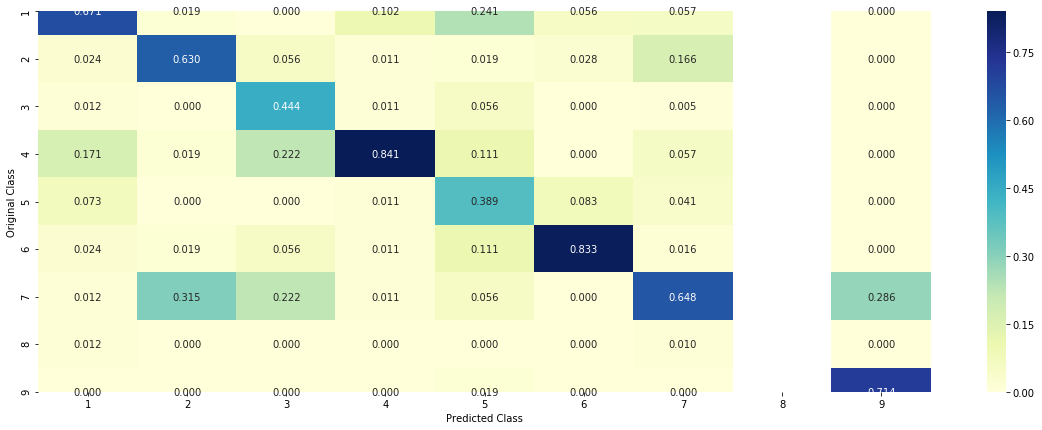

-------------------- Recall matrix (Row sum=1) --------------------


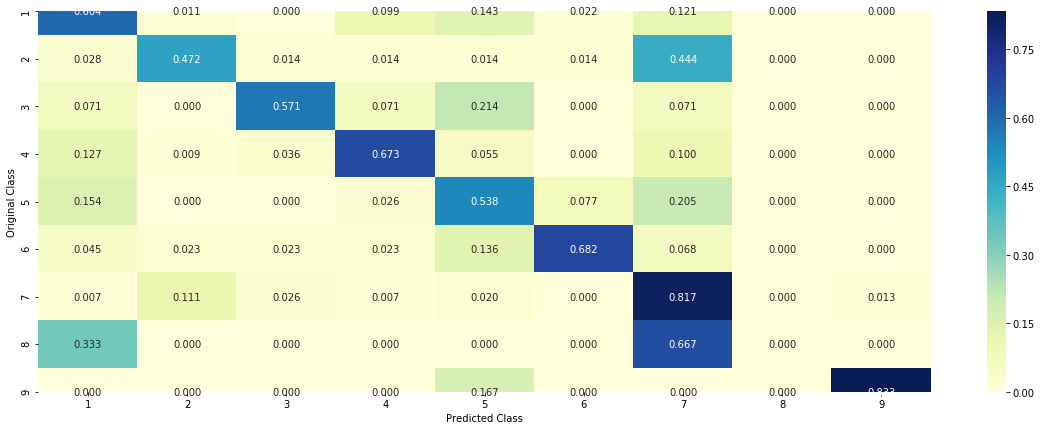

In [97]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)

sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
sigmoid_clf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
sigmoid_clf_probs = sigmoid_clf.predict_proba(TFIDF_cv_x_onehotencoding)

# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(TFIDF_cv_y, sigmoid_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sigmoid_clf.predict(TFIDF_cv_x_onehotencoding)- TFIDF_cv_y)
                                                          )/TFIDF_cv_y.shape[0])
plot_confusion_matrix(TFIDF_cv_y, sigmoid_clf.predict(TFIDF_cv_x_onehotencoding.toarray()))

In [54]:
#We created another function using the TFIDF Implementation because the earlier function :- get_impfeature_names
#was created only with BOW Implementation.

def TFIDF_get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = TfidfVectorizer()
    var_count_vec = TfidfVectorizer()
    text_count_vec = TfidfVectorizer()
    
    gene_vec = gene_count_vec.fit(train_df['Gene'])
    var_vec  = var_count_vec.fit(train_df['Variation'])
    text_vec = text_count_vec.fit(train_df['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

<h4>5.1.1.3. Feature Importance, Incorrectly classified point</h4>

In [99]:
test_point_index =1
no_feature =100

predicted_cls = sigmoid_clf.predict(TFIDF_test_x_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding[test_point_index]),4))

print("Actual Class :", TFIDF_test_y[test_point_index])
indices=np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
TFIDF_get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],
                     test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1078 0.0821 0.0134 0.1039 0.033  0.0325 0.6206 0.0032 0.0035]]
Actual Class : 1
--------------------------------------------------
64 Text feature [dustin] present in test data point [True]
Out of the top  100  features  1 are present in query point


<h4>5.1.1.4. Feature Importance, Correctly classified point</h4>

In [100]:
test_point_index = 100
no_feature = 100
predicted_cls = sigmoid_clf.predict(TFIDF_test_x_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding[test_point_index]),4))

print("Actual Class :", TFIDF_test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
TFIDF_get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index],
                     test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.1108 0.0843 0.0139 0.1058 0.1686 0.3734 0.1363 0.0033 0.0035]]
Actual Class : 6
--------------------------------------------------
Out of the top  100  features  0 are present in query point


<h2>5.2. K Nearest Neighbour Classification (Using TFIDF Representation)</h2>

<h3>5.2.1. Hyper Parameter Tuning</h3>

for alpha = 5
Log Loss : 0.9428689974958668
for alpha = 11
Log Loss : 0.9604355632342658
for alpha = 15
Log Loss : 0.9788076313967776
for alpha = 21
Log Loss : 0.9864290912921524
for alpha = 31
Log Loss : 0.993387857647931
for alpha = 41
Log Loss : 0.996884212187504
for alpha = 51
Log Loss : 1.0146394504335559
for alpha = 99
Log Loss : 1.039076103878536


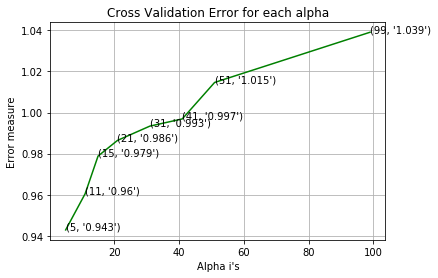

For values of best alpha =  5 The train log loss is: 0.4933779096849355
For values of best alpha =  5 The cross validation log loss is: 0.9428689974958668
For values of best alpha =  5 The test log loss is: 1.128256092291025


In [101]:
#Hyperparameter Tuning to obtain the Best Value of K
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_TFIDF = []

for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_responseCoding,TFIDF_train_y)
    
    sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sigmoid_clf.fit(train_x_responseCoding,TFIDF_train_y)
    sigmoid_clf_probs = sigmoid_clf.predict_proba(cv_x_responseCoding)
    
    cv_log_error_TFIDF.append(log_loss(TFIDF_cv_y, sigmoid_clf_probs, labels=clf.classes_, eps=1e-15))
    
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(TFIDF_cv_y, sigmoid_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_TFIDF,c='g')
for i, txt in enumerate(np.round(cv_log_error_TFIDF,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_TFIDF[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(cv_log_error_TFIDF)

clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding,TFIDF_train_y)

sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
sigmoid_clf.fit(train_x_responseCoding, TFIDF_train_y)

predict_y = sigmoid_clf.predict_proba(train_x_responseCoding)

print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(TFIDF_train_y, predict_y, 
                                                        labels=clf.classes_, eps=1e-15))
predict_y = sigmoid_clf.predict_proba(cv_x_responseCoding)

print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(TFIDF_cv_y,
                                                        predict_y,labels=clf.classes_, eps=1e-15))

predict_y = sigmoid_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(TFIDF_test_y, predict_y, 
                                                        labels=clf.classes_, eps=1e-15))

<h3>5.2.2. Testing the model with best Hyper Parameters</h3>

Log loss : 0.9428689974958668
Number of mis-classified points : 0.3026315789473684
-------------------- Confusion matrix --------------------


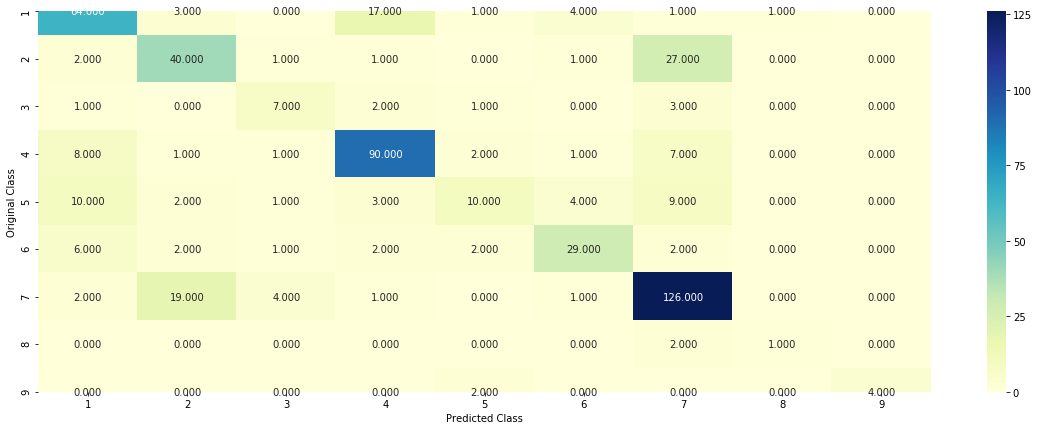

-------------------- Precision matrix (Columm Sum=1) --------------------


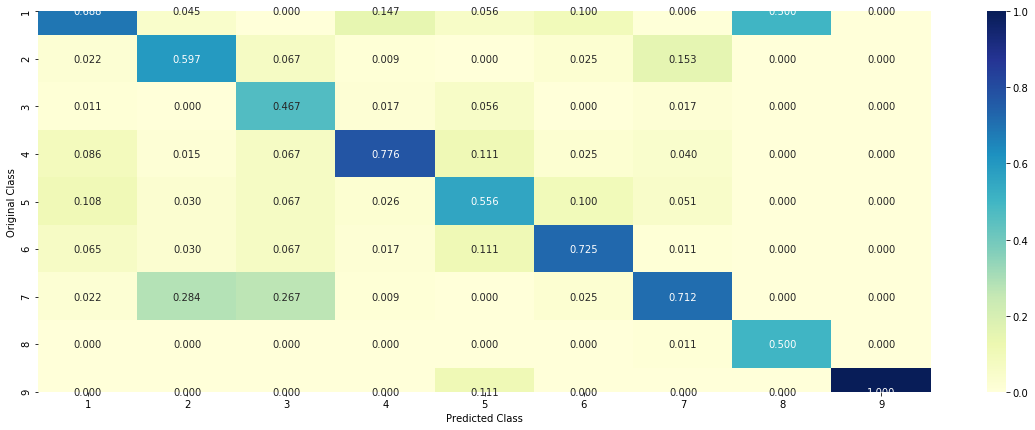

-------------------- Recall matrix (Row sum=1) --------------------


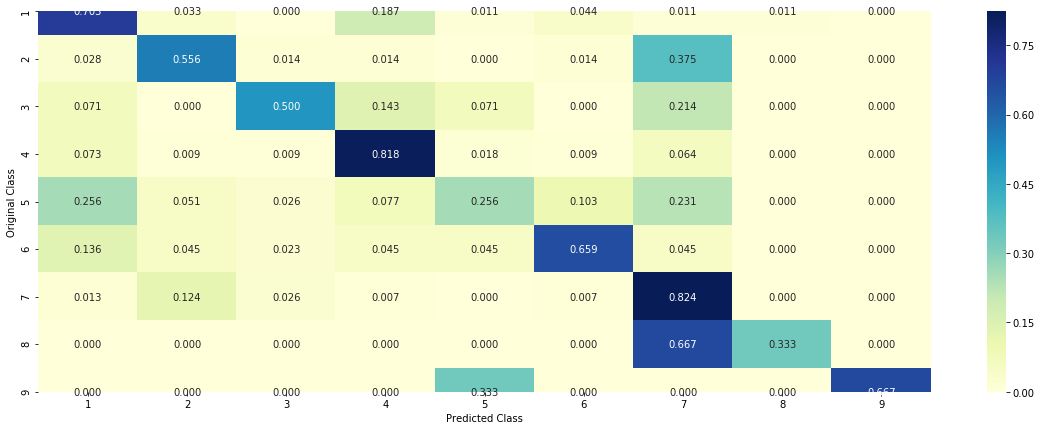

In [102]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_responseCoding, TFIDF_train_y, cv_x_responseCoding, TFIDF_cv_y, clf)

<h3>5.2.3. Sample Query point -1</h3>

In [103]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, TFIDF_train_y)
sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
sigmoid_clf.fit(train_x_responseCoding, TFIDF_train_y)

test_point_index = 1
predicted_cls = sigmoid_clf.predict(test_x_responseCoding[0].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])

print("Actual Class :", TFIDF_test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])

print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(TFIDF_train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 1
The  5  nearest neighbours of the test points belongs to classes [1 1 1 1 1]
Fequency of nearest points : Counter({1: 5})


<h3>5.2.4. Sample Query Point-2 </h3>

In [104]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_responseCoding, TFIDF_train_y)
sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
sigmoid_clf.fit(train_x_responseCoding, TFIDF_train_y)

test_point_index = 100

predicted_cls = sigmoid_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])

print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_responseCoding[test_point_index].reshape(1, -1), alpha[best_alpha])

print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",
                   TFIDF_train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(TFIDF_train_y[neighbors[1][0]]))

Predicted Class : 6
Actual Class : 6
the k value for knn is 5 and the nearest neighbours of the test points belongs to classes [6 6 6 1 6]
Fequency of nearest points : Counter({6: 4, 1: 1})


<h2>5.3. Logistic Regression (Using TFIDF Representation)</h2>

<h3>5.3.1. With Class balancing & Using TFIDF Representation</h3>

<h4>5.3.1.1. Hyper Parameter Tuning</h4>

for alpha = 1e-06
Log Loss : 1.3528875785902457
for alpha = 1e-05
Log Loss : 1.3066634669190245
for alpha = 0.0001
Log Loss : 1.0745881604782883
for alpha = 0.001
Log Loss : 1.0274891746931274
for alpha = 0.01
Log Loss : 1.0473289971145507
for alpha = 0.1
Log Loss : 1.1653855205038157
for alpha = 1
Log Loss : 1.4392892862378979
for alpha = 10
Log Loss : 1.4884397645595677
for alpha = 100
Log Loss : 1.4935828111915153


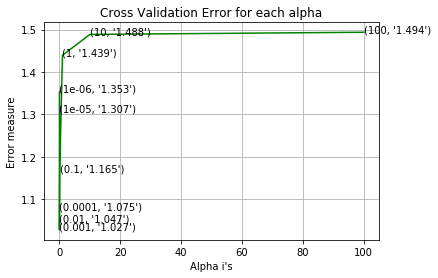

For values of best alpha =  0.001 The train log loss is: 0.5373479082638635
For values of best alpha =  0.001 The cross validation log loss is: 1.0274891746931274
For values of best alpha =  0.001 The test log loss is: 1.195566391891457


In [105]:
#Hyperparameter Tuning :- With Class Balancing & TFIDF Implementation

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_TFIDF = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
    
    sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sigmoid_clf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
    
    sigmoid_clf_probs = sigmoid_clf.predict_proba(TFIDF_cv_x_onehotencoding)
    cv_log_error_TFIDF.append(log_loss(TFIDF_cv_y, sigmoid_clf_probs, labels=clf.classes_, eps=1e-15))
    
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(TFIDF_cv_y, sigmoid_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_TFIDF,c='g')
for i, txt in enumerate(np.round(cv_log_error_TFIDF,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_TFIDF[i]))
    
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_TFIDF)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)

sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
sigmoid_clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)

predict_y = sigmoid_clf.predict_proba(TFIDF_train_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(TFIDF_train_y, predict_y, 
                                     labels=clf.classes_, eps=1e-15))

predict_y = sigmoid_clf.predict_proba(TFIDF_cv_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(TFIDF_cv_y, 
                                     predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(TFIDF_test_y, predict_y, 
                                     labels=clf.classes_, eps=1e-15))

<h4>5.3.1.2. Testing the model with Best Hyper Parameters</h4>

Log loss : 1.0274891746931274
Number of mis-classified points : 0.3383458646616541
-------------------- Confusion matrix --------------------


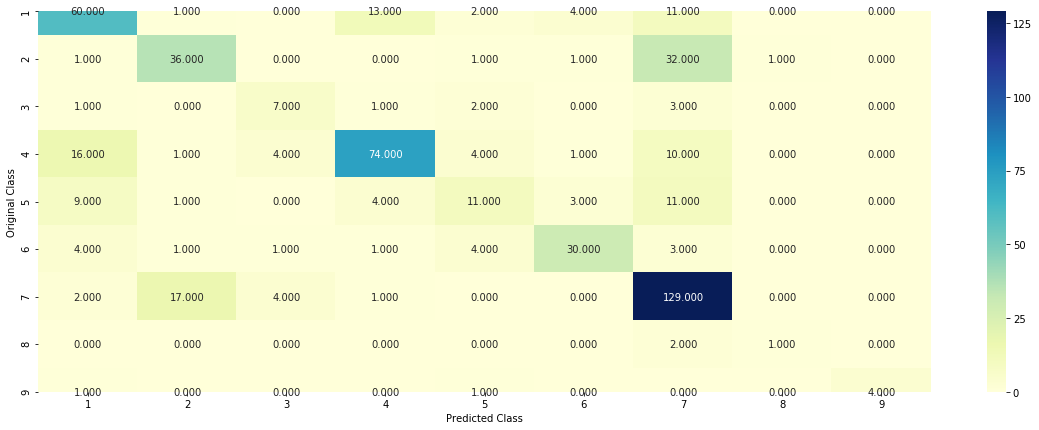

-------------------- Precision matrix (Columm Sum=1) --------------------


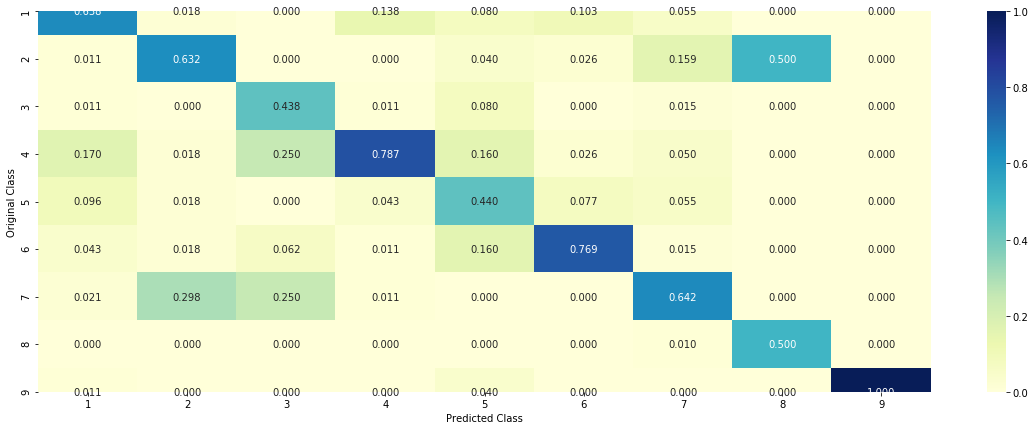

-------------------- Recall matrix (Row sum=1) --------------------


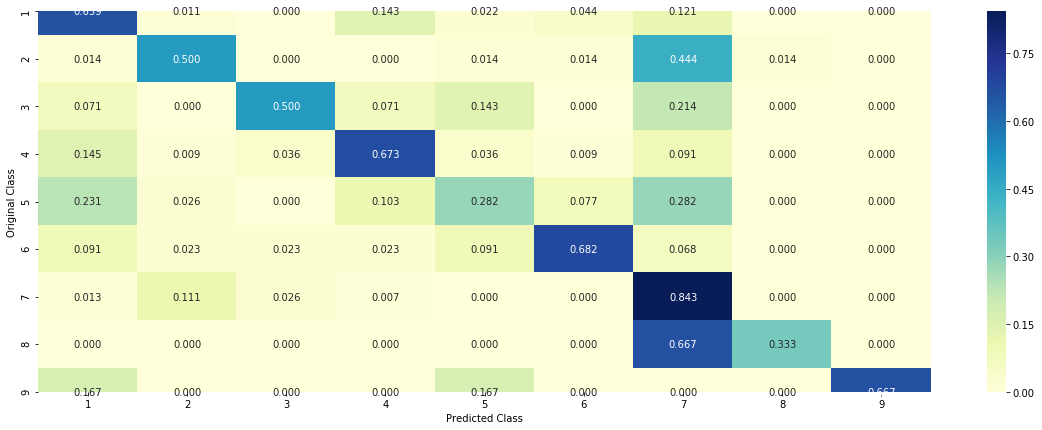

In [106]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(TFIDF_train_x_onehotencoding, TFIDF_train_y, TFIDF_cv_x_onehotencoding,
                                  TFIDF_cv_y, clf)

<h4>5.3.1.3. Feature Importance</h4>

<h5>5.3.1.3.1. Incorrectly Classified point</h5>

In [107]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)

test_point_index = 1
no_feature = 500
predicted_cls = sigmoid_clf.predict(TFIDF_test_x_onehotencoding[test_point_index])

print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding[test_point_index]),4))

print("Actual Class :", TFIDF_test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)

TFIDF_get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],
                 test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[1.213e-01 8.640e-02 2.800e-03 5.236e-01 7.200e-03 6.100e-03 2.365e-01
  1.600e-02 1.000e-04]]
Actual Class : 1
--------------------------------------------------
89 Text feature [recently] present in test data point [True]
100 Text feature [activation] present in test data point [True]
102 Text feature [inhibitor] present in test data point [True]
104 Text feature [constitutively] present in test data point [True]
123 Text feature [harboring] present in test data point [True]
124 Text feature [amplification] present in test data point [True]
126 Text feature [activating] present in test data point [True]
134 Text feature [treated] present in test data point [True]
141 Text feature [treatment] present in test data point [True]
142 Text feature [independent] present in test data point [True]
160 Text feature [therapeutic] present in test data point [True]
165 Text feature [harbor] present in test data point [True]
166 Text feature [exp

<h5>5.3.1.3.2. Correctly Classified point</h5>

In [108]:
test_point_index = 100
no_feature = 500
predicted_cls = sigmoid_clf.predict(TFIDF_test_x_onehotencoding[test_point_index])

print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding[test_point_index]),4))

print("Actual Class :", TFIDF_test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)

TFIDF_get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],
                    test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.0427 0.0202 0.0044 0.0203 0.331  0.5644 0.0129 0.0034 0.0007]]
Actual Class : 6
--------------------------------------------------
73 Text feature [cell] present in test data point [True]
74 Text feature [expression] present in test data point [True]
77 Text feature [suggesting] present in test data point [True]
78 Text feature [expressed] present in test data point [True]
80 Text feature [described] present in test data point [True]
84 Text feature [consistent] present in test data point [True]
86 Text feature [suggest] present in test data point [True]
138 Text feature [results] present in test data point [True]
155 Text feature [levels] present in test data point [True]
160 Text feature [fell] present in test data point [True]
170 Text feature [findings] present in test data point [True]
174 Text feature [previously] present in test data point [True]
182 Text feature [revealed] present in test data point [True]
203 Text feature 

<h3>5.3.2. Without Class balancing & Using TFIDF Representation </h3>

<h4>5.3.2.1. Hyper Parameter Tuning</h4>

for alpha = 1e-06
Log Loss : 1.3021781761206839
for alpha = 1e-05
Log Loss : 1.2671891736902665
for alpha = 0.0001
Log Loss : 1.075358512920842
for alpha = 0.001
Log Loss : 1.0507687381258184
for alpha = 0.01
Log Loss : 1.0991557895633393
for alpha = 0.1
Log Loss : 1.1774400801297416
for alpha = 1
Log Loss : 1.422949213826467


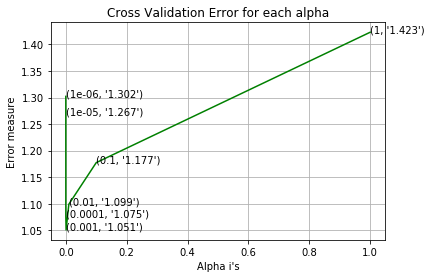

For values of best alpha =  0.001 The train log loss is: 0.541306288045727
For values of best alpha =  0.001 The cross validation log loss is: 1.0507687381258184
For values of best alpha =  0.001 The test log loss is: 1.212738628194154


In [109]:
# Class Balancing is removed and with this, TFIDF is implemented

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_TFIDF = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
    
    sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sigmoid_clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)
    sigmoid_clf_probs = sigmoid_clf.predict_proba(TFIDF_cv_x_onehotencoding)
    
    cv_log_error_TFIDF.append(log_loss(TFIDF_cv_y, sigmoid_clf_probs,labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(TFIDF_cv_y, sigmoid_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_TFIDF,c='g')
for i, txt in enumerate(np.round(cv_log_error_TFIDF,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_TFIDF[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_TFIDF)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)

sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
sigmoid_clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)

predict_y = sigmoid_clf.predict_proba(TFIDF_train_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(TFIDF_train_y, predict_y,
                                     labels=clf.classes_, eps=1e-15))

predict_y = sigmoid_clf.predict_proba(TFIDF_cv_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(TFIDF_cv_y,
                                     predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(TFIDF_test_y, predict_y, 
                                     labels=clf.classes_, eps=1e-15))

<h4>5.3.2.2. Testing model with Best Hyper Parameters</h4>

Log loss : 1.0507687381258184
Number of mis-classified points : 0.33458646616541354
-------------------- Confusion matrix --------------------


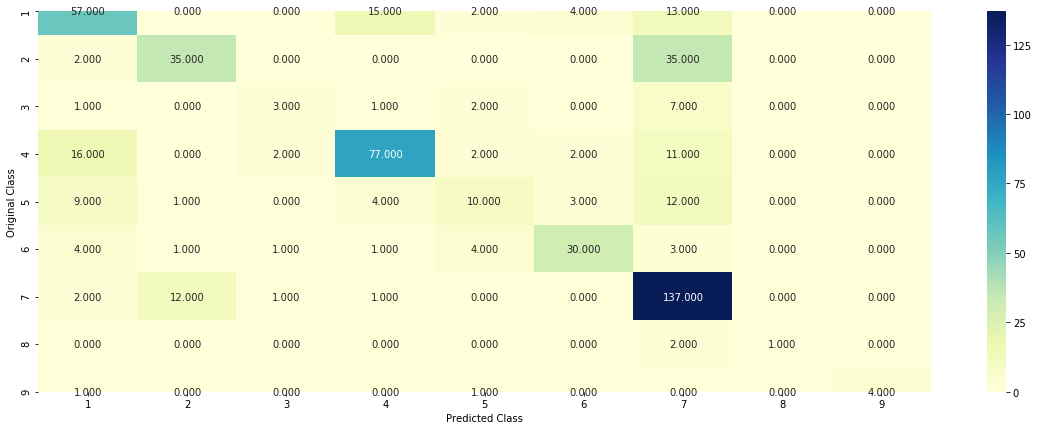

-------------------- Precision matrix (Columm Sum=1) --------------------


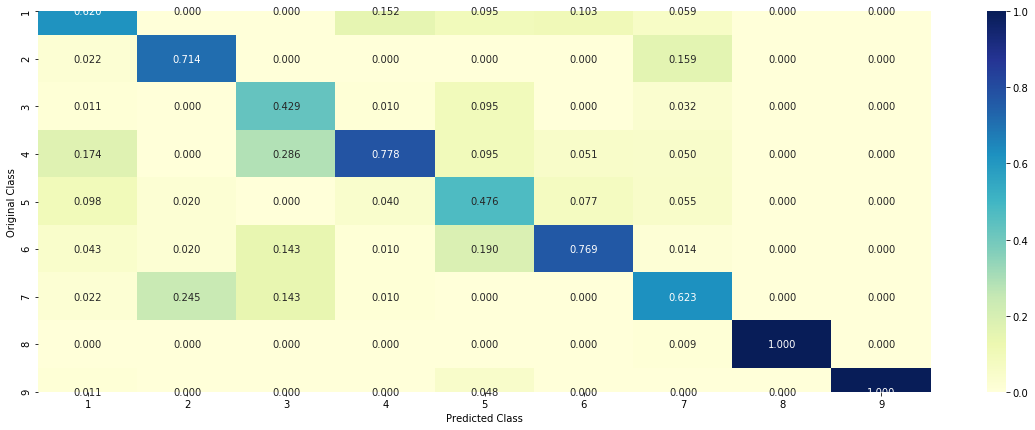

-------------------- Recall matrix (Row sum=1) --------------------


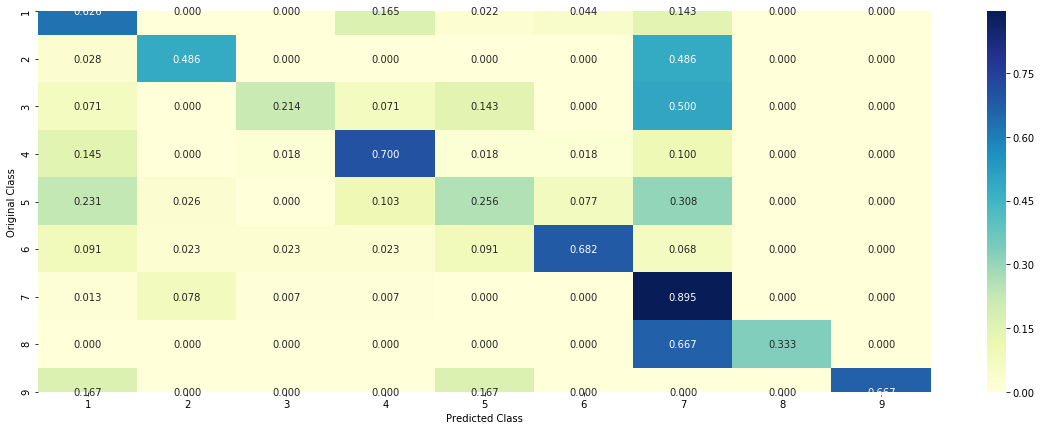

In [110]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(TFIDF_train_x_onehotencoding,TFIDF_train_y,TFIDF_cv_x_onehotencoding,
                                  TFIDF_cv_y, clf)

<h4>5.3.2.3. Feature Importance, Incorrectly Classified point</h4>

In [111]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)
test_point_index = 1
no_feature = 500

predicted_cls = sigmoid_clf.predict(TFIDF_test_x_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding[test_point_index]),4))

print("Actual Class :", TFIDF_test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
TFIDF_get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],
                 test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1154 0.079  0.0012 0.5217 0.0043 0.0041 0.2723 0.0021 0.    ]]
Actual Class : 1
--------------------------------------------------
174 Text feature [activation] present in test data point [True]
175 Text feature [recently] present in test data point [True]
177 Text feature [inhibitor] present in test data point [True]
181 Text feature [constitutively] present in test data point [True]
200 Text feature [harboring] present in test data point [True]
201 Text feature [amplification] present in test data point [True]
205 Text feature [activating] present in test data point [True]
216 Text feature [treated] present in test data point [True]
227 Text feature [treatment] present in test data point [True]
228 Text feature [therapeutic] present in test data point [True]
233 Text feature [germline] present in test data point [True]
237 Text feature [harbor] present in test data point [True]
239 Text feature [independent] present in test data 

<h4>5.3.2.4. Feature Importance, Correctly Classified point</h4>

In [112]:
test_point_index = 100
no_feature = 500

predicted_cls = sigmoid_clf.predict(TFIDF_test_x_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding[test_point_index]),4))

print("Actual Class :", TFIDF_test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
TFIDF_get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],test_df['Gene'].iloc[test_point_index]
                           ,test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[4.470e-02 2.180e-02 3.700e-03 2.350e-02 3.151e-01 5.724e-01 1.640e-02
  2.200e-03 3.000e-04]]
Actual Class : 6
--------------------------------------------------
63 Text feature [cell] present in test data point [True]
64 Text feature [expression] present in test data point [True]
66 Text feature [suggesting] present in test data point [True]
67 Text feature [expressed] present in test data point [True]
68 Text feature [described] present in test data point [True]
71 Text feature [consistent] present in test data point [True]
72 Text feature [suggest] present in test data point [True]
73 Text feature [results] present in test data point [True]
81 Text feature [levels] present in test data point [True]
85 Text feature [previously] present in test data point [True]
99 Text feature [findings] present in test data point [True]
134 Text feature [revealed] present in test data point [True]
172 Text feature [fell] present in test data point

<h2>5.4. Linear Support Vector Machines (Using TFIDF Representation)</h2>

<h3>5.4.1. Hyper Parameter Tuning</h3>

for C = 1e-05
Log Loss : 1.3010418552787115
for C = 0.0001
Log Loss : 1.274043966226041
for C = 0.001
Log Loss : 1.1132870798438284
for C = 0.01
Log Loss : 1.1549244577213487
for C = 0.1
Log Loss : 1.3056366816447502
for C = 1
Log Loss : 1.519715575472072
for C = 10
Log Loss : 1.519676932298167
for C = 100
Log Loss : 1.5196769277113373


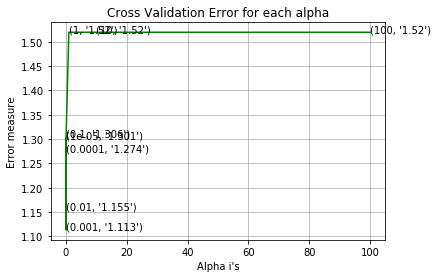

For values of best alpha =  0.001 The train log loss is: 0.665932952394232
For values of best alpha =  0.001 The cross validation log loss is: 1.1132870798438284
For values of best alpha =  0.001 The test log loss is: 1.1686889776893752


In [56]:
#Hyperparameter Tuning to obtain the Best value of alpha

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_TFIDF = []
for i in alpha:
    print("for C =", i)
    
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)
    
    sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sigmoid_clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)
    sigmoid_clf_probs = sigmoid_clf.predict_proba(TFIDF_cv_x_onehotencoding)
    
    cv_log_error_TFIDF.append(log_loss(TFIDF_cv_y, sigmoid_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(TFIDF_cv_y, sigmoid_clf_probs)) 

# Plotting to obtain the best value of alpha on the CV Dataset

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_TFIDF,c='g')
for i, txt in enumerate(np.round(cv_log_error_TFIDF,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_TFIDF[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_TFIDF)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)

sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
sigmoid_clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)

predict_y = sigmoid_clf.predict_proba(TFIDF_train_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(TFIDF_train_y,predict_y, 
                                     labels=clf.classes_, eps=1e-15))

predict_y = sigmoid_clf.predict_proba(TFIDF_cv_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(TFIDF_cv_y, 
                                     predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(TFIDF_test_y, predict_y,
                                     labels=clf.classes_, eps=1e-15))

<h3>5.4.2. Testing model with Best Hyper Parameters</h3>

Log loss : 1.0843317280955258
Number of mis-classified points : 0.3383458646616541
-------------------- Confusion matrix --------------------


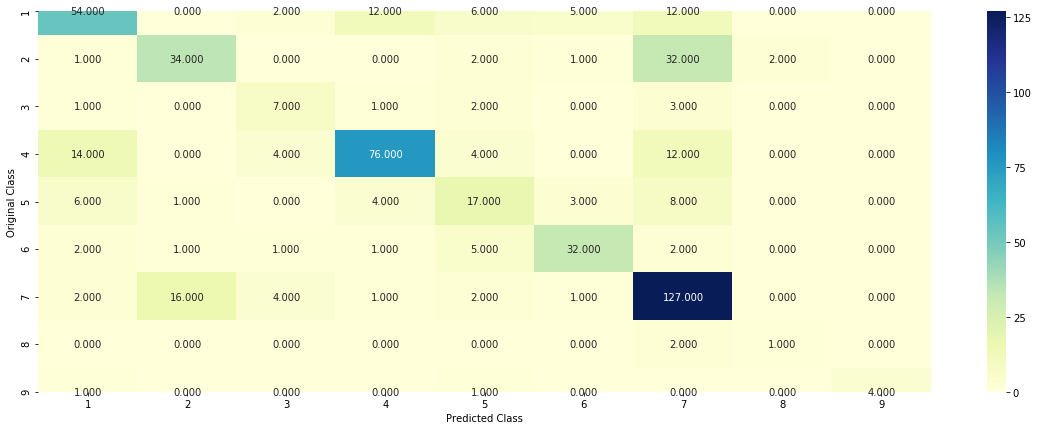

-------------------- Precision matrix (Columm Sum=1) --------------------


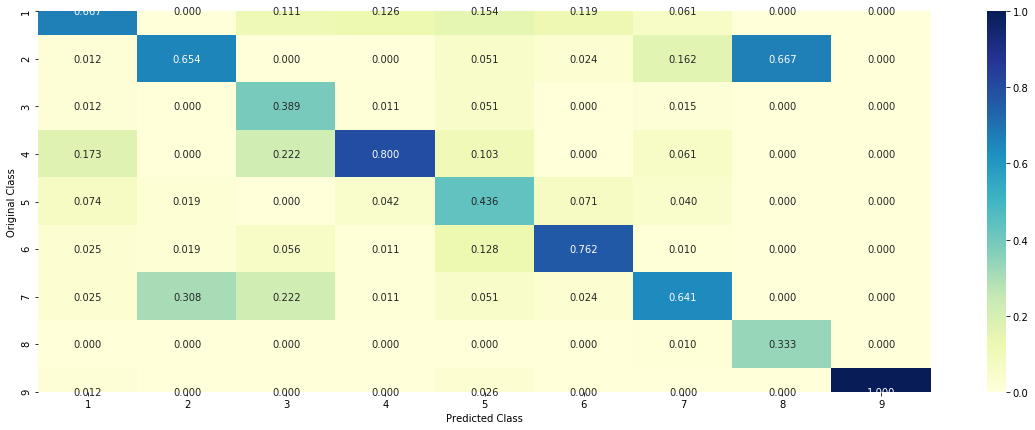

-------------------- Recall matrix (Row sum=1) --------------------


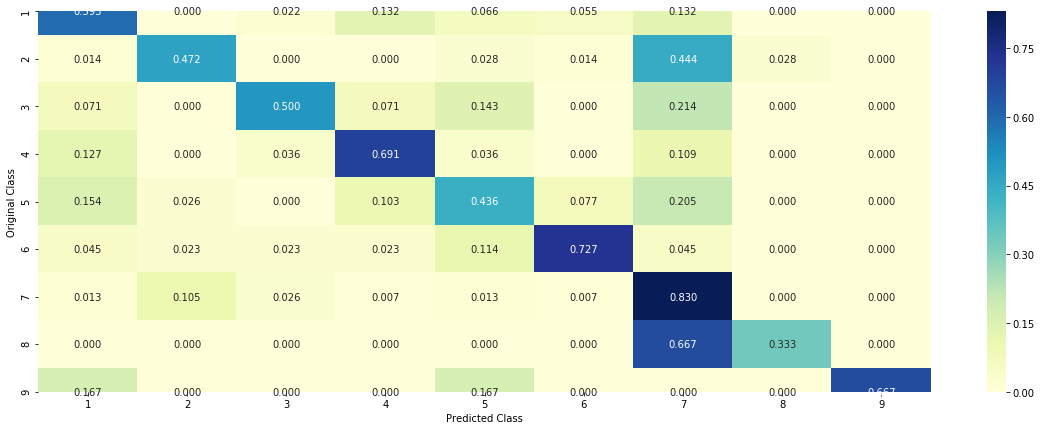

In [114]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(TFIDF_train_x_onehotencoding,TFIDF_train_y,TFIDF_cv_x_onehotencoding,TFIDF_cv_y,
                                  clf)

<h3>5.4.3. Feature Importance</h3>

<h4>5.4.3.1. For Incorrectly classified point</h4>

In [115]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)
test_point_index = 1
no_feature = 500

predicted_cls = sigmoid_clf.predict(TFIDF_test_x_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding[test_point_index]),4))

print("Actual Class :", TFIDF_test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
TFIDF_get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],
                test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1345 0.0857 0.0097 0.4771 0.023  0.0144 0.232  0.01   0.0135]]
Actual Class : 1
--------------------------------------------------
267 Text feature [amplification] present in test data point [True]
290 Text feature [come] present in test data point [True]
327 Text feature [controlled] present in test data point [True]
329 Text feature [sequential] present in test data point [True]
348 Text feature [germline] present in test data point [True]
355 Text feature [sodium] present in test data point [True]
356 Text feature [attributed] present in test data point [True]
420 Text feature [local] present in test data point [True]
446 Text feature [young] present in test data point [True]
458 Text feature [gave] present in test data point [True]
463 Text feature [hereditary] present in test data point [True]
Out of the top  500  features  11 are present in query point


<h4>5.4.3.2. For Correctly classified point</h4>

In [57]:
test_point_index = 100
no_feature = 500

predicted_cls = sigmoid_clf.predict(TFIDF_test_x_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", 
      np.round(sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding[test_point_index]),4))

print("Actual Class :", TFIDF_test_y[test_point_index])
indices = np.argsort(-1*abs(clf.coef_))[predicted_cls-1][:,:no_feature]
print("-"*50)
TFIDF_get_impfeature_names(indices[0], test_df['TEXT'].iloc[test_point_index],
                test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 1
Predicted Class Probabilities: [[0.5455 0.0446 0.0028 0.0288 0.3084 0.002  0.0599 0.0049 0.0032]]
Actual Class : 1
--------------------------------------------------
Out of the top  500  features  0 are present in query point


<h2>5.5 Random Forest Classifier (Using TFIDF Representation)</h2>

<h3>5.5.1. Hyper Parameter tuning (With One hot Encoding)</h3>

In [116]:
#Total 10 Combinations of alpha and max_depth taken to obtain the Best pair that minimizes CV log loss. 

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_TFIDF = []

for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)
        
        sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sigmoid_clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)
        sigmoid_clf_probs = sigmoid_clf.predict_proba(TFIDF_cv_x_onehotencoding)
        
        cv_log_error_TFIDF.append(log_loss(TFIDF_cv_y, sigmoid_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(TFIDF_cv_y, sigmoid_clf_probs)) 

#Training on the Best Value of alpha obtained above:
best_alpha = np.argmin(cv_log_error_TFIDF)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/3)], criterion='gini', 
                             max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)

sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
sigmoid_clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)

#Obtaining the Log Loss Values for Train, CV and Test Data based on best hyperparameters.
predict_y = sigmoid_clf.predict_proba(TFIDF_train_x_onehotencoding)
print('For values of best estimator = ', alpha[int(best_alpha/3)], 
      "The train log loss is:",log_loss(TFIDF_train_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sigmoid_clf.predict_proba(TFIDF_cv_x_onehotencoding)
print('For values of best estimator = ', alpha[int(best_alpha/3)],
      "The cross validation log loss is:",log_loss(TFIDF_cv_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding)
print('For values of best estimator = ', alpha[int(best_alpha/3)], 
      "The test log loss is:",log_loss(TFIDF_test_y, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.2056462562953498
for n_estimators = 100 and max depth =  10
Log Loss : 1.1199653040096942
for n_estimators = 200 and max depth =  5
Log Loss : 1.2071208028611635
for n_estimators = 200 and max depth =  10
Log Loss : 1.1110183752944651
for n_estimators = 500 and max depth =  5
Log Loss : 1.1766387668891465
for n_estimators = 500 and max depth =  10
Log Loss : 1.107449541867492
for n_estimators = 1000 and max depth =  5
Log Loss : 1.1720652230515645
for n_estimators = 1000 and max depth =  10
Log Loss : 1.1062898918908988
for n_estimators = 2000 and max depth =  5
Log Loss : 1.1642064851095142
for n_estimators = 2000 and max depth =  10
Log Loss : 1.1040935687466578
For values of best estimator =  1000 The train log loss is: 0.6943862737154962
For values of best estimator =  1000 The cross validation log loss is: 1.1062898918908988
For values of best estimator =  1000 The test log loss is: 1.2085706426556893


<h3>5.5.2. Testing model with best hyper parameters (One Hot Encoding)</h3>

Log loss : 1.1062898918908988
Number of mis-classified points : 0.3533834586466165
-------------------- Confusion matrix --------------------


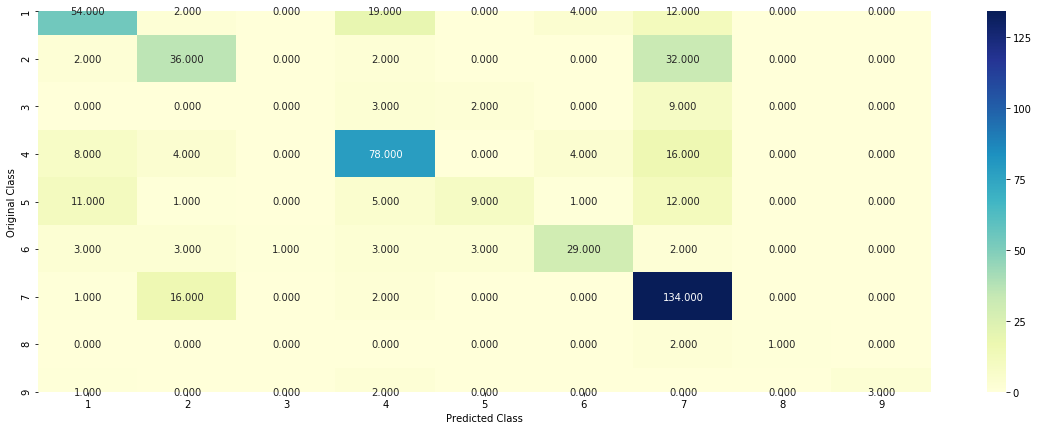

-------------------- Precision matrix (Columm Sum=1) --------------------


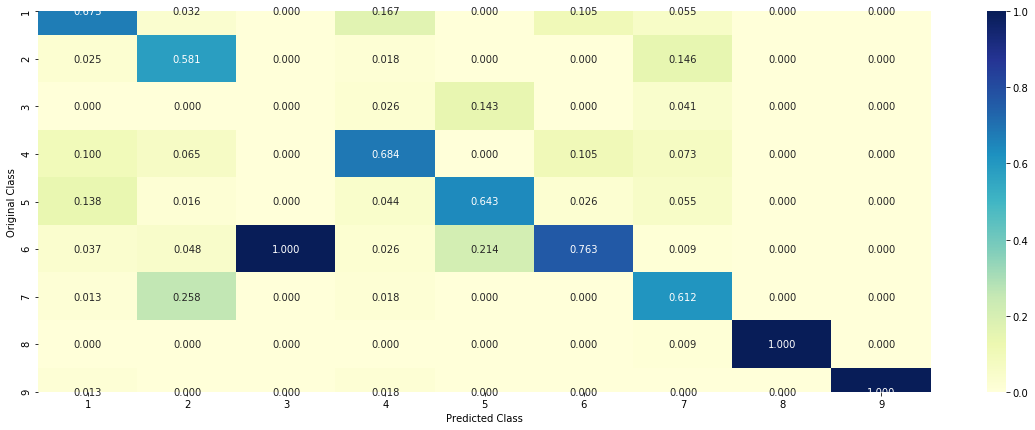

-------------------- Recall matrix (Row sum=1) --------------------


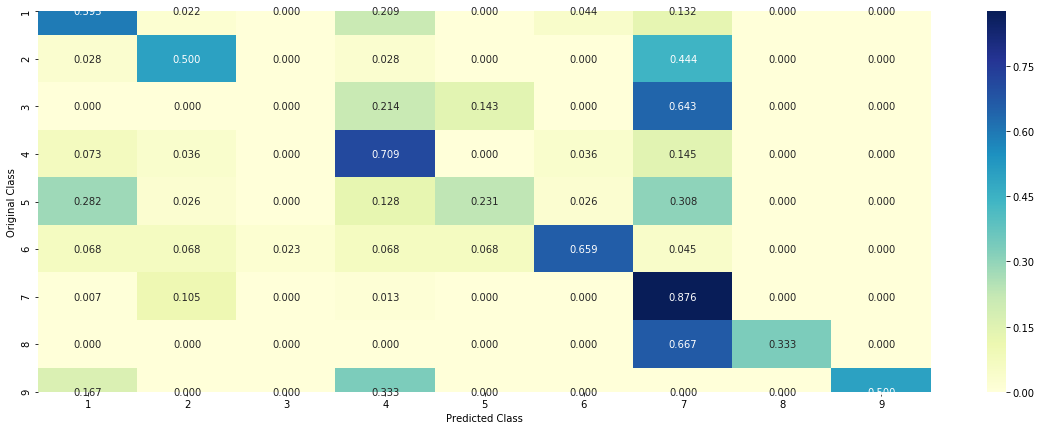

In [117]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/3)], criterion='gini',
                             max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(TFIDF_train_x_onehotencoding,TFIDF_train_y,TFIDF_cv_x_onehotencoding,TFIDF_cv_y,
                                  clf)

<h3>5.5.3. Feature Importance</h3>

<h4>5.5.3.1. Incorrectly Classified point</h4>

In [118]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/3)], criterion='gini', 
                             max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
sigmoid_clf.fit(TFIDF_train_x_onehotencoding,TFIDF_train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sigmoid_clf.predict(TFIDF_test_x_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", 
                            np.round(sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding[test_point_index]),4))

print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
TFIDF_get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],
                test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.1796 0.2319 0.0236 0.0827 0.0511 0.046  0.3639 0.0106 0.0106]]
Actual Class : 1
--------------------------------------------------
1 Text feature [activation] present in test data point [True]
2 Text feature [activating] present in test data point [True]
4 Text feature [treatment] present in test data point [True]
6 Text feature [activated] present in test data point [True]
8 Text feature [downstream] present in test data point [True]
9 Text feature [loss] present in test data point [True]
11 Text feature [oncogenic] present in test data point [True]
12 Text feature [constitutive] present in test data point [True]
13 Text feature [inhibitor] present in test data point [True]
14 Text feature [growth] present in test data point [True]
15 Text feature [suppressor] present in test data point [True]
16 Text feature [inhibition] present in test data point [True]
19 Text feature [nonsense] present in test data point [True]
20 Text feature

<h4>5.5.3.2. Correctly Classified point</h4>

In [119]:
test_point_index = 100
no_feature = 100

predicted_cls = sigmoid_clf.predict(TFIDF_test_x_onehotencoding[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", 
                          np.round(sigmoid_clf.predict_proba(TFIDF_test_x_onehotencoding[test_point_index]),4))

print("Actual Class :", TFIDF_test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
TFIDF_get_impfeature_names(indices[:no_feature], test_df['TEXT'].iloc[test_point_index],
                 test_df['Gene'].iloc[test_point_index],test_df['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 6
Predicted Class Probabilities: [[0.1331 0.0273 0.0219 0.1019 0.1419 0.5405 0.0246 0.004  0.005 ]]
Actual Class : 6
--------------------------------------------------
9 Text feature [loss] present in test data point [True]
21 Text feature [missense] present in test data point [True]
25 Text feature [function] present in test data point [True]
36 Text feature [brca1] present in test data point [True]
37 Text feature [cell] present in test data point [True]
41 Text feature [receptor] present in test data point [True]
48 Text feature [proteins] present in test data point [True]
52 Text feature [functional] present in test data point [True]
54 Text feature [variant] present in test data point [True]
58 Text feature [predicted] present in test data point [True]
59 Text feature [pathogenic] present in test data point [True]
66 Text feature [protein] present in test data point [True]
73 Text feature [deleterious] present in test data point [True]
75 Text feature [functions]

<h3>5.5.4. Hyper parameter Tuning (With Response Coding)</h3>

In [120]:
alpha = [10,50,100,200,500,1000]
max_depth = [2,3,5,10]
cv_log_error_TFIDF = []

for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_responseCoding, TFIDF_train_y)
        
        sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sigmoid_clf.fit(train_x_responseCoding,TFIDF_train_y)
        sigmoid_clf_probs = sigmoid_clf.predict_proba(cv_x_responseCoding)
        
        cv_log_error_TFIDF.append(log_loss(TFIDF_cv_y, sigmoid_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(TFIDF_cv_y, sigmoid_clf_probs)) 

best_alpha = np.argmin(cv_log_error_TFIDF)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini',
                             max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding, TFIDF_train_y)

sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
sigmoid_clf.fit(train_x_responseCoding,TFIDF_train_y)

predict_y = sigmoid_clf.predict_proba(train_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], 
            "The train log loss is:",log_loss(TFIDF_train_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sigmoid_clf.predict_proba(cv_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], 
      "The cross validation log loss is:",log_loss(TFIDF_cv_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sigmoid_clf.predict_proba(test_x_responseCoding)
print('For values of best alpha = ', alpha[int(best_alpha/4)], 
      "The test log loss is:",log_loss(TFIDF_test_y, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 10 and max depth =  2
Log Loss : 1.9840420181198548
for n_estimators = 10 and max depth =  3
Log Loss : 1.5630057633989198
for n_estimators = 10 and max depth =  5
Log Loss : 1.4837248114565642
for n_estimators = 10 and max depth =  10
Log Loss : 1.6387862220554854
for n_estimators = 50 and max depth =  2
Log Loss : 1.5141353281326795
for n_estimators = 50 and max depth =  3
Log Loss : 1.346681146561361
for n_estimators = 50 and max depth =  5
Log Loss : 1.2500358832395029
for n_estimators = 50 and max depth =  10
Log Loss : 1.6782526234964072
for n_estimators = 100 and max depth =  2
Log Loss : 1.4232927599594758
for n_estimators = 100 and max depth =  3
Log Loss : 1.3780442247864102
for n_estimators = 100 and max depth =  5
Log Loss : 1.1803583415042407
for n_estimators = 100 and max depth =  10
Log Loss : 1.606282151698521
for n_estimators = 200 and max depth =  2
Log Loss : 1.529774876066893
for n_estimators = 200 and max depth =  3
Log Loss : 1.399497258061828
f

<h3>5.5.5. Testing model with Best Hyper Parameters (Response Coding)</h3>

Log loss : 1.1803583415042407
Number of mis-classified points : 0.4041353383458647
-------------------- Confusion matrix --------------------


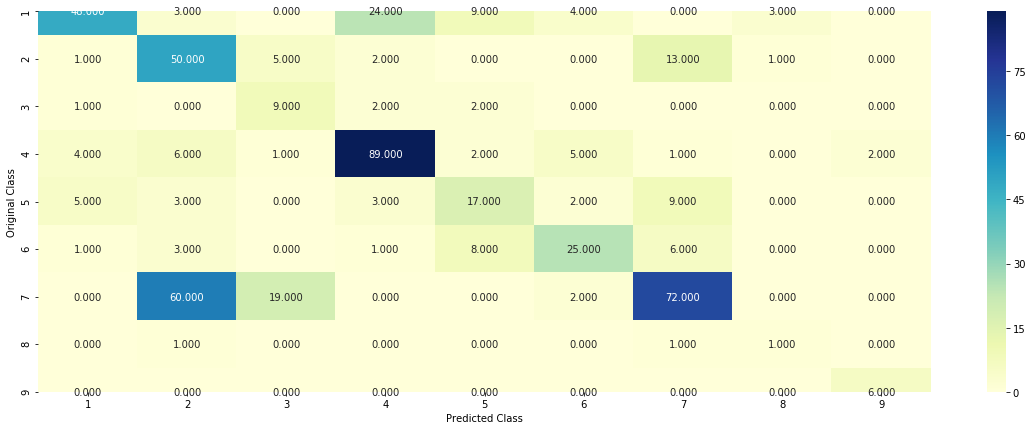

-------------------- Precision matrix (Columm Sum=1) --------------------


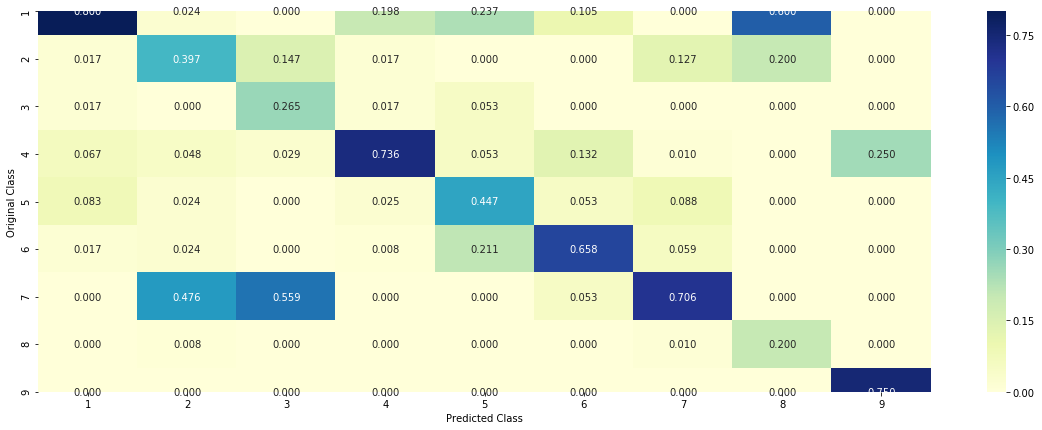

-------------------- Recall matrix (Row sum=1) --------------------


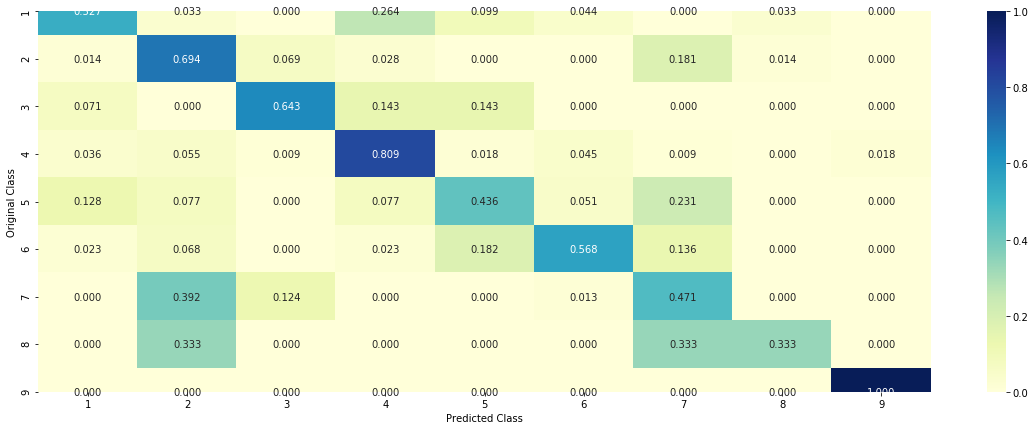

In [121]:
clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%4)], 
                    n_estimators=alpha[int(best_alpha/4)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_responseCoding, TFIDF_train_y,cv_x_responseCoding,TFIDF_cv_y, clf)

<h3>5.5.6. Feature Importance</h3>

<h4>5.5.6.1. Correctly Classified point</h4>

In [122]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/4)], criterion='gini',
                             max_depth=max_depth[int(best_alpha%4)], random_state=42, n_jobs=-1)
clf.fit(train_x_responseCoding,TFIDF_train_y)
sigmoid_clf = CalibratedClassifierCV(clf, method="sigmoid")
sigmoid_clf.fit(train_x_responseCoding,TFIDF_train_y)


test_point_index = 1
no_feature = 27
predicted_cls = sigmoid_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", 
      np.round(sigmoid_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))

print("Actual Class :", TFIDF_test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 1
Predicted Class Probabilities: [[0.8741 0.0038 0.0026 0.0952 0.0017 0.0073 0.0022 0.0068 0.0063]]
Actual Class : 1
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h4>5.5.6.2. Incorrectly Classified point</h4>

In [123]:
test_point_index = 100
predicted_cls = sigmoid_clf.predict(test_x_responseCoding[test_point_index].reshape(1,-1))

print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", 
      np.round(sigmoid_clf.predict_proba(test_x_responseCoding[test_point_index].reshape(1,-1)),4))

print("Actual Class :", TFIDF_test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
for i in indices:
    if i<9:
        print("Gene is important feature")
    elif i<18:
        print("Variation is important feature")
    else:
        print("Text is important feature")

Predicted Class : 6
Predicted Class Probabilities: [[0.0246 0.0037 0.0186 0.0147 0.4223 0.505  0.0022 0.0043 0.0047]]
Actual Class : 6
--------------------------------------------------
Variation is important feature
Variation is important feature
Variation is important feature
Variation is important feature
Gene is important feature
Variation is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Text is important feature
Gene is important feature
Text is important feature
Text is important feature
Gene is important feature
Variation is important feature
Gene is important feature
Text is important feature
Gene is important feature
Variation is important feature
Text is important feature
Variation is important feature
Text is important feature
Text is important feature
Gene is important feature
Gene is important feature
Gene is important feature


<h2>5.6 Stack the models obtained using TFIDF Representation </h2>

<h3>5.6.1 Testing with Hyper Parameter Tuning</h3>

In [125]:
#Using the Best Hyperparameters obtained separately for each of the Classification Models.

clf1 = SGDClassifier(alpha=0.0001, penalty='l2',class_weight='balanced', loss='log', random_state=0)
clf1.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.001, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = MultinomialNB(alpha=0.001)
clf3.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

#Obtaining Individual Model Log Losses on the CV Dataset
sig_clf1.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
print("Logistic Regression :  Log Loss: %0.2f" % 
              (log_loss(TFIDF_cv_y, sig_clf1.predict_proba(TFIDF_cv_x_onehotencoding))))

sig_clf2.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
print("Support vector machines : Log Loss: %0.2f" % (
               log_loss(TFIDF_cv_y, sig_clf2.predict_proba(TFIDF_cv_x_onehotencoding))))

sig_clf3.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
print("Naive Bayes : Log Loss: %0.2f" % 
               (log_loss(TFIDF_cv_y, sig_clf3.predict_proba(TFIDF_cv_x_onehotencoding))))


print("-"*50)

alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
#meta_classifier is the final layer before the Output is obtained. 
    sclf = StackingClassifier(classifiers=[sig_clf1,sig_clf2,sig_clf3], meta_classifier=lr, 
                              use_probas=True)
    sclf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
    
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % 
                               (i, log_loss(TFIDF_cv_y, sclf.predict_proba(TFIDF_cv_x_onehotencoding))))
    
    log_error =log_loss(TFIDF_cv_y, sclf.predict_proba(TFIDF_cv_x_onehotencoding))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.09
Support vector machines : Log Loss: 1.08
Naive Bayes : Log Loss: 1.21
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.176
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.016
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.442
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.084
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.224
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.629


<h3>5.6.2 Testing the model with the Best Hyper Parameters</h3>

Log loss (train) on the stacking classifier : 0.5042175201986681
Log loss (CV) on the stacking classifier : 1.0843981616644536
Log loss (test) on the stacking classifier : 1.254340437789557
Number of missclassified point : 0.41353383458646614
-------------------- Confusion matrix --------------------


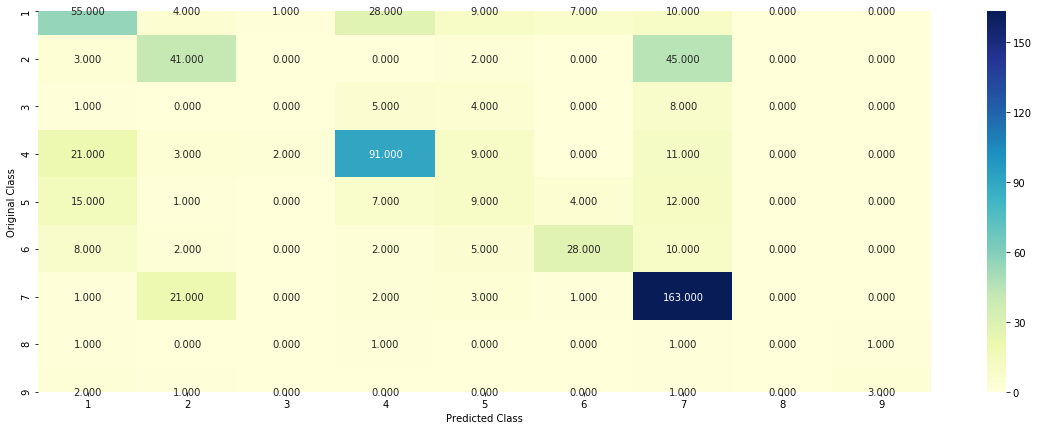

-------------------- Precision matrix (Columm Sum=1) --------------------


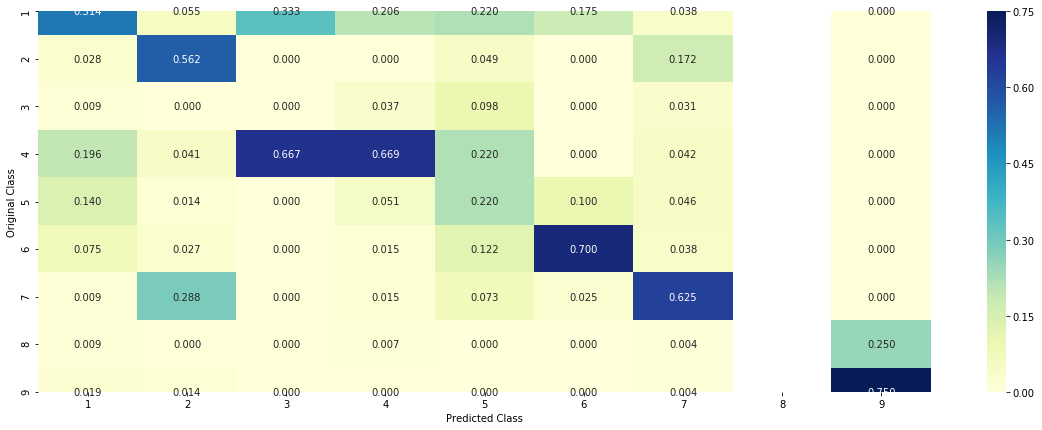

-------------------- Recall matrix (Row sum=1) --------------------


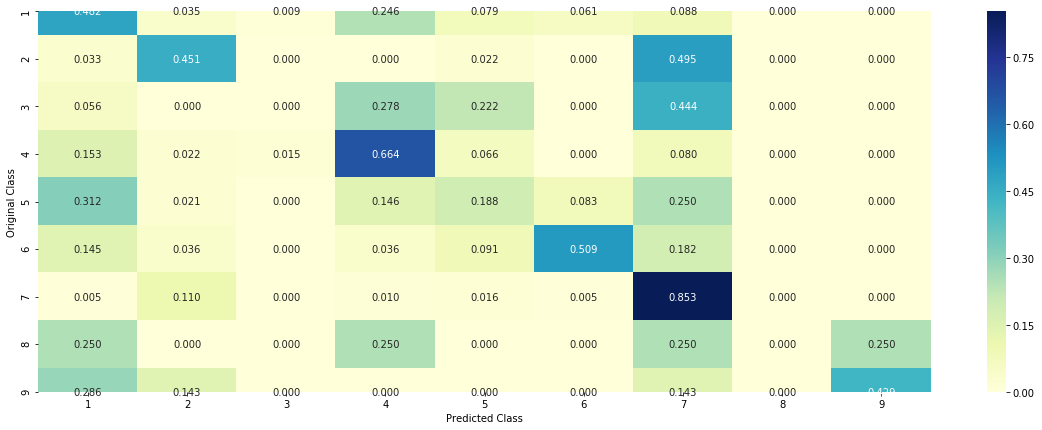

In [126]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)

log_error = log_loss(TFIDF_train_y, sclf.predict_proba(TFIDF_train_x_onehotencoding))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(TFIDF_cv_y, sclf.predict_proba(TFIDF_cv_x_onehotencoding))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(TFIDF_test_x_onehotencoding))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(TFIDF_test_x_onehotencoding)- test_y))/
                                                            TFIDF_test_y.shape[0])
plot_confusion_matrix(test_y=TFIDF_test_y, predict_y=sclf.predict(TFIDF_test_x_onehotencoding))

Log loss (train) on the VotingClassifier : 0.6877194296951149
Log loss (CV) on the VotingClassifier : 1.0603530520874322
Log loss (test) on the VotingClassifier : 1.2107949979756478
Number of missclassified point : 0.4075187969924812
-------------------- Confusion matrix --------------------


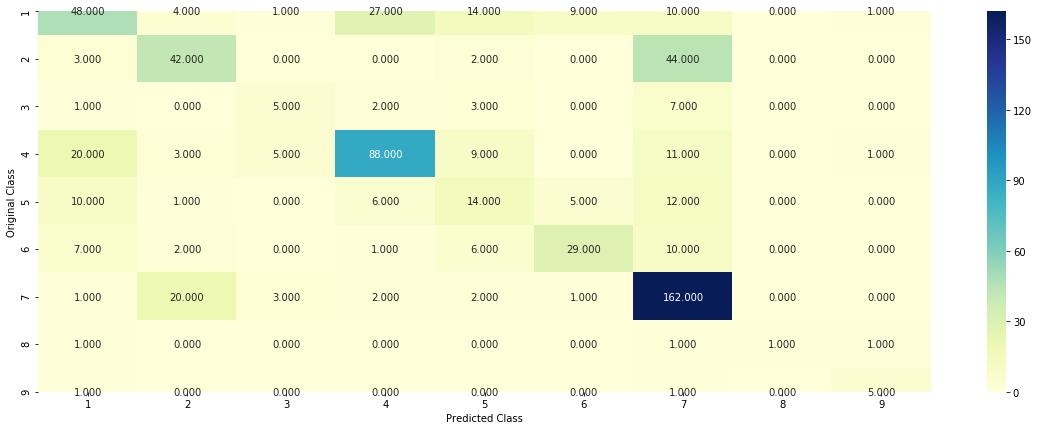

-------------------- Precision matrix (Columm Sum=1) --------------------


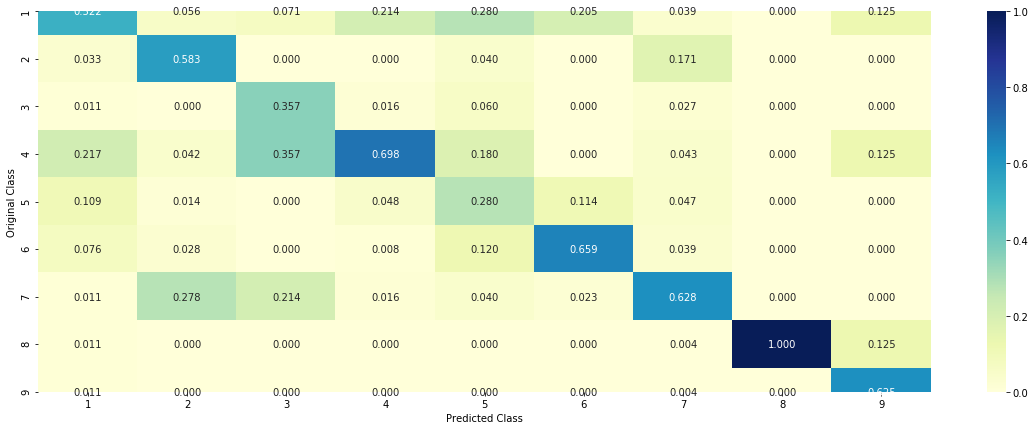

-------------------- Recall matrix (Row sum=1) --------------------


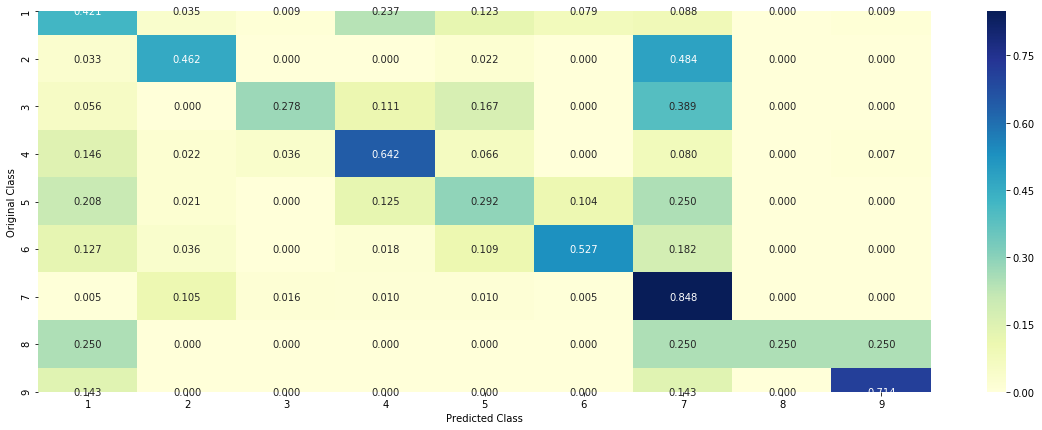

In [128]:
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], 
                         voting='soft')
vclf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)

print("Log loss (train) on the VotingClassifier :", 
                  log_loss(TFIDF_train_y, vclf.predict_proba(TFIDF_train_x_onehotencoding)))
print("Log loss (CV) on the VotingClassifier :", 
                  log_loss(TFIDF_cv_y, vclf.predict_proba(TFIDF_cv_x_onehotencoding)))
print("Log loss (test) on the VotingClassifier :", 
                  log_loss(TFIDF_test_y, vclf.predict_proba(TFIDF_test_x_onehotencoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(TFIDF_test_x_onehotencoding)- TFIDF_test_y))/
                                                              TFIDF_test_y.shape[0])
plot_confusion_matrix(test_y=TFIDF_test_y, predict_y=vclf.predict(TFIDF_test_x_onehotencoding))

<h3>5.6.3 Maximum Voting Classifier </h3>

Log loss (train) on the VotingClassifier : 0.6877194296951149
Log loss (CV) on the VotingClassifier : 1.0603530520874322
Log loss (test) on the VotingClassifier : 1.2107949979756478
Number of missclassified point : 0.4075187969924812
-------------------- Confusion matrix --------------------


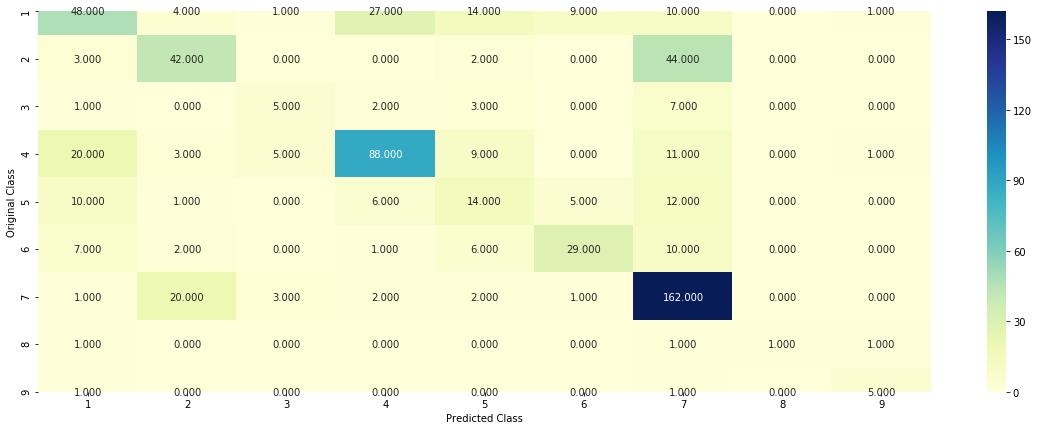

-------------------- Precision matrix (Columm Sum=1) --------------------


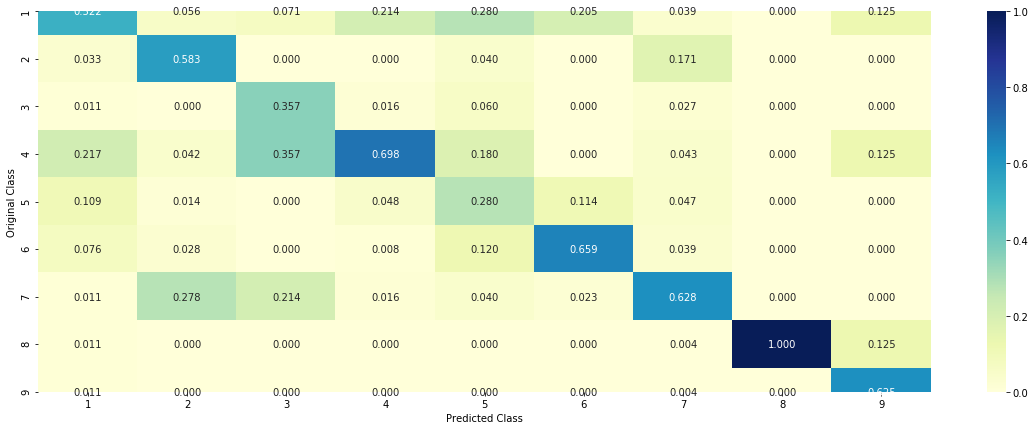

-------------------- Recall matrix (Row sum=1) --------------------


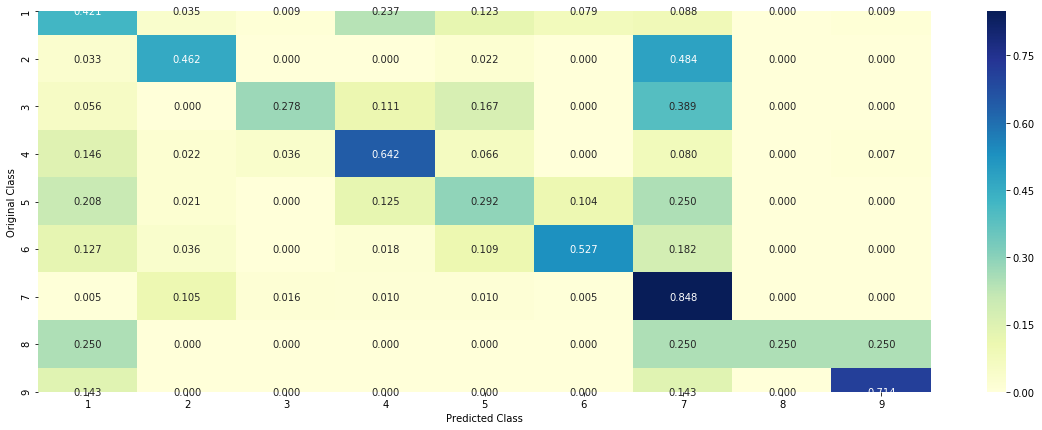

In [130]:
from sklearn.ensemble import VotingClassifier

vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(TFIDF_train_x_onehotencoding, TFIDF_train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(TFIDF_train_y, vclf.predict_proba(TFIDF_train_x_onehotencoding)))
print("Log loss (CV) on the VotingClassifier :", log_loss(TFIDF_cv_y, vclf.predict_proba(TFIDF_cv_x_onehotencoding)))
print("Log loss (test) on the VotingClassifier :", log_loss(TFIDF_test_y, vclf.predict_proba(TFIDF_test_x_onehotencoding)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(TFIDF_test_x_onehotencoding)- TFIDF_test_y))/TFIDF_test_y.shape[0])
plot_confusion_matrix(test_y=TFIDF_test_y, predict_y=vclf.predict(TFIDF_test_x_onehotencoding))

<h1>6. Taking only the Top 1000 Features </h1>

<h3>6.1 Top 1000 Text Features using BOW Featurization (Both Unigrams & Bigrams)</h3>

By default, when we are defining BOW with the help of CountVectorizer, only Unigrams are considered and all the features are considered. However,here, we will consider only the Top 1000 Text Features and use both unigrams as well as Bigrams. We will individually see by what extent is our model improving because of this.

In [50]:
#When we say the Top 1000 Features in the entire Corpus, we mean the Top 1000 Text Features Only. 
text_vectorizer_BOW = CountVectorizer(max_features=1000, ngram_range=(1,2))

train_text_onehotencoding_BOW = text_vectorizer_BOW.fit_transform(train_df['TEXT'])
cv_text_onehotencoding_BOW = text_vectorizer_BOW.transform(cv_df['TEXT'])
test_text_onehotencoding_BOW = text_vectorizer_BOW.transform(test_df['TEXT'])

In [59]:
#Previously Defined One-Hot Encodings and then Stacking the same. 
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

#Horizontally Stacking (Top 1000 Text Features) + Gene Features + Variation Features
train_x_onehotencoding_BOW = hstack((train_gene_var_onehotCoding,train_text_onehotencoding_BOW)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotencoding_BOW = hstack((test_gene_var_onehotCoding,test_text_onehotencoding_BOW)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotencoding_BOW = hstack((cv_gene_var_onehotCoding, cv_text_onehotencoding_BOW)).tocsr()
cv_y = np.array(list(cv_df['Class']))

<h3>6.1.1 Naive Bayes (Using BOW Representation)</h3> </h3>

<h4>6.1.1.1. Hyper Parameter Tuning</h4>

for alpha = 1e-05
Log Loss : 1.383013002593771
for alpha = 0.0001
Log Loss : 1.3863037104084945
for alpha = 0.001
Log Loss : 1.3880118325684117
for alpha = 0.1
Log Loss : 1.387921342204482
for alpha = 1
Log Loss : 1.386598729376565
for alpha = 10
Log Loss : 1.4122326290767966
for alpha = 100
Log Loss : 1.4860783914647282
for alpha = 1000
Log Loss : 1.6986709522836207


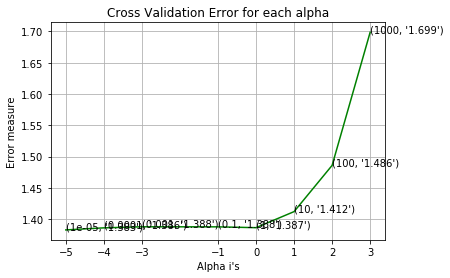

For values of best alpha =  1e-05 The train log loss is: 1.3505786935748376
For values of best alpha =  1e-05 The cross validation log loss is: 1.383013002593771
For values of best alpha =  1e-05 The test log loss is: 1.491660822597146


In [133]:
#Hyperparameter Tuning using only the Top 1000 BOW Features

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotencoding_BOW, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotencoding_BOW, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_BOW)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotencoding_BOW, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_BOW, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
                                  log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_x_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
                                  log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(test_x_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
                                  log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>6.1.1.2. Testing Model with the Best Hyperparameter :-</h4>

Log Loss : 1.383013002593771
Number of missclassified point : 0.4473684210526316
-------------------- Confusion matrix --------------------


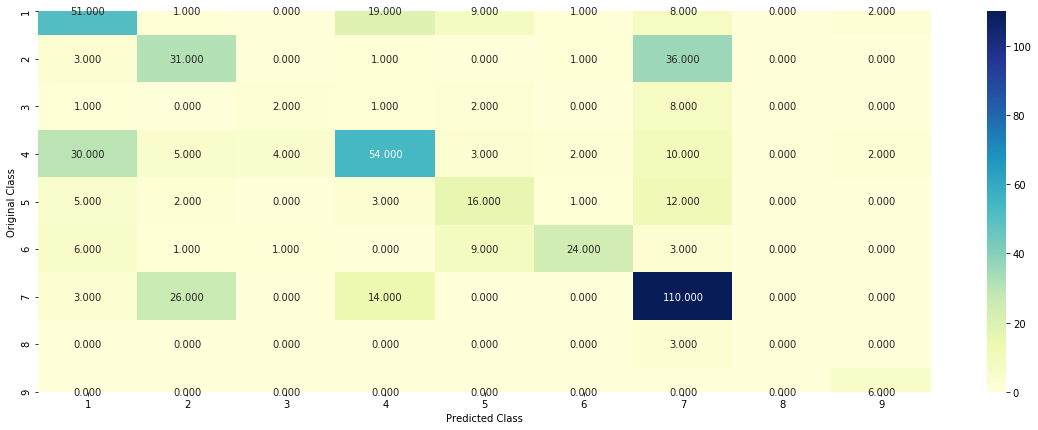

-------------------- Precision matrix (Columm Sum=1) --------------------


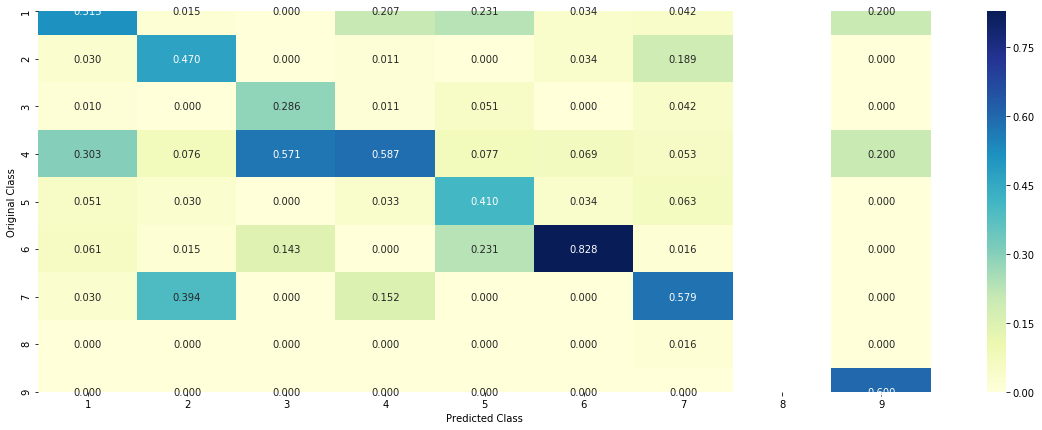

-------------------- Recall matrix (Row sum=1) --------------------


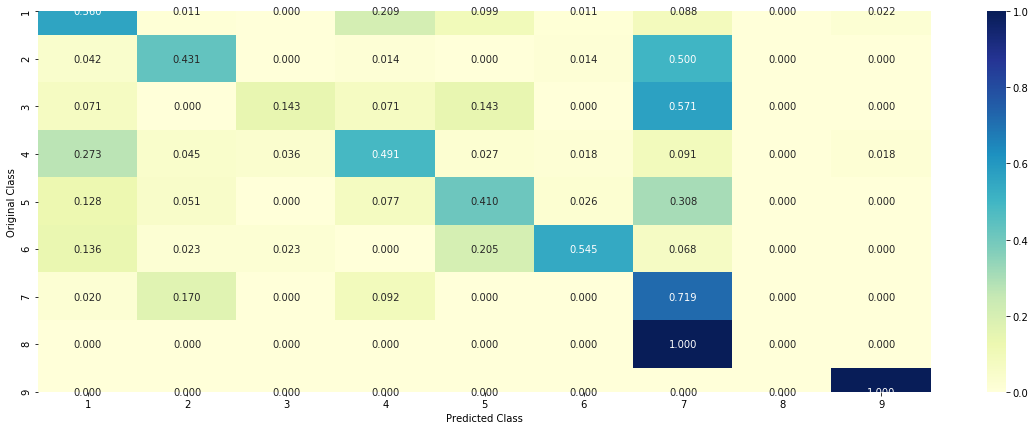

In [134]:
#Testing to obtain the Misclassification Percentage.
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotencoding_BOW, train_y)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_BOW, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_BOW)

# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotencoding_BOW)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotencoding_BOW.toarray()))

<h3>6.1.2 KNN Classification (Using BOW Representation) </h3>

<h4>6.1.2.1. Hyper Parameter Tuning</h4>

for alpha = 5
Log Loss : 1.1696893045798693
for alpha = 11
Log Loss : 1.235178852589324
for alpha = 15
Log Loss : 1.2714181231243145
for alpha = 21
Log Loss : 1.3151539316518677
for alpha = 31
Log Loss : 1.3535675708643693
for alpha = 41
Log Loss : 1.383386582357343
for alpha = 51
Log Loss : 1.3905143088758587
for alpha = 99
Log Loss : 1.44082105205916


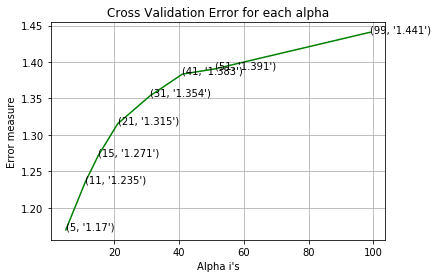

For values of best alpha =  5 The train log loss is: 1.0135916307957782
For values of best alpha =  5 The cross validation log loss is: 1.1696893045798693
For values of best alpha =  5 The test log loss is: 1.2802715893865855


In [135]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_onehotencoding_BOW, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotencoding_BOW, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_BOW)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_onehotencoding_BOW, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_BOW, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
                                  log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_x_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
                                  log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(test_x_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
                                  log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>6.1.2.2. Testing Model with the Best Hyperparameter </h4>

Log loss : 1.1696893045798693
Number of mis-classified points : 0.4041353383458647
-------------------- Confusion matrix --------------------


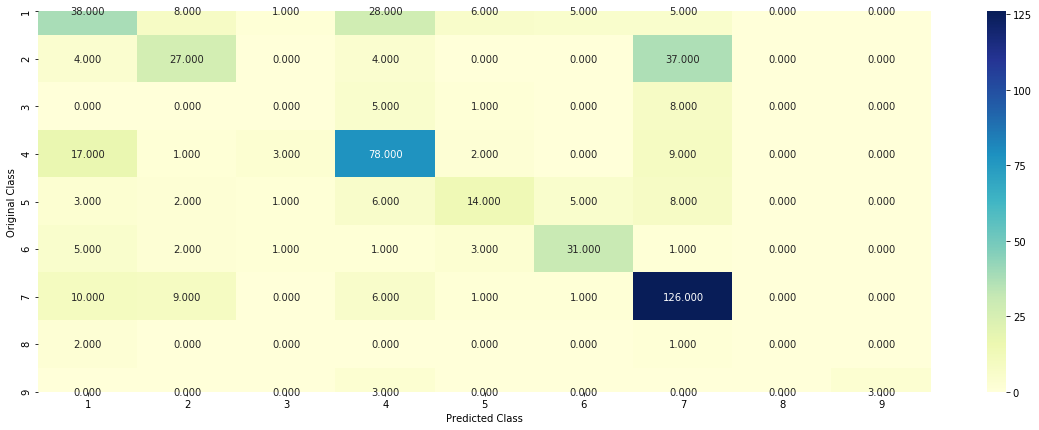

-------------------- Precision matrix (Columm Sum=1) --------------------


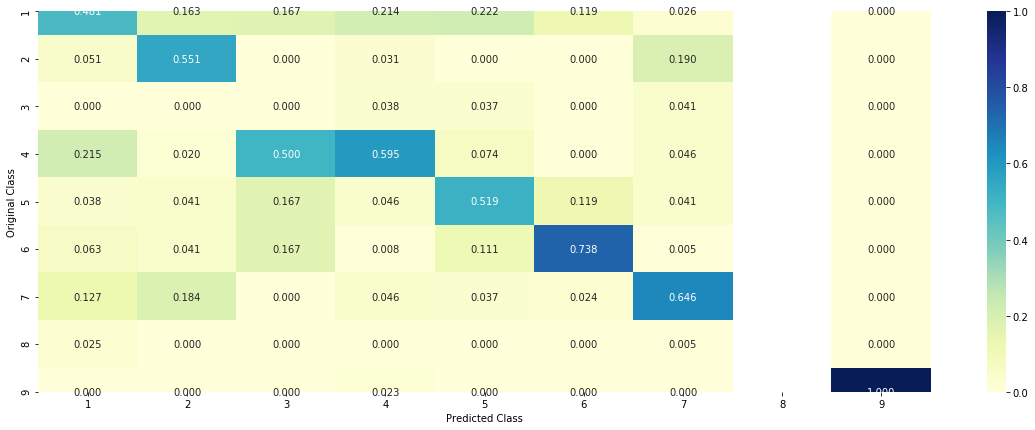

-------------------- Recall matrix (Row sum=1) --------------------


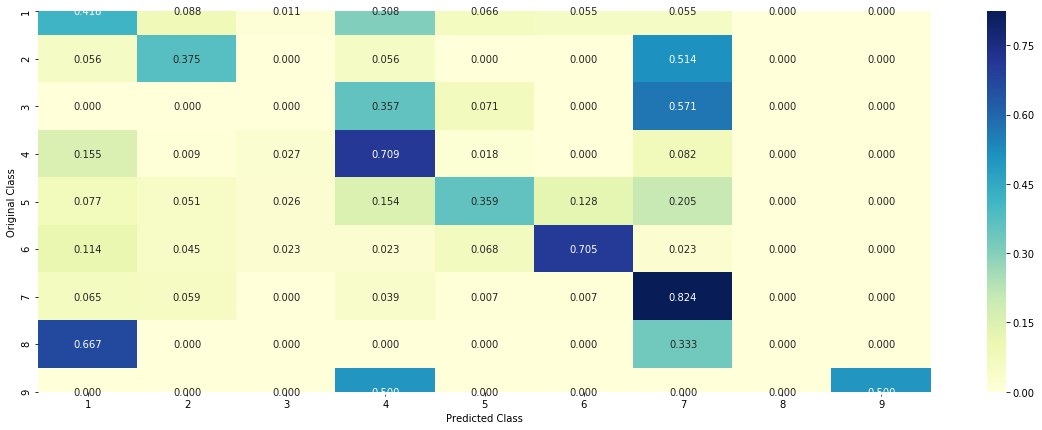

In [136]:
#Calculating the Misclassification Percentage alongwith obtaining the Confusion Matrix. 

clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_onehotencoding_BOW, train_y,cv_x_onehotencoding_BOW, cv_y, clf)

<h3>6.1.3 Logistic Regression (Using BOW Representation) </h3>

<h3>6.1.3.1 With Class Balancing </h3>

<h4>6.1.3.1.1 Hyper Parameter Tuning</h4>

for alpha = 1e-06
Log Loss : 1.8304997567764278
for alpha = 1e-05
Log Loss : 1.8304997567764278
for alpha = 0.0001
Log Loss : 1.8304997567764278
for alpha = 0.001
Log Loss : 1.268712111894543
for alpha = 0.01
Log Loss : 1.2581489458443624
for alpha = 0.1
Log Loss : 1.25565342338043
for alpha = 1
Log Loss : 1.163429654352919
for alpha = 10
Log Loss : 1.159797481489658
for alpha = 100
Log Loss : 1.3260857330066738


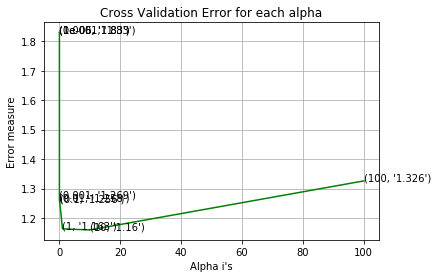

For values of best alpha =  10 The train log loss is: 1.033991181428177
For values of best alpha =  10 The cross validation log loss is: 1.159797481489658
For values of best alpha =  10 The test log loss is: 1.2634893597083856


In [137]:
#Hyperparameter Tuning with Top 1000 Features using BOW Vectorizer & Balanced Class. 

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotencoding_BOW, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotencoding_BOW, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_BOW)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotencoding_BOW, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_BOW, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_x_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
      log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(test_x_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
      log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>6.1.3.1.2 Testing Model with the Best Hyperparameter</h4>

Log loss : 1.159797481489658
Number of mis-classified points : 0.40225563909774437
-------------------- Confusion matrix --------------------


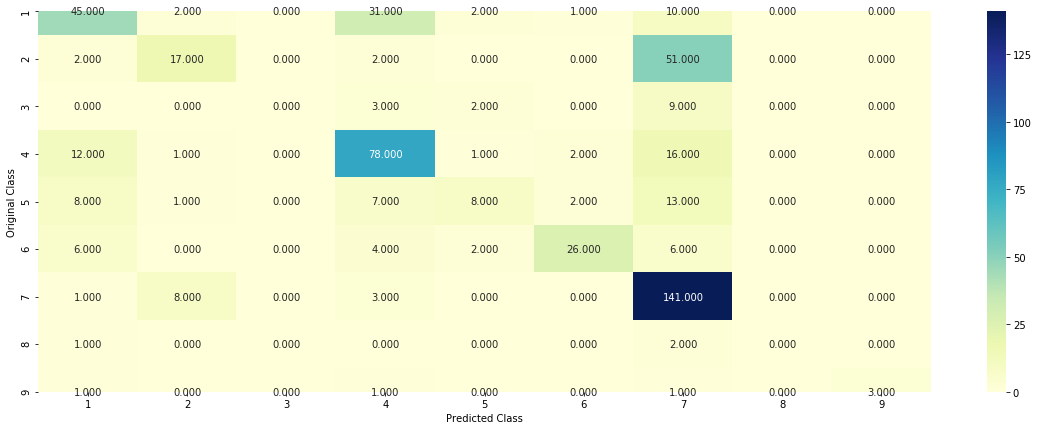

-------------------- Precision matrix (Columm Sum=1) --------------------


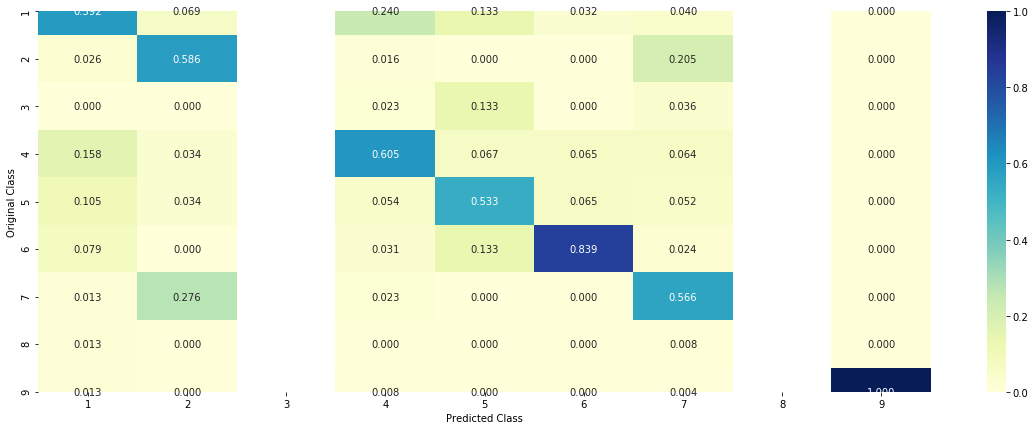

-------------------- Recall matrix (Row sum=1) --------------------


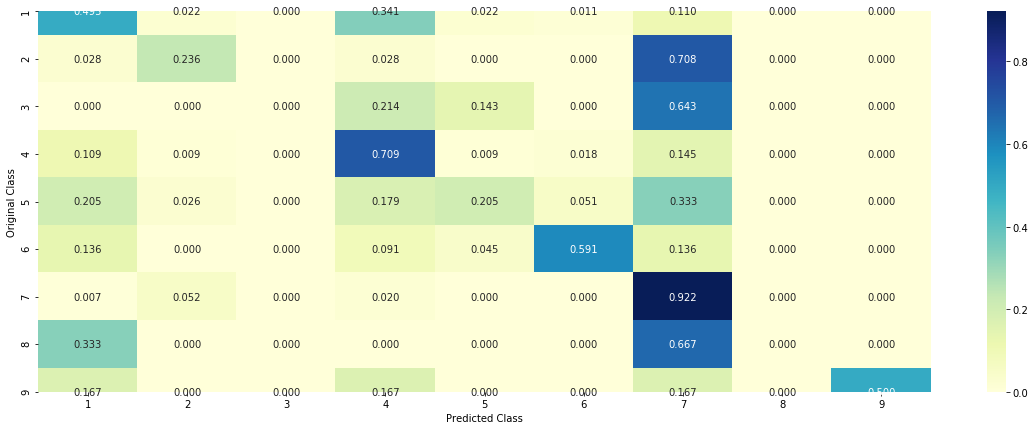

In [138]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotencoding_BOW, train_y, cv_x_onehotencoding_BOW, cv_y, clf)

<h3>6.1.3.2 Without Class Balancing </h3>

<h4>6.1.3.2.1 Hyper Parameter Tuning</h4>

for alpha = 1e-06
Log Loss : 1.8304997567764278
for alpha = 1e-05
Log Loss : 1.8304997567764278
for alpha = 0.0001
Log Loss : 1.8304997567764278
for alpha = 0.001
Log Loss : 1.2616228646655985
for alpha = 0.01
Log Loss : 1.2573563188710897
for alpha = 0.1
Log Loss : 1.263212164206403
for alpha = 1
Log Loss : 1.1653431472544376


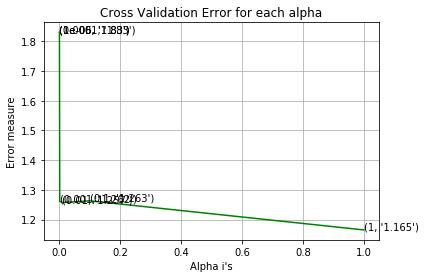

For values of best alpha =  1 The train log loss is: 0.9572583840963328
For values of best alpha =  1 The cross validation log loss is: 1.1653431472544376
For values of best alpha =  1 The test log loss is: 1.2611888019380288


In [139]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotencoding_BOW, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotencoding_BOW, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_BOW)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

#Plotting Error Plot
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

#Training Data on best Hyperparameter
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotencoding_BOW, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_BOW, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
                                  log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_x_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
                                  log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(test_x_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
                                  log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>6.1.3.2.2 Testing Model with the Best Hyperparameter</h4>

Log loss : 1.1653431472544376
Number of mis-classified points : 0.39097744360902253
-------------------- Confusion matrix --------------------


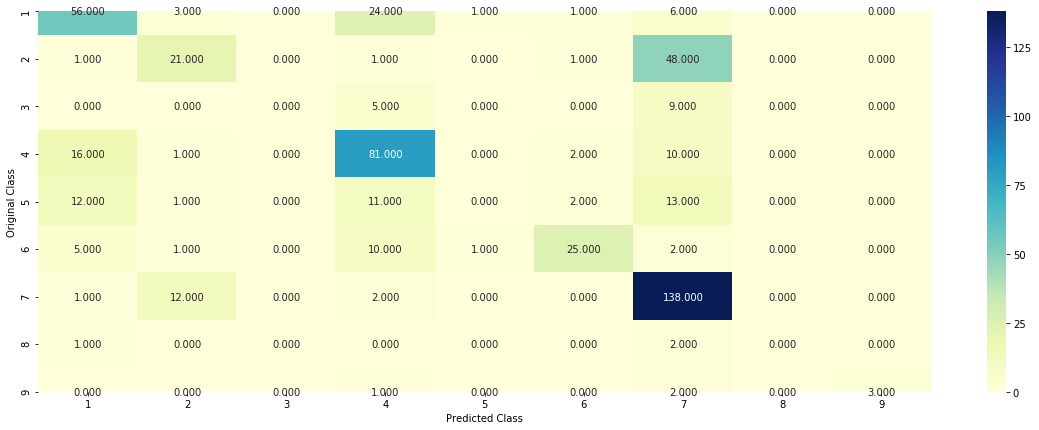

-------------------- Precision matrix (Columm Sum=1) --------------------


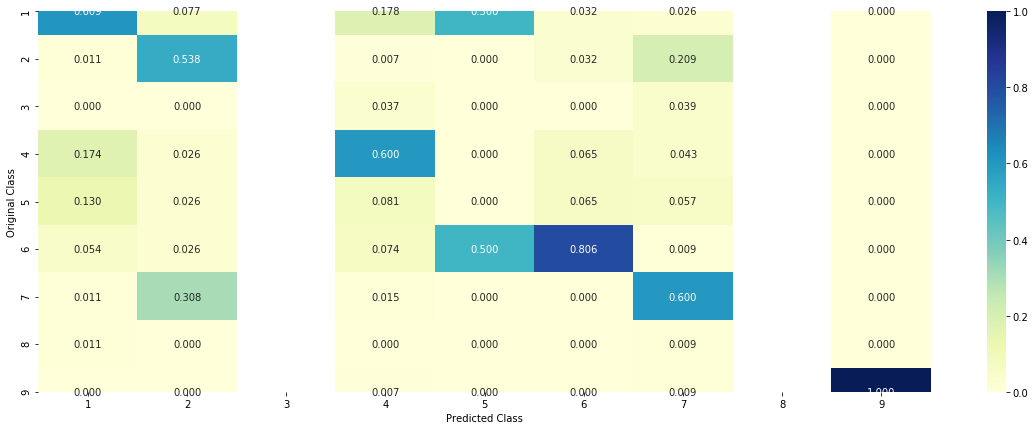

-------------------- Recall matrix (Row sum=1) --------------------


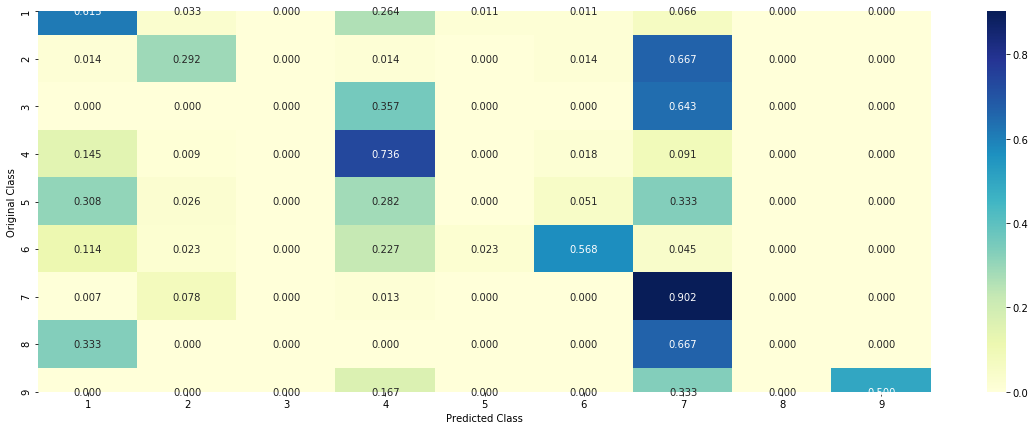

In [140]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotencoding_BOW,train_y, cv_x_onehotencoding_BOW, cv_y, clf)

<h3>6.1.4 Linear Support Vector Machines (Using BOW Representation) </h3>

<h4>6.1.4.1 Hyper Parameter Tuning</h4>

for C = 1e-05
Log Loss : 1.8304997567764278
for C = 0.0001
Log Loss : 1.8304997567764278
for C = 0.001
Log Loss : 1.2889579610220459
for C = 0.01
Log Loss : 1.2375655463559587
for C = 0.1
Log Loss : 1.2473119976688833
for C = 1
Log Loss : 1.2245944250366532
for C = 10
Log Loss : 1.1767221009195554
for C = 100
Log Loss : 1.3354548840367353


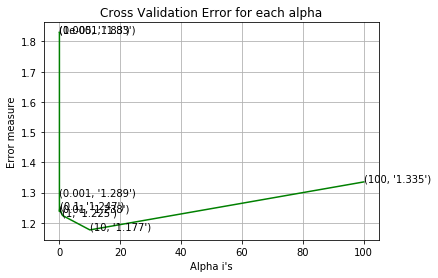

For values of best alpha =  10 The train log loss is: 1.0391430784115272
For values of best alpha =  10 The cross validation log loss is: 1.1837380879527069
For values of best alpha =  10 The test log loss is: 1.291756374745048


In [141]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotencoding_BOW, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotencoding_BOW, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_BOW)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_text_onehotencoding_BOW, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_onehotencoding_BOW, train_y)

predict_y = sig_clf.predict_proba(train_text_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
                                  log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_text_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
                                    log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(test_text_onehotencoding_BOW)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
                                    log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>6.1.4.2 Testing model with Best Hyper Parameters</h4>

Log loss : 1.1767221009195554
Number of mis-classified points : 0.38345864661654133
-------------------- Confusion matrix --------------------


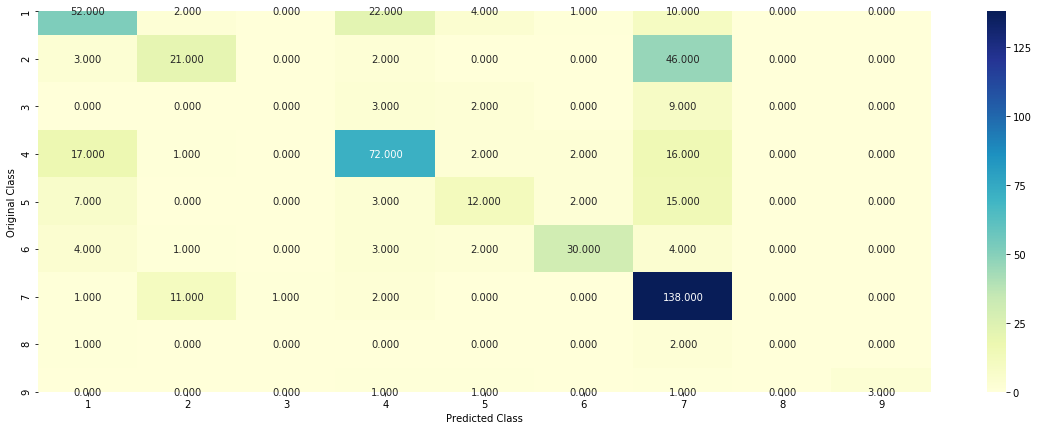

-------------------- Precision matrix (Columm Sum=1) --------------------


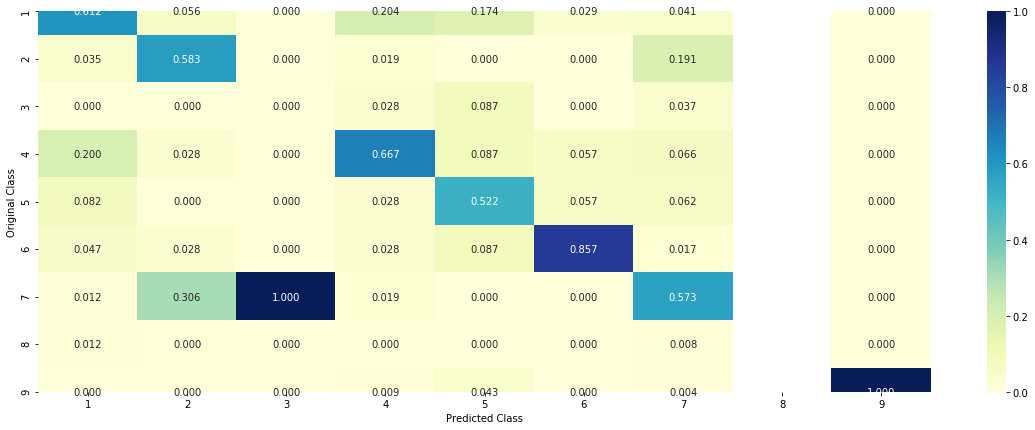

-------------------- Recall matrix (Row sum=1) --------------------


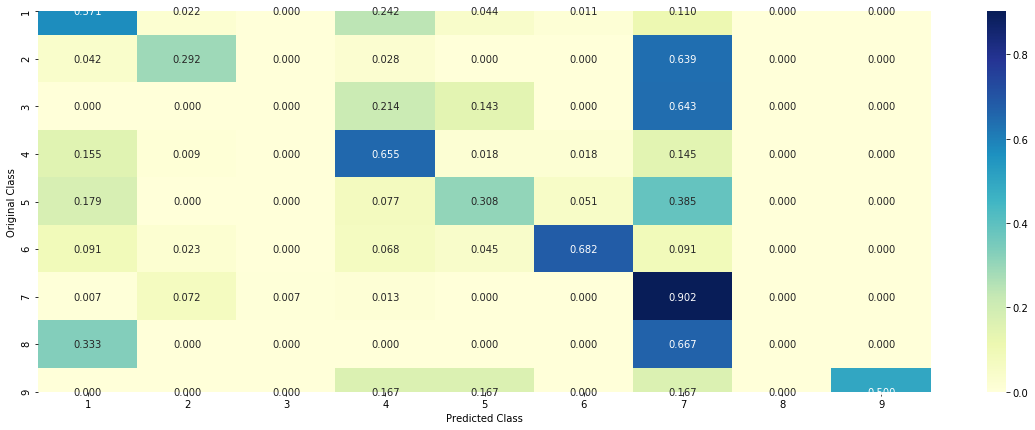

In [142]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotencoding_BOW, train_y,cv_x_onehotencoding_BOW,cv_y, clf)

<h3>6.1.5 Random Forest Classifier (Using BOW Representation) </h3>

<h4>6.1.5.1 Hyper Parameter Tuning (With One hot Encoding)</h4>

In [143]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotencoding_BOW, train_y)
        
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotencoding_BOW, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_BOW)
        
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini',
                             max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotencoding_BOW, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_BOW, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotencoding_BOW)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",
                                        log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_x_onehotencoding_BOW)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",
                                        log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(test_x_onehotencoding_BOW)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",
                                        log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.0788156410849707
for n_estimators = 100 and max depth =  10
Log Loss : 1.005815994374248
for n_estimators = 200 and max depth =  5
Log Loss : 1.0616565695551108
for n_estimators = 200 and max depth =  10
Log Loss : 1.00048850804747
for n_estimators = 500 and max depth =  5
Log Loss : 1.0546094929793637
for n_estimators = 500 and max depth =  10
Log Loss : 0.9920131044796279
for n_estimators = 1000 and max depth =  5
Log Loss : 1.0549217731113667
for n_estimators = 1000 and max depth =  10
Log Loss : 0.9917088870158387
for n_estimators = 2000 and max depth =  5
Log Loss : 1.056455084457076
for n_estimators = 2000 and max depth =  10
Log Loss : 0.9918834666528741
For values of best estimator =  1000 The train log loss is: 0.5815920253002843
For values of best estimator =  1000 The cross validation log loss is: 0.9917088870158387
For values of best estimator =  1000 The test log loss is: 1.1228399746434474


<h4>6.1.5.2 Testing model with Best Hyper Parameters</h4>

Log loss : 0.9920131044796279
Number of mis-classified points : 0.3176691729323308
-------------------- Confusion matrix --------------------


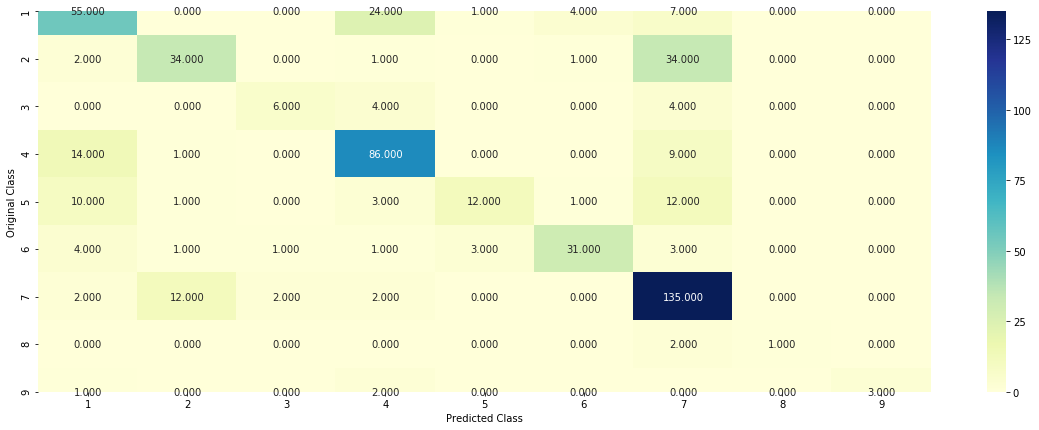

-------------------- Precision matrix (Columm Sum=1) --------------------


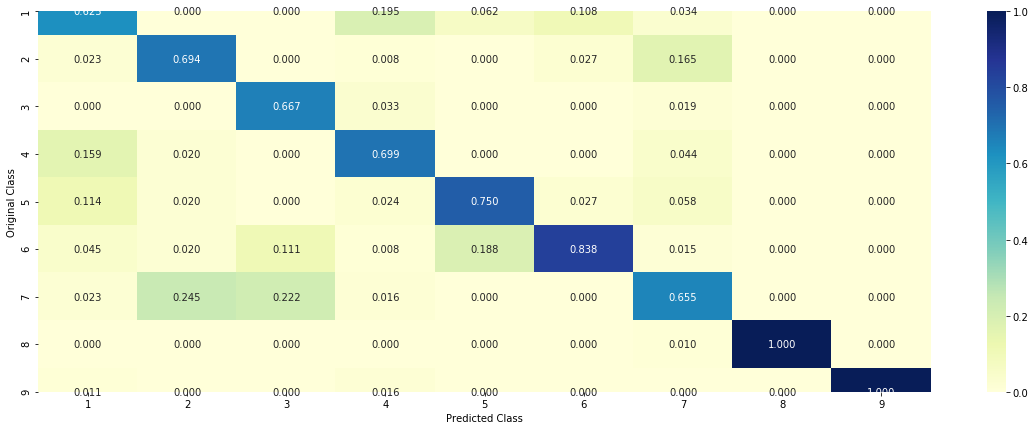

-------------------- Recall matrix (Row sum=1) --------------------


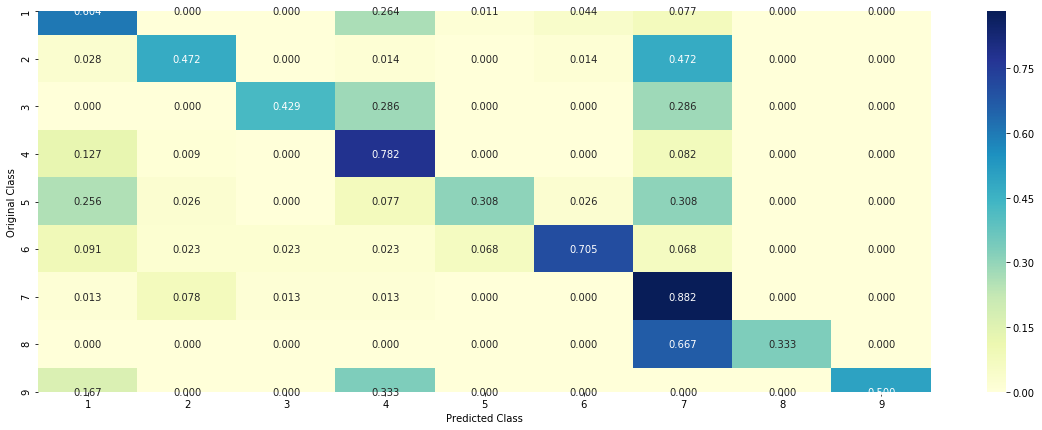

In [145]:
clf = RandomForestClassifier(max_depth=max_depth[int(best_alpha%3)], n_estimators=alpha[int(best_alpha/3)], criterion='gini', max_features='auto',random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotencoding_BOW, train_y,cv_x_onehotencoding_BOW,cv_y, clf)

<h3>6.1.6 Stack the models obtained using BOW Representation </h3>

<h4>6.1.6.1 Testing with Hyper Parameter Tuning</h4>

In [146]:
#Stacking based on the Best Hyperparameters obtained. 

clf1 = SGDClassifier(alpha=0.0001, penalty='l2',class_weight='balanced', loss='log', random_state=0)
clf1.fit(train_x_onehotencoding_BOW, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.001, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotencoding_BOW,train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_onehotencoding_BOW, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotencoding_BOW, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % 
              (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotencoding_BOW))))

sig_clf2.fit(train_x_onehotencoding_BOW, train_y)
print("Support vector machines : Log Loss: %0.2f" % (
               log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotencoding_BOW))))

sig_clf3.fit(train_x_onehotencoding_BOW, train_y)
print("Naive Bayes : Log Loss: %0.2f" % 
               (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotencoding_BOW))))

print("-"*50)

alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1,sig_clf2,sig_clf3], meta_classifier=lr, 
                              use_probas=True)
    sclf.fit(train_x_onehotencoding_BOW, train_y)
    
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % 
                               (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotencoding_BOW))))
    
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotencoding_BOW))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.83
Support vector machines : Log Loss: 1.29
Naive Bayes : Log Loss: 1.39
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.183
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.086
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.751
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.304
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.112
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.109


<h4>6.1.6.2 Testing the model with the Best Hyper Parameters</h4>

Log loss (train) on the stacking classifier : 1.1911421189753275
Log loss (CV) on the stacking classifier : 1.304140515496007
Log loss (test) on the stacking classifier : 1.3610946877815597
Number of missclassified point : 0.43609022556390975
-------------------- Confusion matrix --------------------


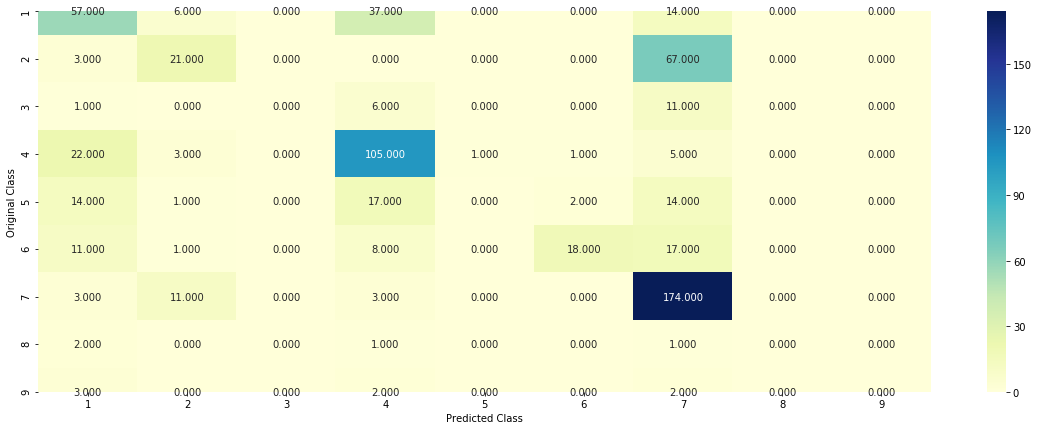

-------------------- Precision matrix (Columm Sum=1) --------------------


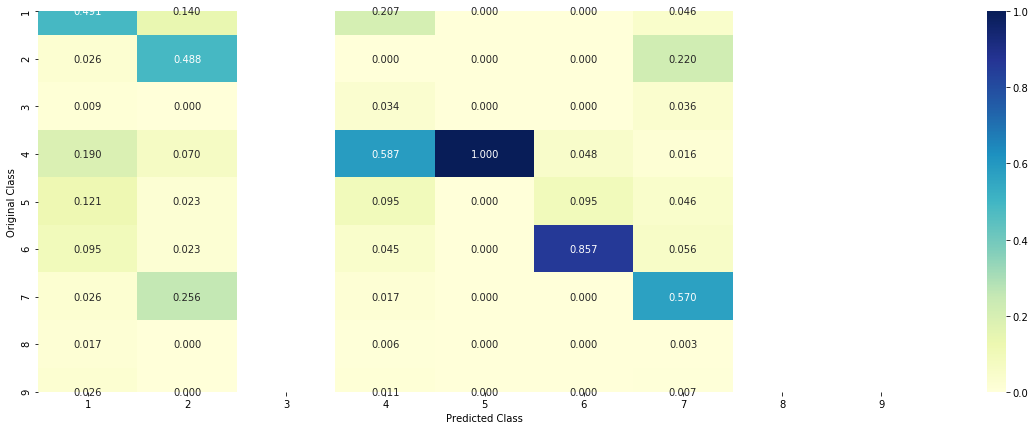

-------------------- Recall matrix (Row sum=1) --------------------


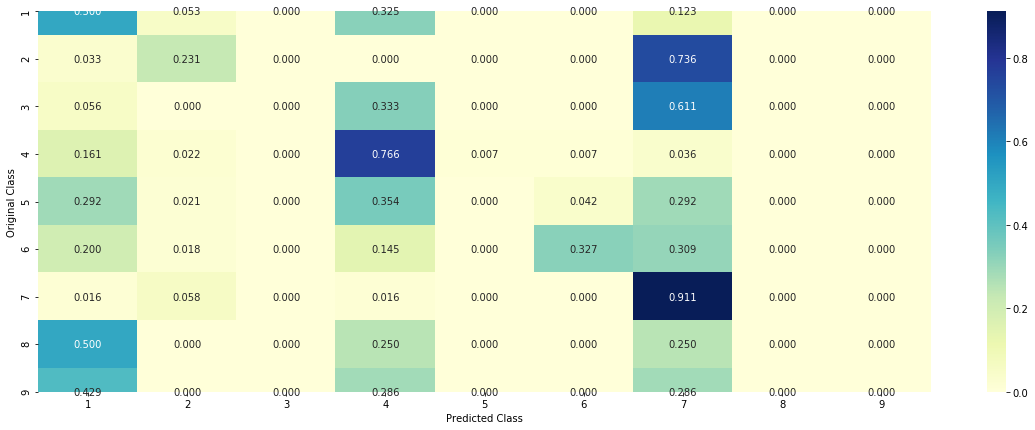

In [147]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotencoding_BOW, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotencoding_BOW))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotencoding_BOW))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotencoding_BOW))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotencoding_BOW)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotencoding_BOW))

<h3>6.2 Top 1000 Text Features using TFIDF Featurization (Both Unigrams & Bigrams)</h3>

In [60]:
#Considering the Most Frequent 1000 Features from the Text Class & Using this with One Hot Encoding of the Gene
# & Variation Features.

top_vect = TfidfVectorizer(max_features=1000,ngram_range=(1,2))

TFIDF_train_text_onehotencoding_top = top_vect.fit_transform(train_df['TEXT'])
TFIDF_cv_text_onehotencoding_top  = top_vect.transform(cv_df['TEXT'])
TFIDF_test_text_onehotencoding_top = top_vect.transform(test_df['TEXT'])

In [61]:
#Previously Defined One-Hot Encodings
train_gene_var_onehotCoding = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_onehotCoding = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_onehotCoding = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

#Horizontally Stacking (Top 1000 Text Features) + Gene Features + Variation Features
train_x_onehotencoding_FE = hstack((train_gene_var_onehotCoding,TFIDF_train_text_onehotencoding_top)).tocsr()
train_y = np.array(list(train_df['Class']))

test_x_onehotencoding_FE = hstack((test_gene_var_onehotCoding, TFIDF_test_text_onehotencoding_top)).tocsr()
test_y = np.array(list(test_df['Class']))

cv_x_onehotencoding_FE = hstack((cv_gene_var_onehotCoding, TFIDF_cv_text_onehotencoding_top)).tocsr()
cv_y = np.array(list(cv_df['Class']))

<h3>6.2.1 Naive Bayes (Using TFIDF Representation)</h3> </h3>

<h4>6.2.1.1. Hyper Parameter Tuning</h4>

for alpha = 1e-05
Log Loss : 1.1368032777092165
for alpha = 0.0001
Log Loss : 1.1371819795254858
for alpha = 0.001
Log Loss : 1.136740282991867
for alpha = 0.1
Log Loss : 1.1315012582370019
for alpha = 1
Log Loss : 1.1616148908489887
for alpha = 10
Log Loss : 1.2361953990159207
for alpha = 100
Log Loss : 1.2789125741433367
for alpha = 1000
Log Loss : 1.2865350642756217


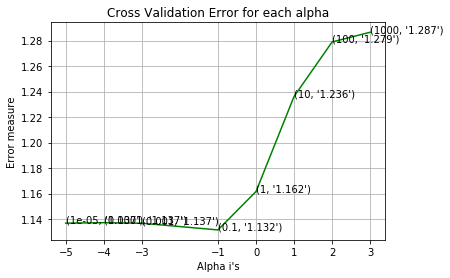

For values of best alpha =  0.1 The train log loss is: 0.71011216497912
For values of best alpha =  0.1 The cross validation log loss is: 1.1315012582370019
For values of best alpha =  0.1 The test log loss is: 1.3011375993069865


In [150]:
#Naive Bayes :- Base Model 

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_onehotencoding_FE, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotencoding_FE, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_FE)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

#Plotting Error vs alpha
fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotencoding_FE, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_FE, train_y)


predict_y = sig_clf.predict_proba(train_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
                                  log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
                                  log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(test_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
                                  log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>6.2.1.2. Testing Model with the Best Hyperparameter :-</h4>

Log Loss : 1.1315012582370019
Number of missclassified point : 0.34210526315789475
-------------------- Confusion matrix --------------------


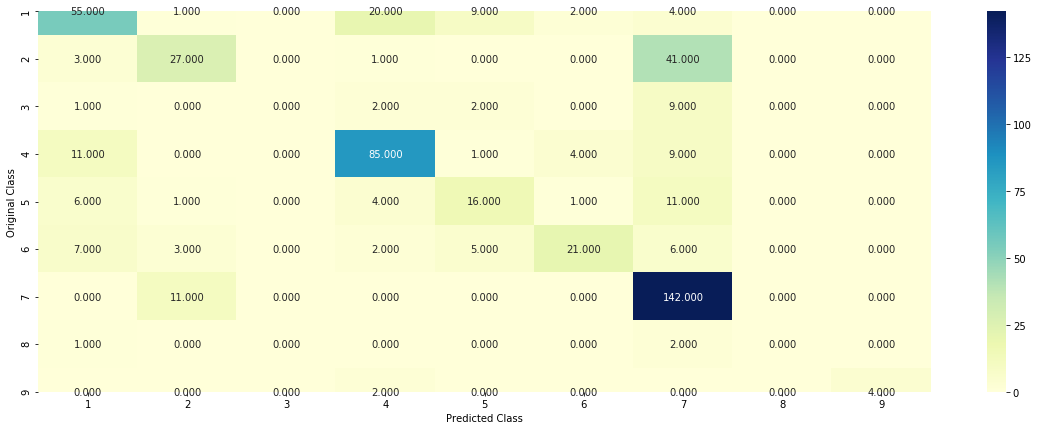

-------------------- Precision matrix (Columm Sum=1) --------------------


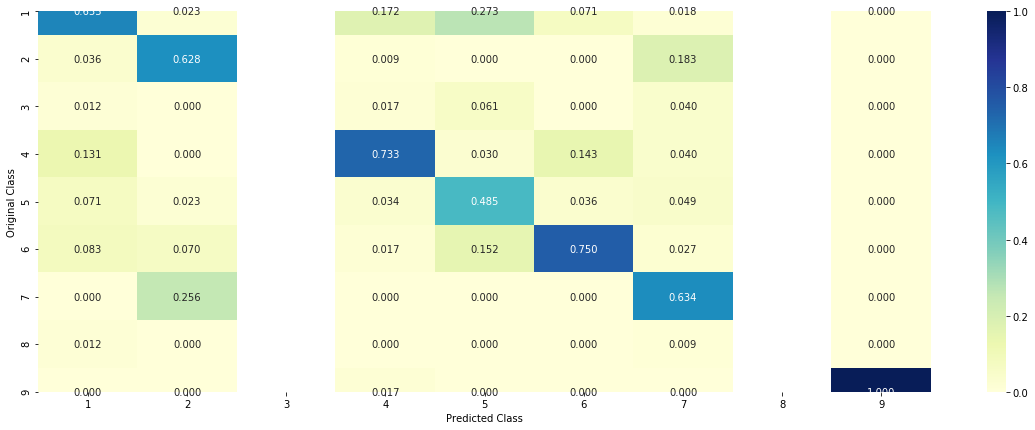

-------------------- Recall matrix (Row sum=1) --------------------


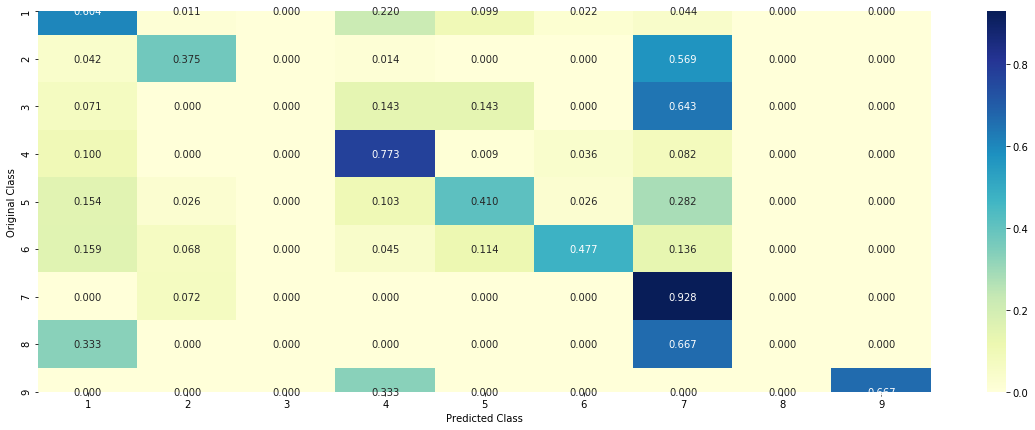

In [151]:
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_onehotencoding_FE, train_y)

sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_FE, train_y)
sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_FE)
# to avoid rounding error while multiplying probabilites we use log-probability estimates

print("Log Loss :",log_loss(cv_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_onehotencoding_FE)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_onehotencoding_FE.toarray()))

<h3>6.2.2 KNN Classification (Using TFIDF Representation) </h3>

<h4>6.2.2.1. Hyper Parameter Tuning</h4>

for alpha = 5
Log Loss : 1.0265120162043597
for alpha = 11
Log Loss : 1.0771360296331787
for alpha = 15
Log Loss : 1.1172961928398568
for alpha = 21
Log Loss : 1.1518221856173263
for alpha = 31
Log Loss : 1.1896741692950352
for alpha = 41
Log Loss : 1.2310592520693397
for alpha = 51
Log Loss : 1.2520334695246171
for alpha = 99
Log Loss : 1.3189049908375519


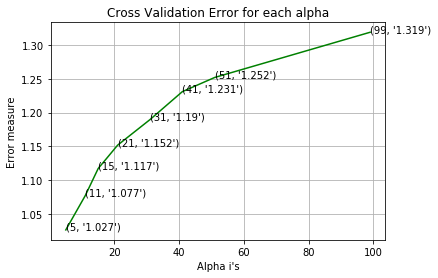

For values of best alpha =  5 The train log loss is: 0.900676877422065
For values of best alpha =  5 The cross validation log loss is: 1.0265120162043597
For values of best alpha =  5 The test log loss is: 1.1741261285468376


In [153]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_onehotencoding_FE, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotencoding_FE, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_FE)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_onehotencoding_FE, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_FE, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
                                  log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
                                  log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(test_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
                                  log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>6.2.2.2. Testing Model with the Best Hyperparameter </h4>

Log loss : 1.0265120162043597
Number of mis-classified points : 0.34022556390977443
-------------------- Confusion matrix --------------------


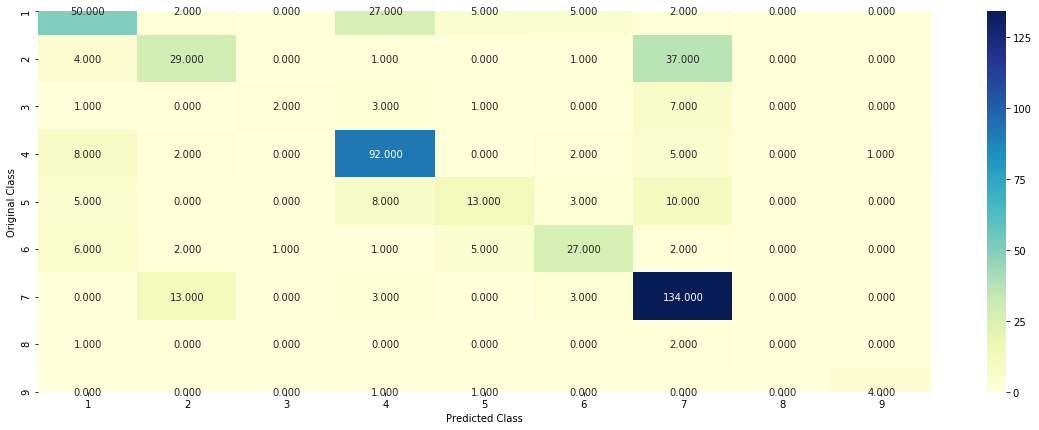

-------------------- Precision matrix (Columm Sum=1) --------------------


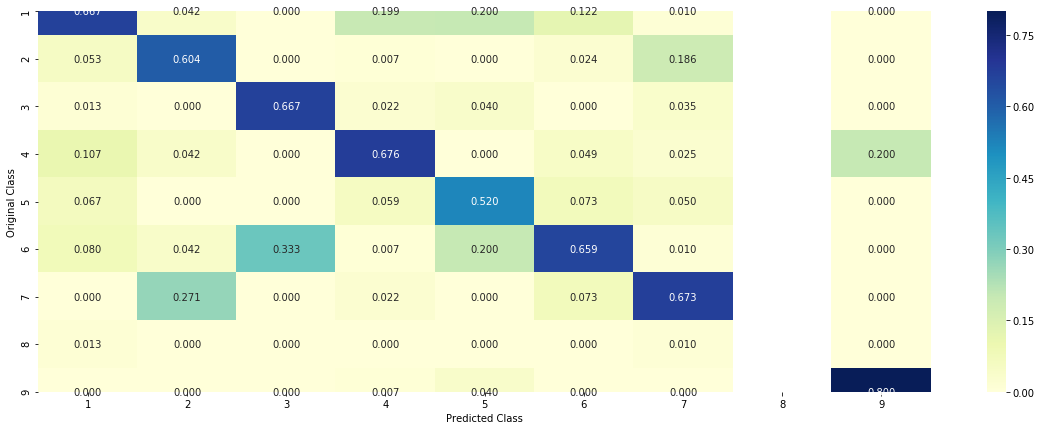

-------------------- Recall matrix (Row sum=1) --------------------


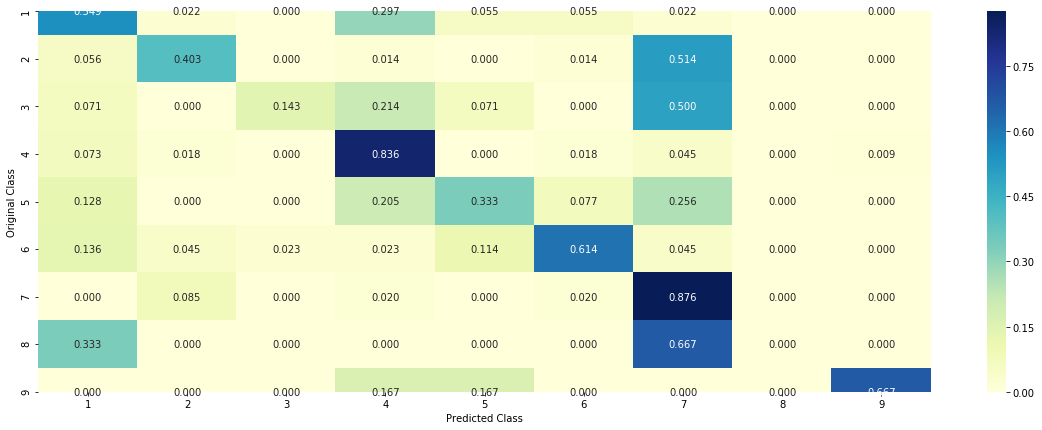

In [154]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_onehotencoding_FE, train_y,cv_x_onehotencoding_FE, cv_y, clf)

<h3>6.2.3 Logistic Regression (Using TFIDF Representation) </h3>

<h3>6.2.3.1 With Class Balancing </h3>

<h4>6.2.3.1.1 Hyper Parameter Tuning</h4>

for alpha = 1e-06
Log Loss : 1.0592460696902237
for alpha = 1e-05
Log Loss : 0.9803644816393728
for alpha = 0.0001
Log Loss : 0.9229296382614821
for alpha = 0.001
Log Loss : 0.973495606832681
for alpha = 0.01
Log Loss : 1.163064242707746
for alpha = 0.1
Log Loss : 1.4411450054273325
for alpha = 1
Log Loss : 1.5587651227354138
for alpha = 10
Log Loss : 1.57449069373656
for alpha = 100
Log Loss : 1.5762681181432352


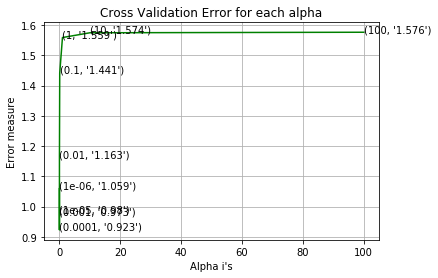

For values of best alpha =  0.0001 The train log loss is: 0.46412437257894307
For values of best alpha =  0.0001 The cross validation log loss is: 0.9229296382614821
For values of best alpha =  0.0001 The test log loss is: 1.068956192566645


In [155]:
#HyperParameter Tuning with TFIDF Vectorizer

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotencoding_FE, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotencoding_FE, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_FE)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

#Plotting Error vs alpha
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotencoding_FE, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_FE, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
      log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(test_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
      log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>6.2.3.1.2 Testing Model with the Best Hyperparameter</h4>

Log loss : 0.9229296382614821
Number of mis-classified points : 0.3101503759398496
-------------------- Confusion matrix --------------------


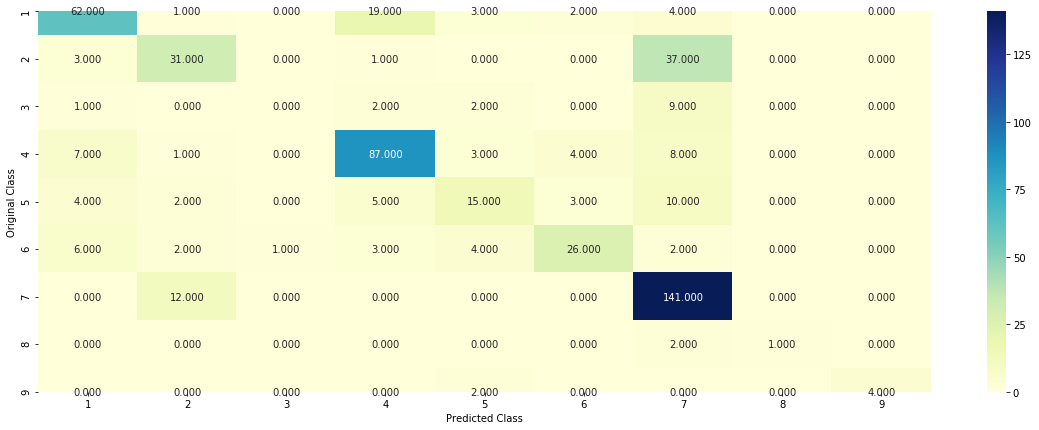

-------------------- Precision matrix (Columm Sum=1) --------------------


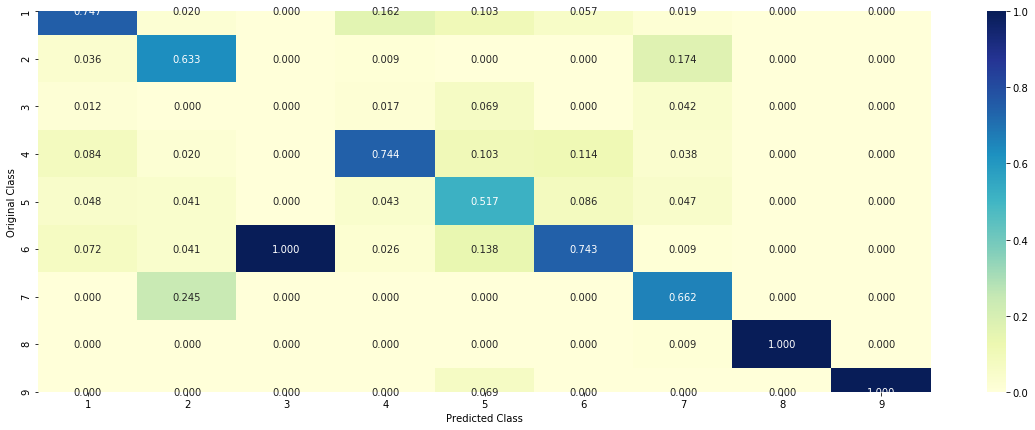

-------------------- Recall matrix (Row sum=1) --------------------


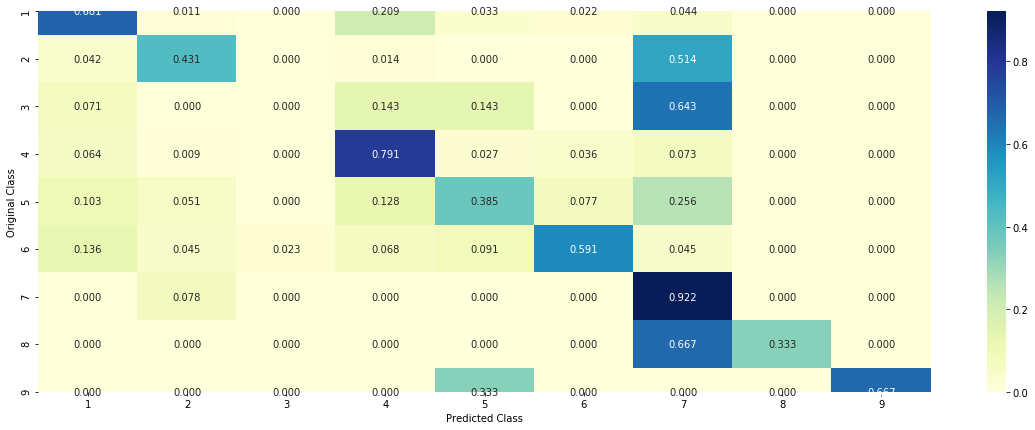

In [156]:
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotencoding_FE, train_y,cv_x_onehotencoding_FE, cv_y, clf)

<h3>6.2.3.2 Without Class Balancing </h3>

<h4>6.2.3.2.1 Hyper Parameter Tuning</h4>

for alpha = 1e-06
Log Loss : 1.093810691924764
for alpha = 1e-05
Log Loss : 0.9912704545250228
for alpha = 0.0001
Log Loss : 0.9267414512055742
for alpha = 0.001
Log Loss : 0.9805089782195661
for alpha = 0.01
Log Loss : 1.1654131643850882
for alpha = 0.1
Log Loss : 1.395103905555266
for alpha = 1
Log Loss : 1.5120650284293553


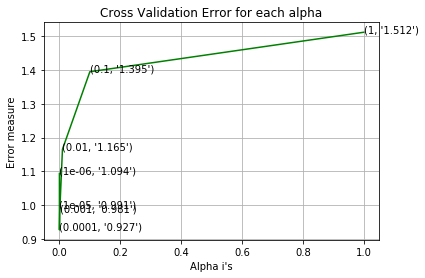

For values of best alpha =  0.0001 The train log loss is: 0.4556970105785246
For values of best alpha =  0.0001 The cross validation log loss is: 0.9267414512055742
For values of best alpha =  0.0001 The test log loss is: 1.0666723611869398


In [158]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_onehotencoding_FE, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotencoding_FE, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_FE)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_onehotencoding_FE, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_FE, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
                                  log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
                                  log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(test_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
                                  log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>6.1.3.2.2 Testing Model with the Best Hyperparameter</h4>

Log loss : 0.9267414512055742
Number of mis-classified points : 0.31203007518796994
-------------------- Confusion matrix --------------------


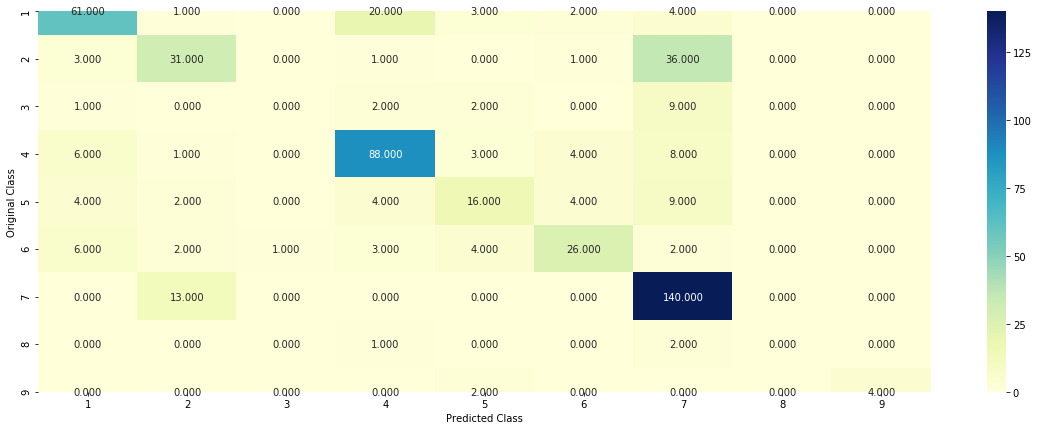

-------------------- Precision matrix (Columm Sum=1) --------------------


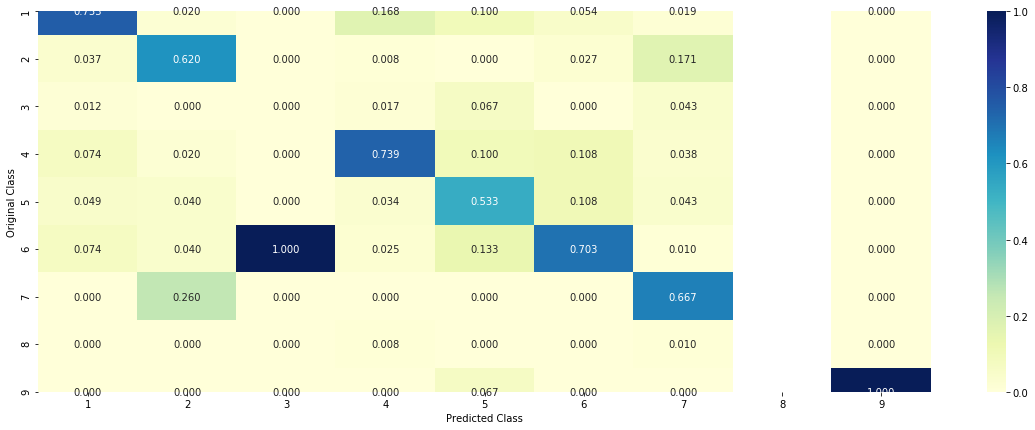

-------------------- Recall matrix (Row sum=1) --------------------


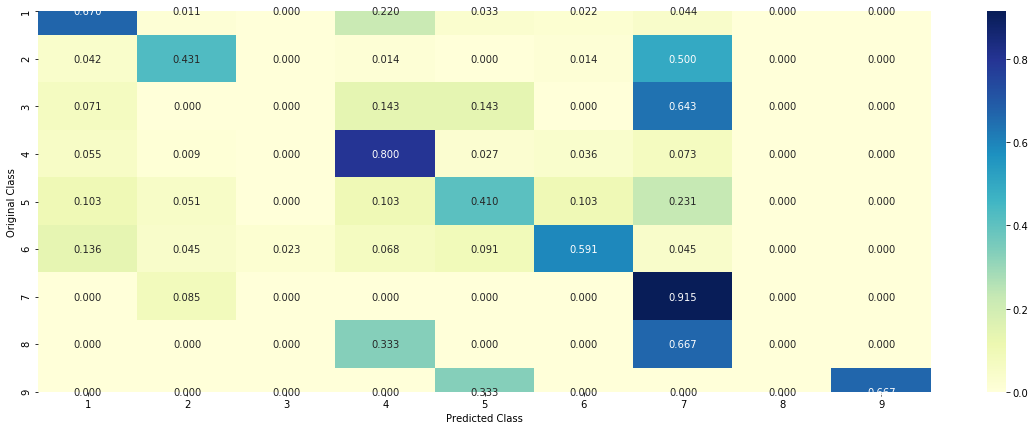

In [159]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_onehotencoding_FE, train_y,cv_x_onehotencoding_FE, cv_y, clf)

<h3>6.2.4 Linear Support Vector Machines (Using TFIDF Representation) </h3>

<h4>6.2.4.1 Hyper Parameter Tuning</h4>

for C = 1e-05
Log Loss : 1.0229628919854217
for C = 0.0001
Log Loss : 0.9728607753511339
for C = 0.001
Log Loss : 1.0274679066411567
for C = 0.01
Log Loss : 1.238913201112323
for C = 0.1
Log Loss : 1.4585079016943856
for C = 1
Log Loss : 1.5766923753867863
for C = 10
Log Loss : 1.5766923486441382
for C = 100
Log Loss : 1.5766923672527862


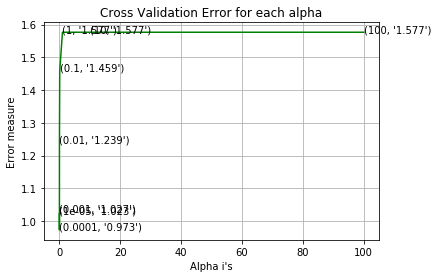

For values of best alpha =  0.0001 The train log loss is: 0.40726509850526293
For values of best alpha =  0.0001 The cross validation log loss is: 0.9728607753511339
For values of best alpha =  0.0001 The test log loss is: 1.0950543409948224


In [160]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_onehotencoding_FE, train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_onehotencoding_FE, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_FE)
    
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)

clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_onehotencoding_FE, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_FE, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
                                  log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
                                    log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(test_x_onehotencoding_FE)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
                                    log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

<h4>6.2.4.2 Testing model with Best Hyper Parameters</h4>

Log loss : 0.9728607753511339
Number of mis-classified points : 0.31954887218045114
-------------------- Confusion matrix --------------------


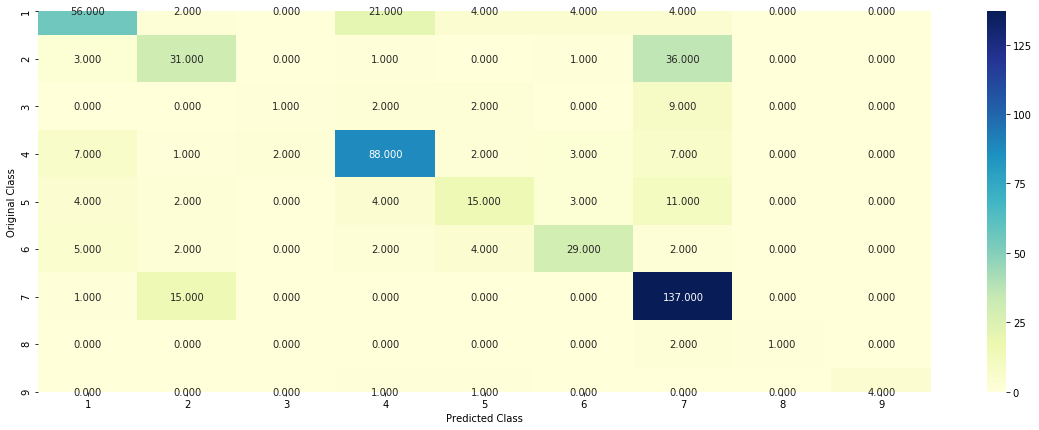

-------------------- Precision matrix (Columm Sum=1) --------------------


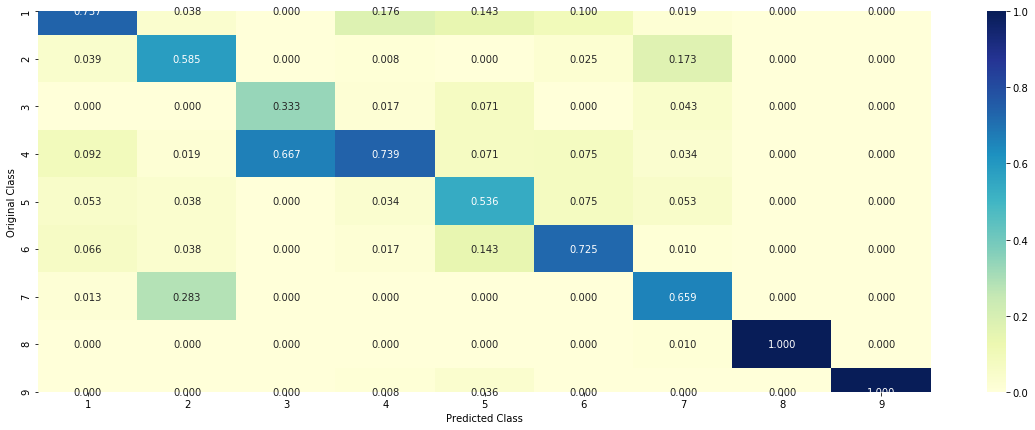

-------------------- Recall matrix (Row sum=1) --------------------


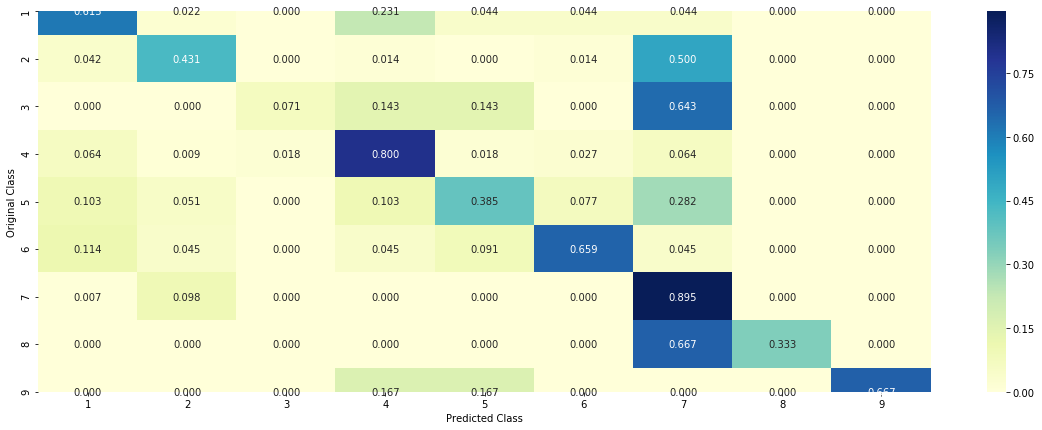

In [161]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_onehotencoding_FE, train_y,cv_x_onehotencoding_FE,cv_y, clf)

<h3>6.2.5 Random Forest Classifier (Using TFIDF Representation) </h3>

<h4>6.2.5.1 Hyper Parameter Tuning (With One hot Encoding)</h4>

In [162]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_onehotencoding_FE, train_y)
        
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_onehotencoding_FE, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_onehotencoding_FE)
        
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini',
                             max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_onehotencoding_FE, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_onehotencoding_FE, train_y)

predict_y = sig_clf.predict_proba(train_x_onehotencoding_FE)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",
                                        log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(cv_x_onehotencoding_FE)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",
                                        log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(test_x_onehotencoding_FE)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",
                                        log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.0535525194731803
for n_estimators = 100 and max depth =  10
Log Loss : 1.0114035834767408
for n_estimators = 200 and max depth =  5
Log Loss : 1.0454777087535625
for n_estimators = 200 and max depth =  10
Log Loss : 1.0070968674652276
for n_estimators = 500 and max depth =  5
Log Loss : 1.0407107518852994
for n_estimators = 500 and max depth =  10
Log Loss : 1.001229547603725
for n_estimators = 1000 and max depth =  5
Log Loss : 1.0429801368195686
for n_estimators = 1000 and max depth =  10
Log Loss : 1.0041936633314388
for n_estimators = 2000 and max depth =  5
Log Loss : 1.0402904618798137
for n_estimators = 2000 and max depth =  10
Log Loss : 1.0040813128314665
For values of best estimator =  500 The train log loss is: 0.5514255434887123
For values of best estimator =  500 The cross validation log loss is: 1.001229547603725
For values of best estimator =  500 The test log loss is: 1.1199664972505312


<h4>6.2.5.2 Testing model with Best Hyper Parameters</h4>

Log loss : 1.001229547603725
Number of mis-classified points : 0.3176691729323308
-------------------- Confusion matrix --------------------


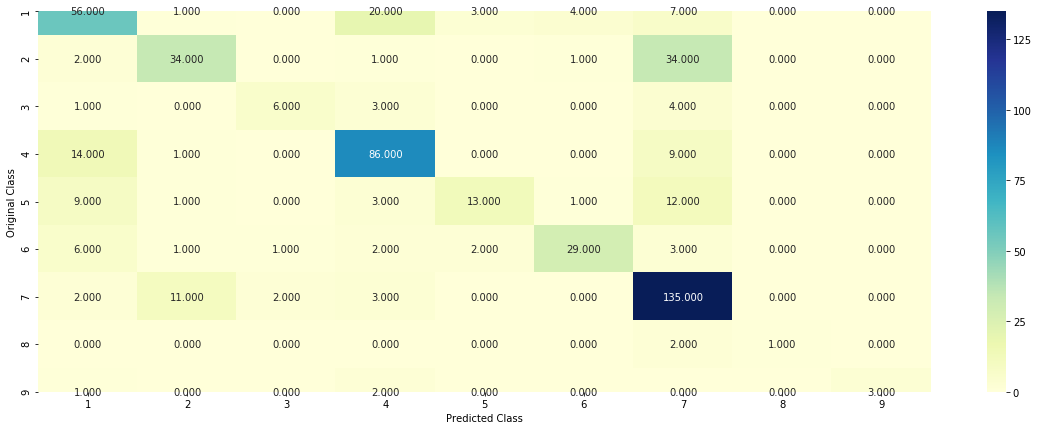

-------------------- Precision matrix (Columm Sum=1) --------------------


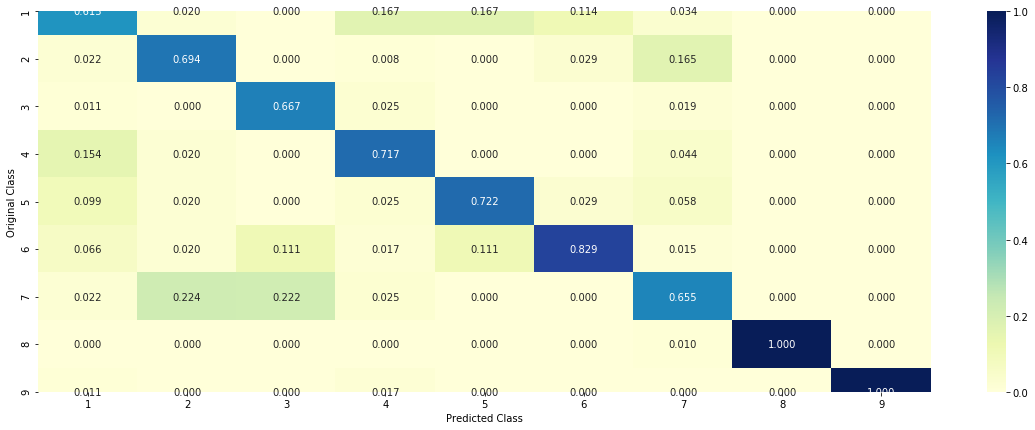

-------------------- Recall matrix (Row sum=1) --------------------


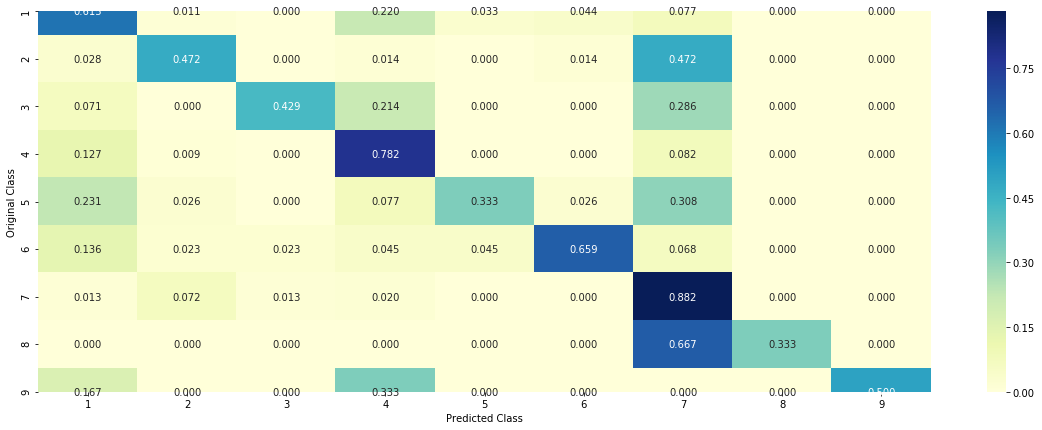

In [163]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_onehotencoding_FE, train_y,cv_x_onehotencoding_FE,cv_y, clf)

<h3>6.2.6 Stack the models obtained using TFIDF Representation </h3>

<h4>6.2.6.1 Testing with Hyper Parameter Tuning</h4>

In [164]:
#Stacking based on the Best values obtained of the Hyperparameters. 

clf1 = SGDClassifier(alpha=0.0001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_onehotencoding_FE, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.0001, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_onehotencoding_FE, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = MultinomialNB(alpha=0.1)
clf3.fit(train_x_onehotencoding_FE, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_onehotencoding_FE, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_onehotencoding_FE))))

sig_clf2.fit(train_x_onehotencoding_FE, train_y)
print("Support vector machines : Log Loss: %0.2f" % 
                      (log_loss(cv_y, sig_clf2.predict_proba(cv_x_onehotencoding_FE))))

sig_clf3.fit(train_x_onehotencoding_FE, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_onehotencoding_FE))))

print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_onehotencoding_FE, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % 
                              (i, log_loss(cv_y, sclf.predict_proba(cv_x_onehotencoding_FE))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_onehotencoding_FE))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 0.92
Support vector machines : Log Loss: 0.97
Naive Bayes : Log Loss: 1.13
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.172
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.987
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.379
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.031
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.158
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.518


<h4>6.2.6.2 Testing the model with the Best Hyper Parameters</h4>

Log loss (train) on the stacking classifier : 0.37123297215642526
Log loss (CV) on the stacking classifier : 1.031027069085706
Log loss (test) on the stacking classifier : 1.184627084333939
Number of missclassified point : 0.39849624060150374
-------------------- Confusion matrix --------------------


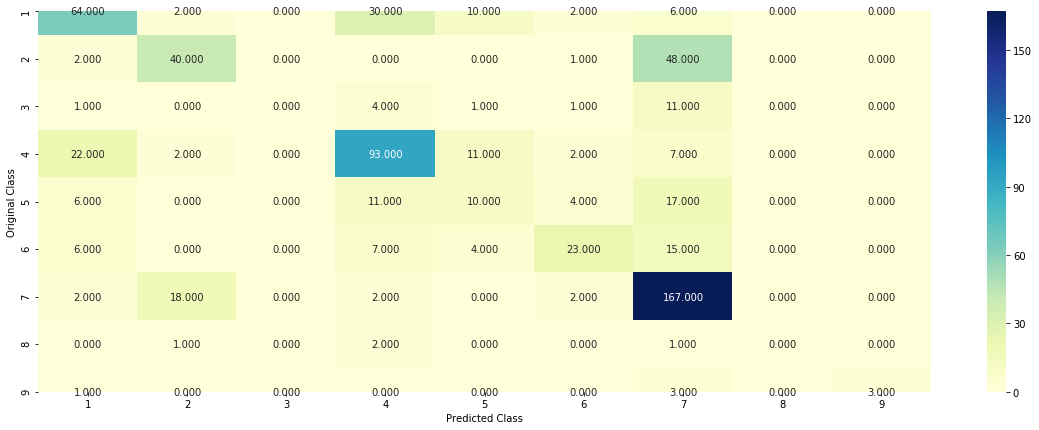

-------------------- Precision matrix (Columm Sum=1) --------------------


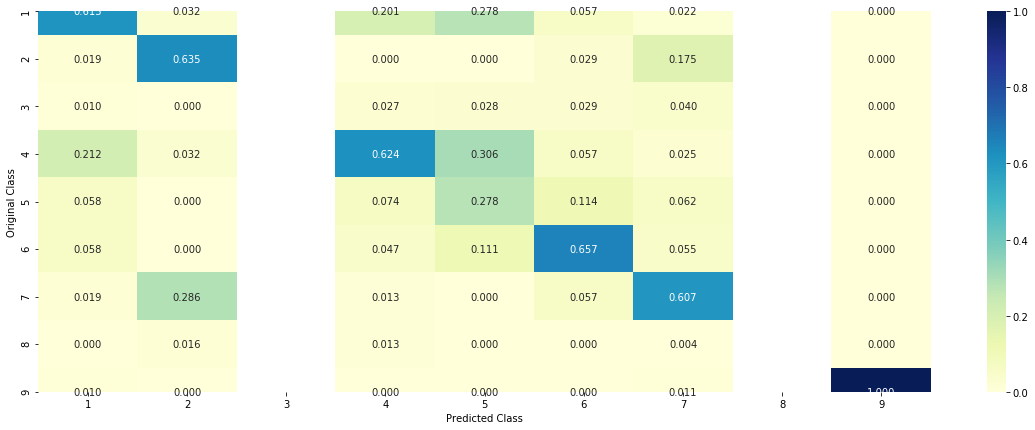

-------------------- Recall matrix (Row sum=1) --------------------


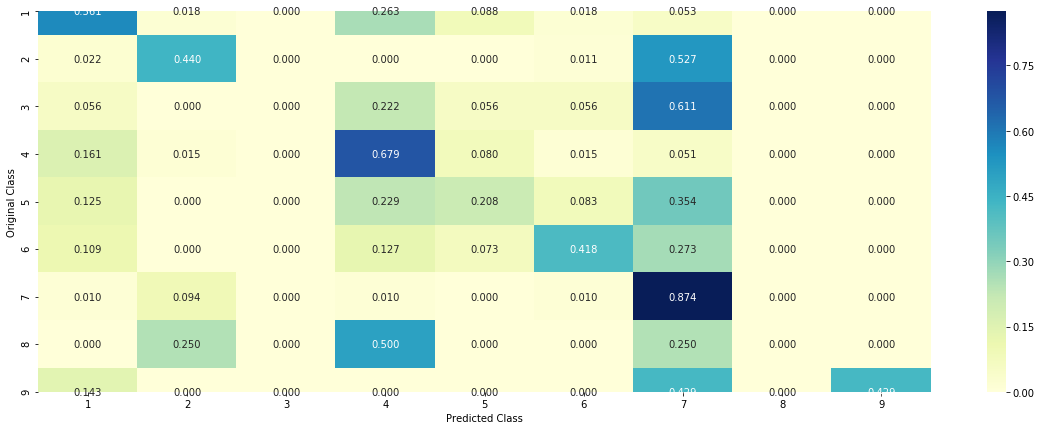

In [165]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_onehotencoding_FE, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_onehotencoding_FE))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_onehotencoding_FE))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_onehotencoding_FE))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_onehotencoding_FE)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_onehotencoding_FE))

# 7. Feature Engineering

In the above scenarios we obtained reasonably high values for CV as well as Text log losses. Now we will carry out
some Feature Engineering ideas so as to get these -> CV loss as well as Test loss to a value less than 1.00

<h2> 7.1 Exploratory Data Analysis </h2>

In [148]:
#Previously we obtained the Top 1000 Text Features whereas now we will look at the Top 1000 Features across the
#entire corpus.

top1000_words = []
all_words = []

ind = 0

while ind < result.shape[0]:
    
    #Splitting and obtaining each word from all Text:
    
    for word in str(result['TEXT'][ind]).split():
        all_words.append(word)
    for var in result['Variation']:
        all_words.append(var)
    for gene in result['Gene']:
        all_words.append(gene)
    
    ind = ind +1

#Training the TFIDF Vectorizer on the entire corpus:

vectorizer = TfidfVectorizer()
corpus = vectorizer.fit_transform(all_words)

#Obtaining Top 1000 Words based on their TF-IDF Values:

idf_values = list(vectorizer.idf_)
indices = list(np.argsort(idf_values))

for i in indices[:1000]:
    top1000_words.append(vectorizer.get_feature_names()[i])

In [150]:
#Initializing
text_count = []
gene_count=[]
var_count=[]

t_count =0 
g_count=0
v_count = 0

#Check each word in the Top 1000 Words to see whether it is from Gene, Variation or Text Features, and counting
#how many are coming from where.

for i in top1000_words:
    if i in text_vec.get_feature_names():
        text_count.append(i)
        t_count = len(text_count)
    elif i in gene_vec.get_feature_names():
        gene_count.append(i)
        g_count = len(gene_count)
    else:
        var_count.append(i)
        v_count = len(var_count)
        
print("Out of the Top 1000 Words in the Corpus, {} words are from the Gene Feature".format(g_count))
print("Out of the Top 1000 Words in the Corpus, {} words are from the Variation Feature".format(v_count))
print("Out of the Top 1000 Words in the Corpus, {} words are from the Text Feature".format(t_count))

Out of the Top 1000 Words in the Corpus, 191 words are from the Gene Feature
Out of the Top 1000 Words in the Corpus, 293 words are from the Variation Feature
Out of the Top 1000 Words in the Corpus, 516 words are from the Text Feature


Therefore, as we can see above of the 1000 Top Features that we obtained, Text is by far the most important across all other features for the Cancer Diagnosis since 516 of the Top 1000 Features are coming from the 'Text' feature.
This is followed by Variation and Gene is the least important of the three.

<h2> 7.2 Feature Engineering - Part 1 </h2>

Following is the Feature Engineering idea tried over here :-
   * We will use TFIDF Vectorizer since it performed much better than the BOW Implementation. Also, bigrams will 
     be very useful along with unigrams in carrying out the correct classification and we take only 1000 Features.
   * We will be using Logistic Regression since it has performed the best across all of our models so far, and see
     how much we can reduce our log loss value.
   * Since Text is the most important of the three features that we have we give it a considerably higher weight 
     than the others. We give it a Weight of 4.
   * Since Variation is more important than Gene, we give it a Weight of 2, whereas for Gene we simply provide a
     weightage of 1.

In [54]:
#Defining the Vectorizer :- both unigrams as well as bigrams

vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=1000)

#One Hot Encoding for each of the Features. Normalization is very important here also and should not be forgotten.

text_train_onehotencoding = normalize(vectorizer.fit_transform(train_df['TEXT']))
text_cv_onehotencoding = normalize(vectorizer.transform(cv_df['TEXT']))
text_test_onehotencoding = normalize(vectorizer.transform(test_df['TEXT']))

var_train_onehotencoding = normalize(vectorizer.fit_transform(train_df['Variation']))
var_cv_onehotencoding = normalize(vectorizer.transform(cv_df['Variation']))
var_test_onehotencoding = normalize(vectorizer.transform(test_df['Variation']))

gene_train_onehotencoding = normalize(vectorizer.fit_transform(train_df['Gene']))
gene_cv_onehotencoding = normalize(vectorizer.transform(cv_df['Gene']))
gene_test_onehotencoding = normalize(vectorizer.transform(test_df['Gene']))

In [55]:
#Giving 4 Times Weight to the Text Feature
train_text_weight = hstack((text_train_onehotencoding,text_train_onehotencoding,text_train_onehotencoding,
                           text_train_onehotencoding))

#Giving 2 Times weightage to the Variation feature and combining both the features obtained
variation_text_weight = hstack((var_train_onehotencoding,var_train_onehotencoding))
train_text_var_combined = hstack((train_text_weight,variation_text_weight))

#Gene as a feature is provided with a weight of only 1 and combined with all of them.
TFIDF_train_x_onehotencoding_FE1 = hstack((train_text_var_combined,gene_train_onehotencoding)).tocsr()
TFIDF_train_y = np.array(list(train_df['Class']))

cv_text_weight = hstack((text_cv_onehotencoding,text_cv_onehotencoding,text_cv_onehotencoding,
                        text_cv_onehotencoding))
variation_text_weight = hstack((var_cv_onehotencoding,var_cv_onehotencoding))
cv_text_var_combined = hstack((cv_text_weight,variation_text_weight))

TFIDF_cv_x_onehotencoding_FE1 = hstack((cv_text_var_combined,gene_cv_onehotencoding)).tocsr()
TFIDF_cv_y = np.array(list(cv_df['Class']))

test_text_weight = hstack((text_test_onehotencoding,text_test_onehotencoding,text_test_onehotencoding,
                          text_test_onehotencoding))
variation_text_weight = hstack((var_test_onehotencoding,var_test_onehotencoding))
test_text_var_combined = hstack((test_text_weight,variation_text_weight))

TFIDF_test_x_onehotencoding_FE1 = hstack((test_text_var_combined,gene_test_onehotencoding)).tocsr()
TFIDF_test_y = np.array(list(test_df['Class']))

<h3>7.2.1 FE Model 1 :- Logistic Regression (With Class Balancing) + TFIDF Vectorization</h3> 

<h4>Hyperparameter Tuning</h4> 

for alpha = 1e-06
Log Loss : 1.267406095676274
for alpha = 1e-05
Log Loss : 1.1806142901049885
for alpha = 0.0001
Log Loss : 0.9969624796003487
for alpha = 0.001
Log Loss : 0.9899630791632941
for alpha = 0.01
Log Loss : 1.1195628168000844
for alpha = 0.1
Log Loss : 1.3580230236418676
for alpha = 1
Log Loss : 1.4737105099573815
for alpha = 10
Log Loss : 1.491697942789958
for alpha = 100
Log Loss : 1.493769188727781


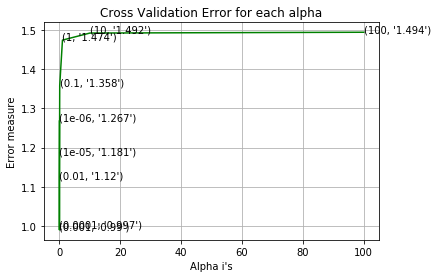

For values of best alpha =  0.001 The train log loss is: 0.4547346498337286
For values of best alpha =  0.001 The cross validation log loss is: 0.9899630791632941
For values of best alpha =  0.001 The test log loss is: 0.9839405618344593
Time taken to run this cell : 0:36:29.984552


In [69]:
#HyperParameter Tuning with TFIDF Vectorizer
start = datetime.now()

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
    sig_clf_probs = sig_clf.predict_proba(TFIDF_cv_x_onehotencoding_FE1)
    
    cv_log_error_array.append(log_loss(TFIDF_cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(TFIDF_cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)

predict_y = sig_clf.predict_proba(TFIDF_train_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(TFIDF_train_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(TFIDF_cv_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
      log_loss(TFIDF_cv_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(TFIDF_test_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
      log_loss(TFIDF_test_y, predict_y, labels=clf.classes_, eps=1e-15))

print("Time taken to run this cell :", datetime.now() - start)

<h4>Testing on Best Value of alpha obtained</h4> 

Log loss : 0.9484931410408386
Number of mis-classified points : 0.3458646616541353
-------------------- Confusion matrix --------------------


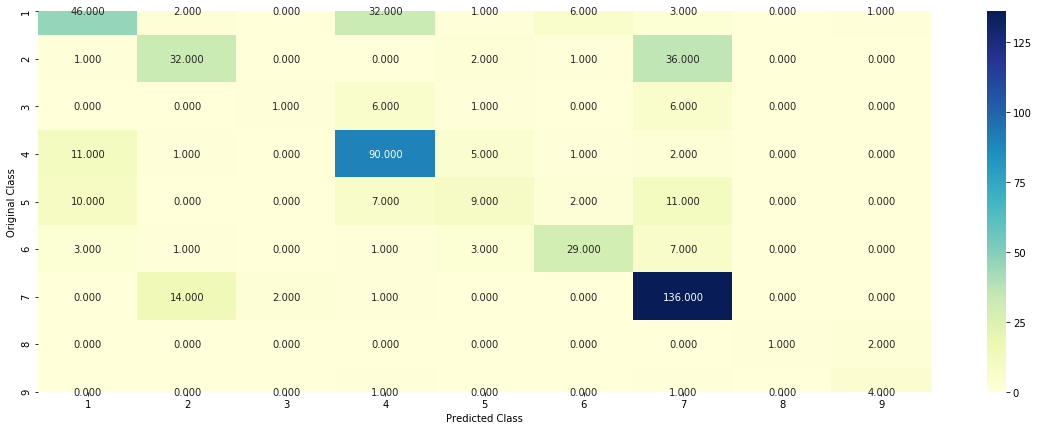

-------------------- Precision matrix (Columm Sum=1) --------------------


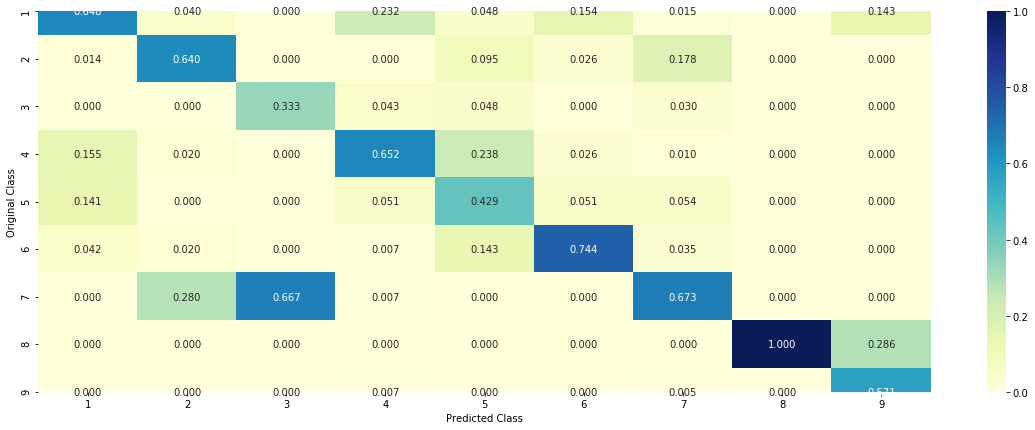

-------------------- Recall matrix (Row sum=1) --------------------


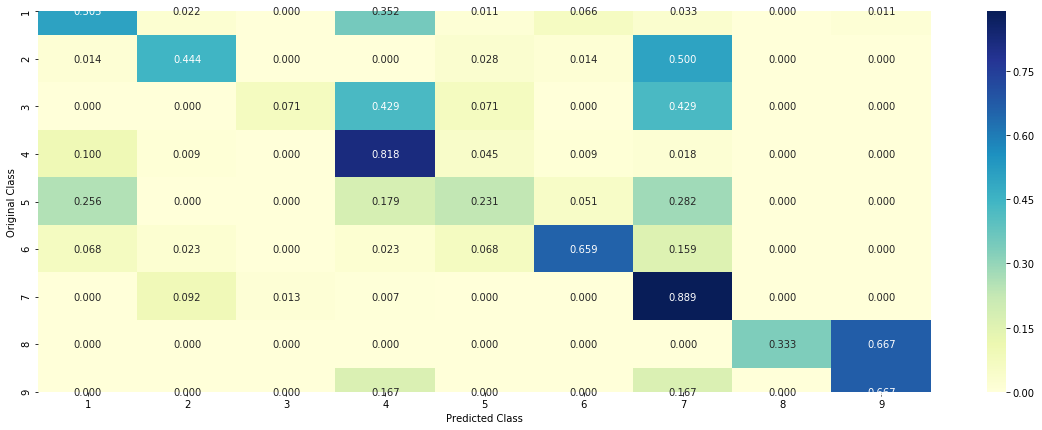

In [93]:
#Misclassification %
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y,TFIDF_cv_x_onehotencoding_FE1,
                                   TFIDF_cv_y, clf)

<h3>7.1.2 FE Model 2 :- Logistic Regression (Without Class Balancing) + TFIDF Vectorization</h3> 

<h4>Hyperparameter Tuning</h4> 

for alpha = 1e-06
Log Loss : 1.154944585450836
for alpha = 1e-05
Log Loss : 1.107870834086373
for alpha = 0.0001
Log Loss : 0.9862755552779054
for alpha = 0.001
Log Loss : 0.9979316751505338
for alpha = 0.01
Log Loss : 1.2015800935650596
for alpha = 0.1
Log Loss : 1.6685079176024993
for alpha = 1
Log Loss : 1.7790503088660237
for alpha = 10
Log Loss : 1.7880019767582713
for alpha = 100
Log Loss : 1.7888823357702142


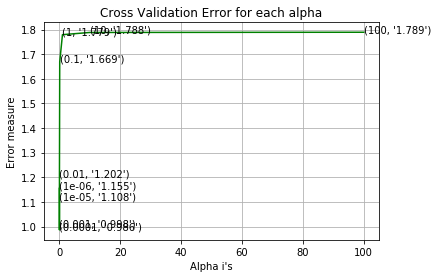

For values of best alpha =  0.0001 The train log loss is: 0.4039592603761419
For values of best alpha =  0.0001 The cross validation log loss is: 0.9862755552779054
For values of best alpha =  0.0001 The test log loss is: 0.9936218211681009
Time taken to run this cell : 0:50:19.470174


In [102]:
start = datetime.now()

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
    sig_clf_probs = sig_clf.predict_proba(TFIDF_cv_x_onehotencoding_FE1)
    
    cv_log_error_array.append(log_loss(TFIDF_cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(TFIDF_cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)

predict_y = sig_clf.predict_proba(TFIDF_train_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(TFIDF_train_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(TFIDF_cv_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
      log_loss(TFIDF_cv_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(TFIDF_test_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
      log_loss(TFIDF_test_y, predict_y, labels=clf.classes_, eps=1e-15))

print("Time taken to run this cell :", datetime.now() - start)

<h4>Testing on Best Value of alpha obtained</h4> 

Log loss : 1.1681424502083126
Number of mis-classified points : 0.3815789473684211
-------------------- Confusion matrix --------------------


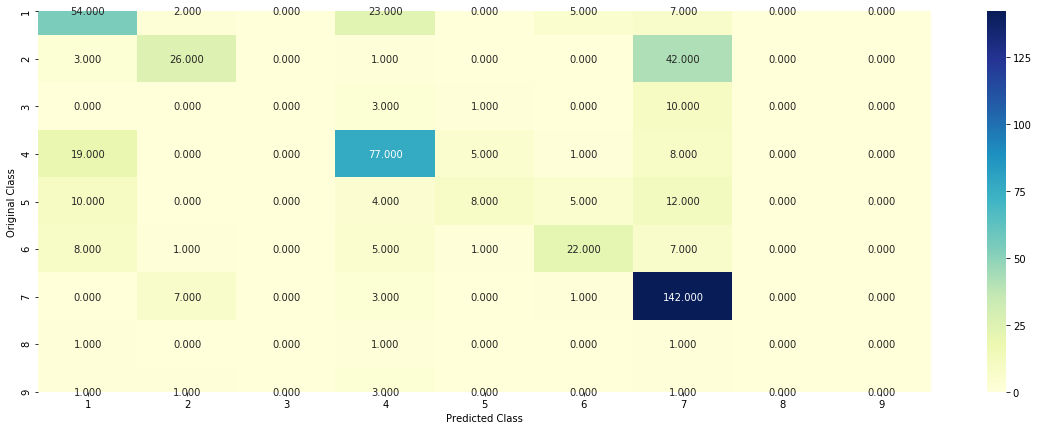

-------------------- Precision matrix (Columm Sum=1) --------------------


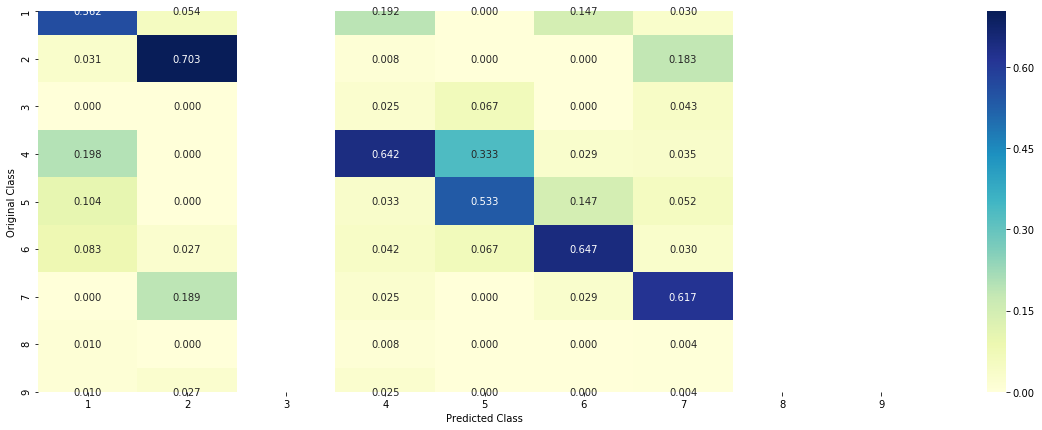

-------------------- Recall matrix (Row sum=1) --------------------


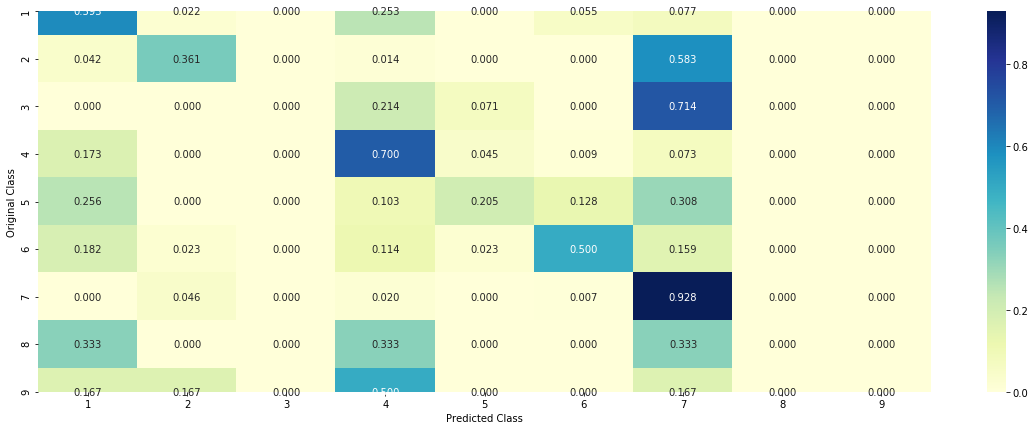

In [58]:
#Misclassification %
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y,TFIDF_cv_x_onehotencoding_FE1,
                                   TFIDF_cv_y, clf)

<h2> 7.3 Feature Engineering - Part 2 </h2>

Following is the Feature Engineering idea tried over here: 
     Initial Feature Engineering is what has already been carried out in Part 1- (We will try to improve on the same)
     
   * We will use TFIDF Vectorizer since it performed much better than the BOW Implementation. Also, bigrams will 
     be very useful along with unigrams in carrying out the correct classification and we take only 1000 Features.
   * We will be using Logistic Regression since it has performed the best across all of our models so far, and see
     how much we can reduce our log loss value.
   * Since Text is the most important of the three features that we have we give it a considerably higher weight 
     than the others. We give it a Weight of 4.
   * Since Variation is more important than Gene, we give it a Weight of 2, whereas for Gene we simply provide a
     weightage of 1.
     
   * On Top of all this, we store all the possible values of Gene and Variation from the Train data in a list and fit on this list.

In [63]:
gene_var = []

for gene in train_df['Gene'].values:
    gene_var.append(gene)

for variation in train_df['Variation'].values:
    gene_var.append(variation)

In [64]:
tfidfVectorizer = TfidfVectorizer(max_features=1000,ngram_range=(1,2)).fit(gene_var)

train_text_gene_var_encoding = tfidfVectorizer.transform(train_df['TEXT'])
test_text_gene_var_encoding = tfidfVectorizer.transform(test_df['TEXT'])
cv_text_gene_var_encoding = tfidfVectorizer.transform(cv_df['TEXT'])

In [65]:
train_text_weight = hstack((text_train_onehotencoding,text_train_onehotencoding,text_train_onehotencoding,
                           text_train_onehotencoding))
variation_text_weight = hstack((var_train_onehotencoding,var_train_onehotencoding))
train_text_var_combined = hstack((train_text_weight,variation_text_weight))

TFIDF_train_x_onehotencoding_FE1 = hstack((train_text_var_combined,train_text_gene_var_encoding)).tocsr()
TFIDF_train_y = np.array(list(train_df['Class']))

cv_text_weight = hstack((text_cv_onehotencoding,text_cv_onehotencoding,text_cv_onehotencoding,
                        text_cv_onehotencoding))
variation_text_weight = hstack((var_cv_onehotencoding,var_cv_onehotencoding))
cv_text_var_combined = hstack((cv_text_weight,variation_text_weight))

TFIDF_cv_x_onehotencoding_FE1 = hstack((cv_text_var_combined,cv_text_gene_var_encoding)).tocsr()
TFIDF_cv_y = np.array(list(cv_df['Class']))

test_text_weight = hstack((text_test_onehotencoding,text_test_onehotencoding,text_test_onehotencoding,
                          text_test_onehotencoding))
variation_text_weight = hstack((var_test_onehotencoding,var_test_onehotencoding))
test_text_var_combined = hstack((test_text_weight,variation_text_weight))

TFIDF_test_x_onehotencoding_FE1 = hstack((test_text_var_combined,test_text_gene_var_encoding)).tocsr()
TFIDF_test_y = np.array(list(test_df['Class']))

<h3>7.3.1 FE Model 3 :- Logistic Regression (With Class Balancing) + TFIDF Vectorization + [Gene,Var]</h3> 

<h4>Hyperparameter Tuning</h4> 

for alpha = 1e-06
Log Loss : 1.2189196306741379
for alpha = 1e-05
Log Loss : 1.150375516993099
for alpha = 0.0001
Log Loss : 0.9914674652692238
for alpha = 0.001
Log Loss : 1.0055316513553028
for alpha = 0.01
Log Loss : 1.1536934460301704
for alpha = 0.1
Log Loss : 1.393313583424929
for alpha = 1
Log Loss : 1.4840653298268518
for alpha = 10
Log Loss : 1.500818862902022
for alpha = 100
Log Loss : 1.5027815263202517


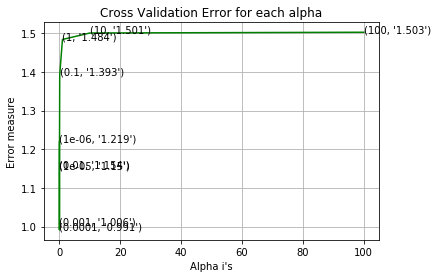

For values of best alpha =  0.0001 The train log loss is: 0.3670313101019374
For values of best alpha =  0.0001 The cross validation log loss is: 0.9914674652692238
For values of best alpha =  0.0001 The test log loss is: 0.9265603624442152
Time taken to run this cell : 0:36:20.658048


In [188]:
#HyperParameter Tuning with TFIDF Vectorizer
start = datetime.now()

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
    sig_clf_probs = sig_clf.predict_proba(TFIDF_cv_x_onehotencoding_FE1)
    
    cv_log_error_array.append(log_loss(TFIDF_cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(TFIDF_cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)

predict_y = sig_clf.predict_proba(TFIDF_train_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(TFIDF_train_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(TFIDF_cv_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
      log_loss(TFIDF_cv_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(TFIDF_test_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
      log_loss(TFIDF_test_y, predict_y, labels=clf.classes_, eps=1e-15))

print("Time taken to run this cell :", datetime.now() - start)

<h4>Testing on Best Value of alpha obtained</h4> 

Log loss : 1.0261157679150241
Number of mis-classified points : 0.34022556390977443
-------------------- Confusion matrix --------------------


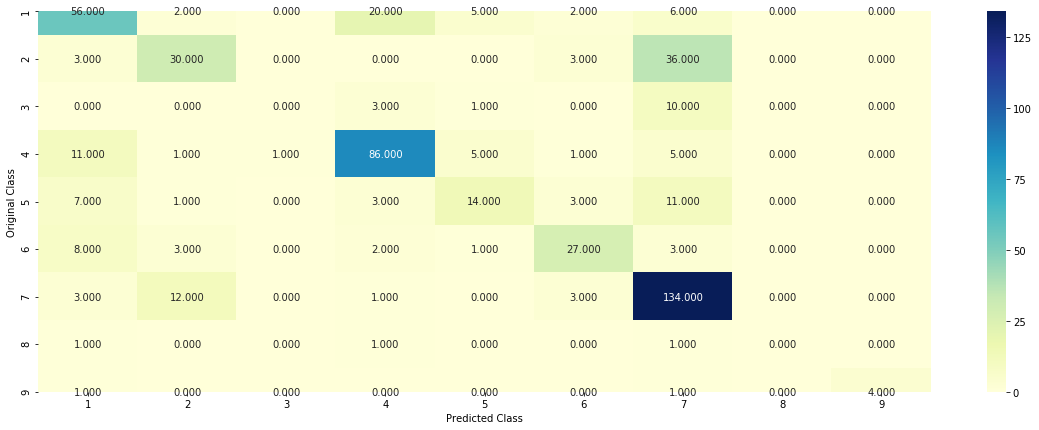

-------------------- Precision matrix (Columm Sum=1) --------------------


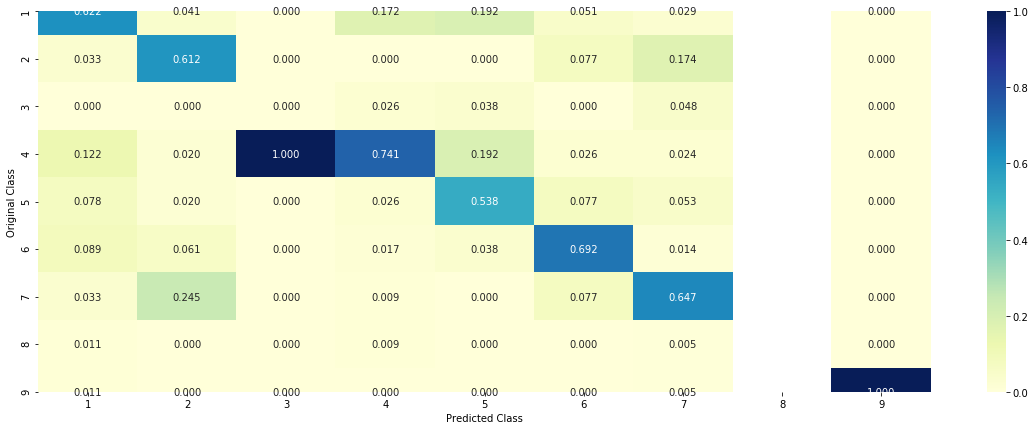

-------------------- Recall matrix (Row sum=1) --------------------


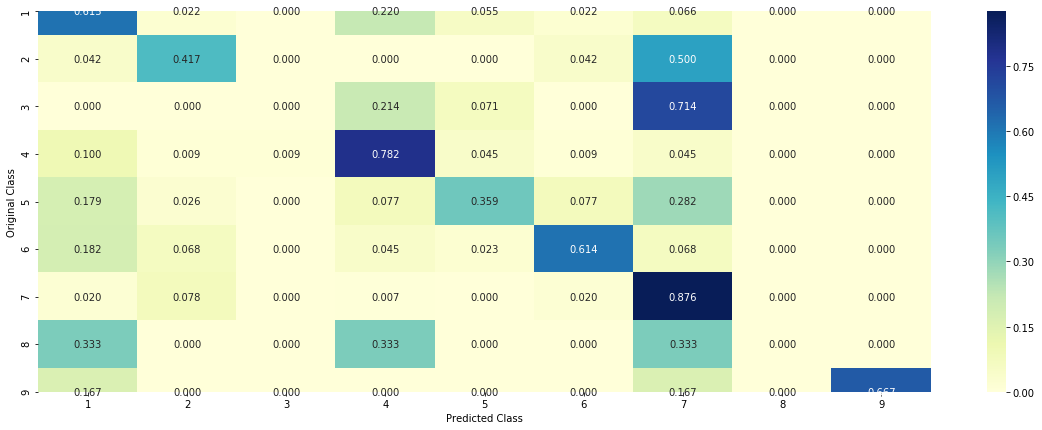

In [66]:
#Misclassification %
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y,TFIDF_cv_x_onehotencoding_FE1,
                                   TFIDF_cv_y, clf)

<h3>7.3.2 FE Model 4 :- Logistic Regression (Without Class Balancing) + TFIDF Vectorization + [Gene,Var]</h3> 

<h4>Hyperparameter Tuning</h4> 

for alpha = 1e-06
Log Loss : 1.226935555261951
for alpha = 1e-05
Log Loss : 1.1173653805243926
for alpha = 0.0001
Log Loss : 0.9779407722197596
for alpha = 0.001
Log Loss : 0.9815405230960025
for alpha = 0.01
Log Loss : 1.1177246199287971
for alpha = 0.1
Log Loss : 1.3585914996055313
for alpha = 1
Log Loss : 1.4744932813599319
for alpha = 10
Log Loss : 1.4924703563235873
for alpha = 100
Log Loss : 1.4945396534833297


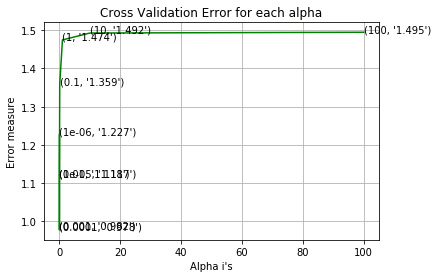

For values of best alpha =  0.0001 The train log loss is: 0.3704719114555564
For values of best alpha =  0.0001 The cross validation log loss is: 0.9779407722197596
For values of best alpha =  0.0001 The test log loss is: 0.9662815060333625
Time taken to run this cell : 0:36:59.816970


In [65]:
#HyperParameter Tuning with TFIDF Vectorizer
start = datetime.now()

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
    sig_clf_probs = sig_clf.predict_proba(TFIDF_cv_x_onehotencoding_FE1)
    
    cv_log_error_array.append(log_loss(TFIDF_cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(TFIDF_cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)

predict_y = sig_clf.predict_proba(TFIDF_train_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(TFIDF_train_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(TFIDF_cv_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
      log_loss(TFIDF_cv_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(TFIDF_test_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
      log_loss(TFIDF_test_y, predict_y, labels=clf.classes_, eps=1e-15))

print("Time taken to run this cell :", datetime.now() - start)

<h4>Testing on Best Value of alpha obtained</h4> 

Log loss : 1.026217006766285
Number of mis-classified points : 0.34774436090225563
-------------------- Confusion matrix --------------------


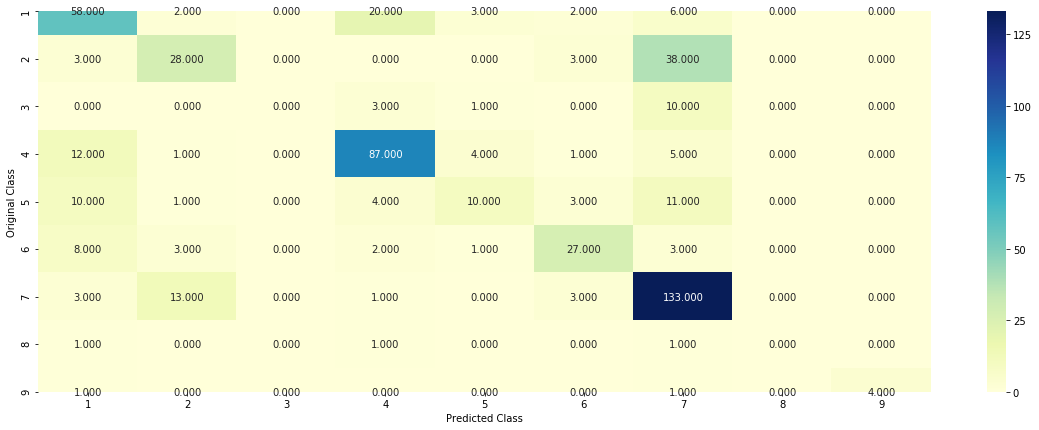

-------------------- Precision matrix (Columm Sum=1) --------------------


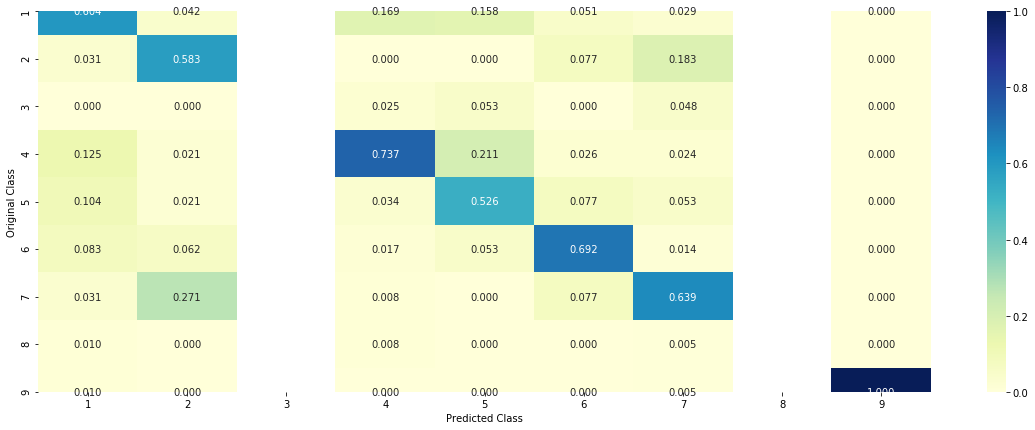

-------------------- Recall matrix (Row sum=1) --------------------


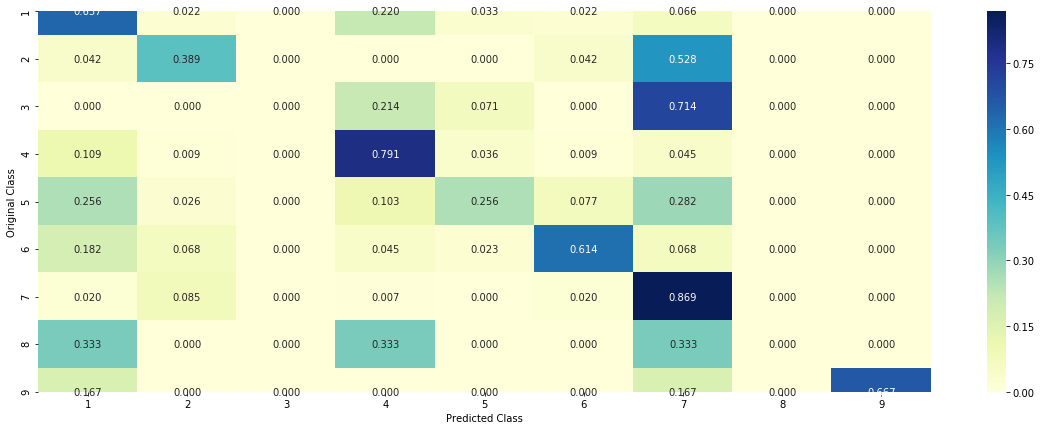

In [67]:
#Misclassification %
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y,TFIDF_cv_x_onehotencoding_FE1,
                                   TFIDF_cv_y, clf)

<h2> 7.4 Feature Engineering - Part 3 </h2>

Following is the Feature Engineering idea tried over here: 
     Initial Feature Engineering is what has already been carried out in Part 1- (We will try to improve on the same)
     
   * We will use TFIDF Vectorizer since it performed much better than the BOW Implementation. Also, bigrams will 
     be very useful along with unigrams in carrying out the correct classification and we take only 1000 Features.
   * We will be using Logistic Regression since it has performed the best across all of our models so far, and see
     how much we can reduce our log loss value.
   * Since Text is the most important of the three features that we have we give it a considerably higher weight 
     than the others. We give it a Weight of 4.
   * Since Variation is more important than Gene, we give it a Weight of 2, whereas for Gene we simply provide a
     weightage of 1.
     
   * On Top of all this, we store all the Text Data Fields in a list and use this to trasform our Gene and Variation Features. (opposite to what we did in Part 2)

In [69]:
text_var = []

for text in train_df['TEXT'].values:
    text_var.append(text)

In [70]:
tfidfVectorizer = TfidfVectorizer(ngram_range=(1,2)).fit(text_var)

train_var_encoding = tfidfVectorizer.transform(train_df['Variation'])
test_var_encoding = tfidfVectorizer.transform(test_df['Variation'])
cv_var_encoding = tfidfVectorizer.transform(cv_df['Variation'])

train_gene_encoding = tfidfVectorizer.transform(train_df['Gene'])
test_gene_encoding = tfidfVectorizer.transform(test_df['Gene'])
cv_gene_encoding = tfidfVectorizer.transform(cv_df['Gene'])

In [71]:
train_text_weight = hstack((text_train_onehotencoding,text_train_onehotencoding,text_train_onehotencoding))
variation_text_weight = hstack((var_train_onehotencoding,var_train_onehotencoding))
train_text_var_combined = hstack((train_text_weight,variation_text_weight))

trans_text1 = hstack((train_var_encoding,train_gene_encoding))
trans_var_gene1 = hstack((trans_text1,gene_train_onehotencoding))

TFIDF_train_x_onehotencoding_FE1 = hstack((train_text_var_combined,trans_var_gene1)).tocsr()
TFIDF_train_y = np.array(list(train_df['Class']))

cv_text_weight = hstack((text_cv_onehotencoding,text_cv_onehotencoding,text_cv_onehotencoding))
variation_text_weight = hstack((var_cv_onehotencoding,var_cv_onehotencoding))
cv_text_var_combined = hstack((cv_text_weight,variation_text_weight))

trans_text2 = hstack((cv_var_encoding,cv_gene_encoding))
trans_var_gene2 = hstack((trans_text2,gene_cv_onehotencoding))

TFIDF_cv_x_onehotencoding_FE1 = hstack((cv_text_var_combined,trans_var_gene2)).tocsr()
TFIDF_cv_y = np.array(list(cv_df['Class']))

test_text_weight = hstack((text_test_onehotencoding,text_test_onehotencoding,text_test_onehotencoding))
variation_text_weight = hstack((var_test_onehotencoding,var_test_onehotencoding))
test_text_var_combined = hstack((test_text_weight,variation_text_weight))

trans_text3 = hstack((test_var_encoding,test_gene_encoding))
trans_var_gene3 = hstack((trans_text3,gene_test_onehotencoding))

TFIDF_test_x_onehotencoding_FE1 = hstack((test_text_var_combined,trans_var_gene3)).tocsr()
TFIDF_test_y = np.array(list(test_df['Class']))

<h3>7.4.1 FE Model 5 :- Logistic Regression (With Class Balancing) + TFIDF Vectorization + [Text]</h3> 

<h4>Hyperparameter Tuning</h4> 

for alpha = 1e-06
Log Loss : 1.1614264110668893
for alpha = 1e-05
Log Loss : 1.1024577367564388
for alpha = 0.0001
Log Loss : 0.9484931410408386
for alpha = 0.001
Log Loss : 0.9686036101875665
for alpha = 0.01
Log Loss : 1.1372127053592211
for alpha = 0.1
Log Loss : 1.3976788054547693
for alpha = 1
Log Loss : 1.5174470780330078
for alpha = 10
Log Loss : 1.5397144791146848
for alpha = 100
Log Loss : 1.5423698036298183


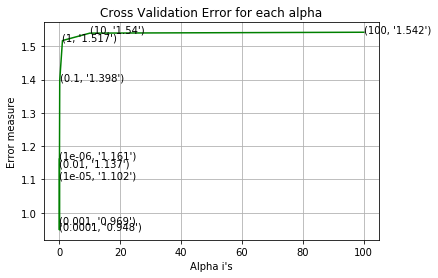

For values of best alpha =  0.0001 The train log loss is: 0.3976659263646384
For values of best alpha =  0.0001 The cross validation log loss is: 0.9484931410408386
For values of best alpha =  0.0001 The test log loss is: 0.9839145170096129
Time taken to run this cell : 0:51:47.791318


In [64]:
#HyperParameter Tuning with TFIDF Vectorizer
start = datetime.now()

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
    sig_clf_probs = sig_clf.predict_proba(TFIDF_cv_x_onehotencoding_FE1)
    
    cv_log_error_array.append(log_loss(TFIDF_cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(TFIDF_cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)

predict_y = sig_clf.predict_proba(TFIDF_train_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(TFIDF_train_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(TFIDF_cv_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
      log_loss(TFIDF_cv_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(TFIDF_test_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
      log_loss(TFIDF_test_y, predict_y, labels=clf.classes_, eps=1e-15))

print("Time taken to run this cell :", datetime.now() - start)

<h4>Testing on Best Value of alpha obtained</h4> 

Log loss : 1.004153541254169
Number of mis-classified points : 0.3383458646616541
-------------------- Confusion matrix --------------------


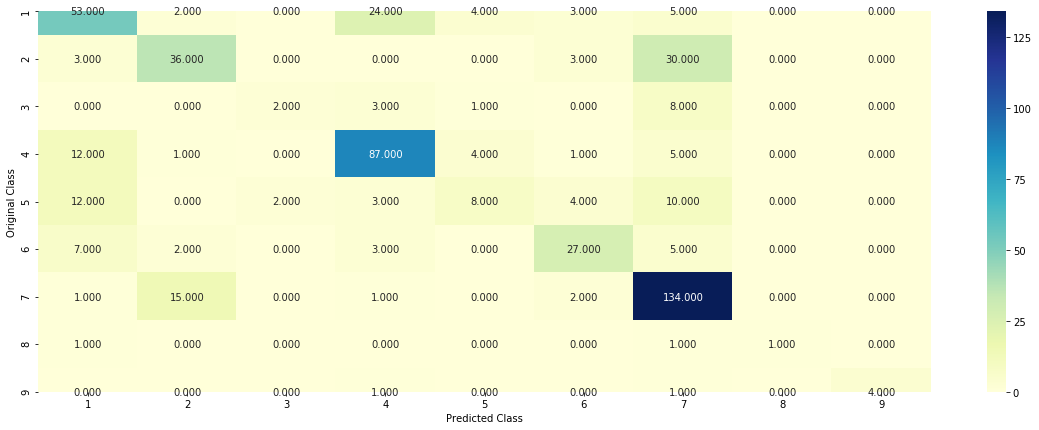

-------------------- Precision matrix (Columm Sum=1) --------------------


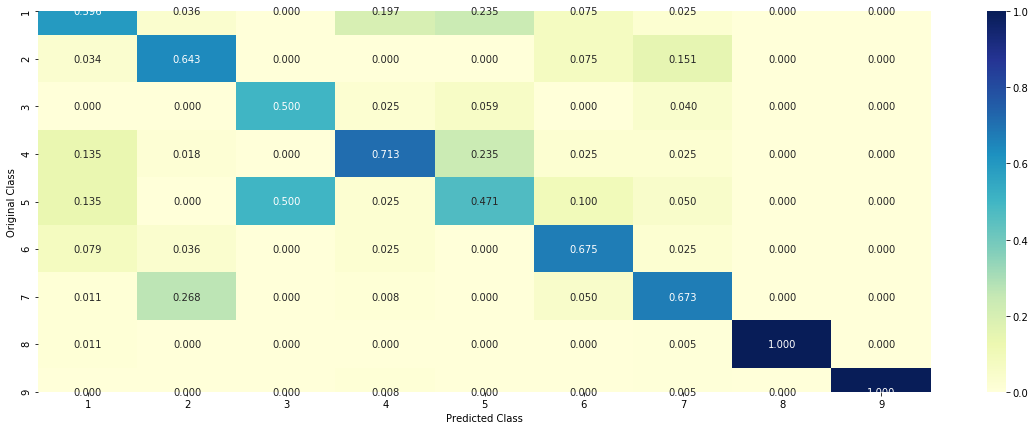

-------------------- Recall matrix (Row sum=1) --------------------


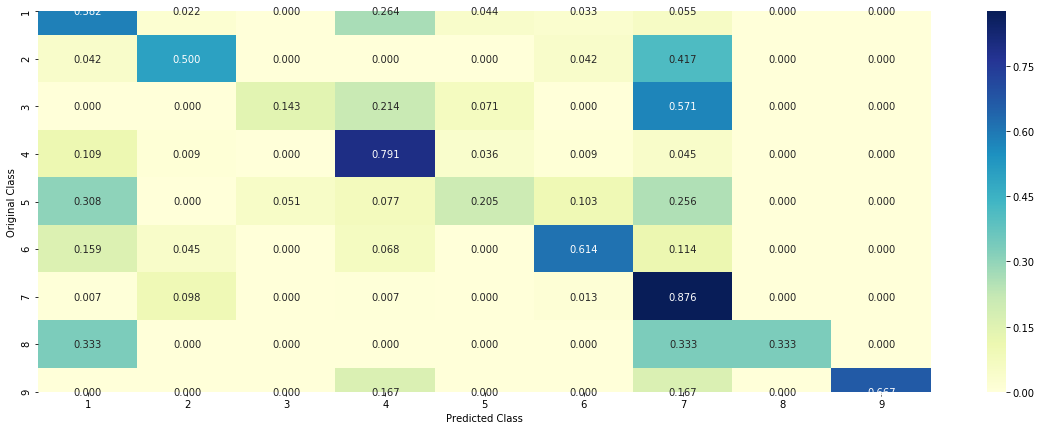

In [72]:
#Misclassification %
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y,TFIDF_cv_x_onehotencoding_FE1,
                                   TFIDF_cv_y, clf)

<h3>7.4.2 FE Model 6 :- Logistic Regression (Without Class Balancing) + TFIDF Vectorization + [Text]</h3> 

<h4>Hyperparameter Tuning</h4> 

for alpha = 1e-06
Log Loss : 1.2025477025172127
for alpha = 1e-05
Log Loss : 1.0930661821319716
for alpha = 0.0001
Log Loss : 0.9562853198697612
for alpha = 0.001
Log Loss : 0.9759286927757893
for alpha = 0.01
Log Loss : 1.106082044695392
for alpha = 0.1
Log Loss : 1.3103783583402548
for alpha = 1
Log Loss : 1.426372535847301
for alpha = 10
Log Loss : 1.4439443157339715
for alpha = 100
Log Loss : 1.446015010067634


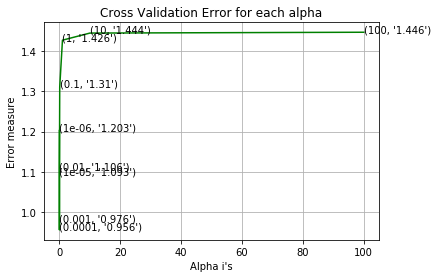

For values of best alpha =  0.0001 The train log loss is: 0.35929053943833544
For values of best alpha =  0.0001 The cross validation log loss is: 0.9562853198697612
For values of best alpha =  0.0001 The test log loss is: 0.9974437161515034
Time taken to run this cell : 2:09:52.465098


In [168]:
#HyperParameter Tuning with TFIDF Vectorizer
start = datetime.now()

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
    sig_clf_probs = sig_clf.predict_proba(TFIDF_cv_x_onehotencoding_FE1)
    
    cv_log_error_array.append(log_loss(TFIDF_cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(TFIDF_cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y)

predict_y = sig_clf.predict_proba(TFIDF_train_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",
      log_loss(TFIDF_train_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(TFIDF_cv_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",
      log_loss(TFIDF_cv_y, predict_y, labels=clf.classes_, eps=1e-15))

predict_y = sig_clf.predict_proba(TFIDF_test_x_onehotencoding_FE1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",
      log_loss(TFIDF_test_y, predict_y, labels=clf.classes_, eps=1e-15))

print("Time taken to run this cell :", datetime.now() - start)

<h4>Testing on Best Value of alpha obtained</h4> 

Log loss : 1.0111641093508532
Number of mis-classified points : 0.34774436090225563
-------------------- Confusion matrix --------------------


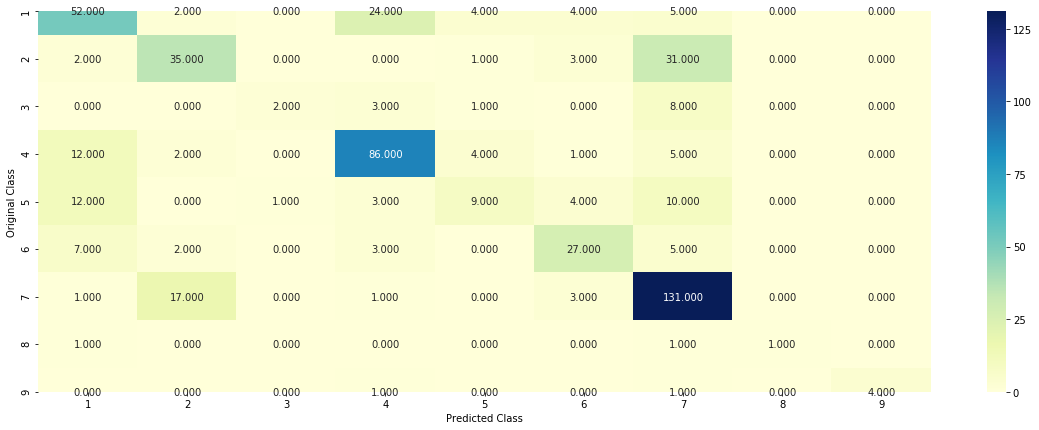

-------------------- Precision matrix (Columm Sum=1) --------------------


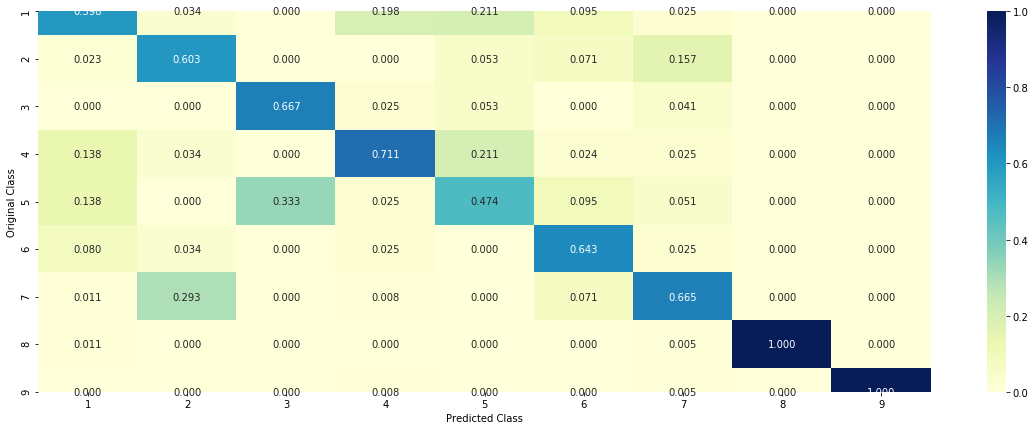

-------------------- Recall matrix (Row sum=1) --------------------


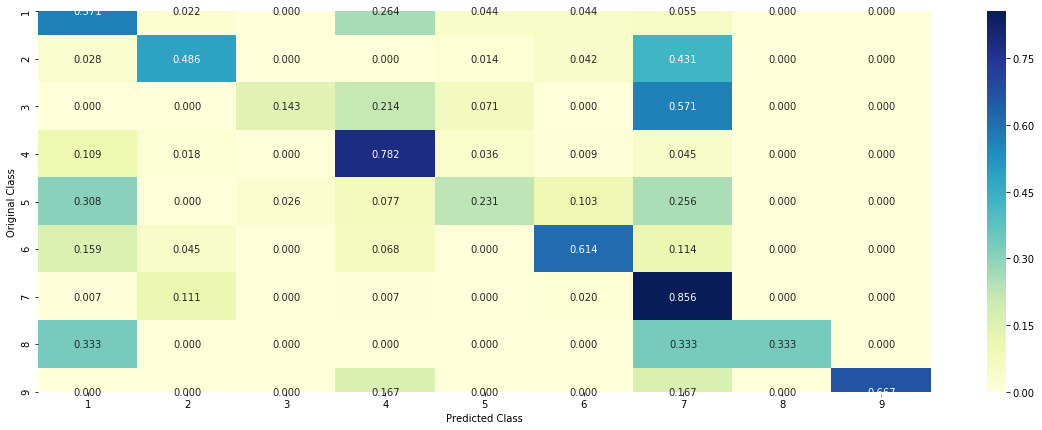

In [73]:
#Misclassification %
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(TFIDF_train_x_onehotencoding_FE1, TFIDF_train_y,TFIDF_cv_x_onehotencoding_FE1,
                                   TFIDF_cv_y, clf)

# 8. Conclusion

The Machine Learning task in this scenario was to classify the particular mutation into one of the 9 Classes based on the Text description ie the Literature for each classification. We were provided with a dataset of 3321 Datapoints with 3 Features :- Gene, Variation as well as Text, and we have to create the Cancer Multiclass Classification Model on top of this.

Now it is very important to understand the real world implementation of the model and take that into account while proceeding. There are no strict Latency constraints because we need not return the result in milliseconds or seconds. We can even take a few hours if needed. Then, note that the errors made in such an application can be extremely costly because if we are misclassifying a patient's diagnosis, his/her entire treatment plan will be affected. Finally, the Interpretability of the Model needs to be High and in order to achieve this objective we should return the Probability estimates :- How confident the model is about a datapoint belonging to a particular class? 

Deciding the Metric :- The Metric that we have used and aimed at minimizing over here is Log Loss. Minimizing the Log Loss is the same as Maximizing the Accuracy.We anyway have to assign the Probability value for each class for our Model Interpretability, necessary for Log Loss Calculation. If the Predicted Class Probability is the highest and the Actual Class is same as the Predicted Class, our Log Loss reduces significantly. On the other hand, if the predicted class probability for a particular observation is very low among all classes, it is penalized heavily since the log loss increases considerably, which will impact the Overall Log Loss for the Classifier.

The minimum value of Log Loss Possible in any scenario is 0 whereas in order to estimate the Highest possible value of Log Loss we build a Random Model, which is like the Worst Model that we can build for this particular problem, and calculating this, we observe that the Maximum Log Loss = 2.50. This gives us an upper limit and our aim is to get our log loss value as close as 0. 

The other Metric that we have considered is the Confusion Matrix. We use the Confusion Matrix, Precision Matrix and Recall matrix to quantify what percentage of points in each of the classes is classified correctly.

First we carry out the EDA ie Exploratory Data Analysis for our problem and we realise that there are 3321 Datapoints that are unequally distributed among all the 9 classes, and in order to ensure that our class labels are also distributed in a similar proportion when we split the data into Train and Test we set the parameter called stratify. 

In the Text Preprocessing we remove all the unwanted words as well as characters. Also note that we need to convert all the characters to either Uppercase or lowercase, to ensure that 2 Words with same characters and difference in small/capitals are not treated differently.  (We convert it to lowercase in our scenario)

Now we carry out Univariate Analysis on each of your 3 Features :- Gene, Variation as well as Text. Univariate Analysis basically means that we have used each of the features separately to predict the class label separately. But all of the features that we have are Text based features and we need to somehow convert the same to a numerical format for any of our Machine Learning models to work. There are 2 approaches that we considered to do this :- One Hot Encoding as well as Response Coding of the Text Based Features. We use both of these approaches because for most models, One Hot Encoding is the preferred approach whereas for Random Forest model, Response Coding performs better. 

While we are carrying out Response Coding we need to ensure that there is no problem of Data Leakage. Say a particular point is not present in the Train Data but is present in the CV or Test Datasets. Therefore we must not 
leak this information at the Time of Training and ensure that in such a scenario the probability of point belonging to each of your 9 classes is exactly the same ie. 1/9. Also, Laplace Smoothing is carried out to ensure that there is no division by zero error. 

Now we build various models to perform analysis on each of them :- We built models such as Naive Bayes (which acts as our Baseline model), KNN, Logistic Regression (with and without Class Balancing), Linear SVM, Random Forest, Stacking all of them with Logistic Regression acting as the meta classifier and so on, with 2 Featurizations :- BOW as well as TFIDF Featurizations. Before we build each of these models we need to ensure that each of the models that we build are interpretable, with probability estimates available for each class. 

We first use BOW Featurization across all of these models and using all features. After this is carried out, we see
that our KNN Model has the lowest value of Test log loss (1.13), CV log loss(0.97) but since we are putting so much emphasis to ensure that we are minimizing the Misclassification percentage (29.69 %), we see that our Best Model here should be Logistic Regression carried out with Class Balancing. 

Now the exact same approach is carried out with TFIDF Featurization and we see that here, KNN is performing the best with a Test Log Loss of 1.12, CV log loss of 0.94 and Misclassification %age of 30.26 %.

The same approach is carried out once again for BOW & TFIDF Featurizations but only with the Top 1000 Text Features. However since we know that Logistic Regression performs better with High Dimensional data, we include both unigrams as well as Bigrams. (Also we know that Bigrams with Unigrams should perform better). When the same approach is carried out for Random Forest (With One Hot Encoding), we obtain the best values. (Test loss = 1.12, CV loss = 0.99 and Misclassification %age = 31.76%).

However, here we note that our metrics haven't improved significantly in the case of BOW Featurization with 1000 Top Text Features and the addition of Bigrams. Now we follow the same approach with TFIDF Featurization and see that our metrics with a simple Logistic Regression Model with Class Balancing have improved considerably. (Test log loss = 1.06, CV log loss = 0.92 and Misclassification %age of 31.01 %. 

Therefore, so far we notice that our TFIDF Featurization with 1000 Top Text Features taken, both unigrams and bigrams being considered and using the Logistic Regression Model with Class Balancing and One Hot Encoding is performing the best. Now we will see if with some mofifications of features and carrying out some Feature Engineering we can get these CV and Test log losses (our Primary Metrics) lower than 1.0, while keeping the Misclassification Percentage still in check. 

Feature Engineering Part 1 :- 
    
Here we carry out EDA and see that Text is the Most Important among all of our Features followed by Variation in our Classification Task. Therefore we provide a Weightage of 4 to the Text Feature and Weightage of 2 to the Variation Feature. (Whereas Gene Feature Weightage remains the same). After doing this, we see that our FE Model 1 has achieved our aim. (Test Log Loss = 0.99, CV log loss = 0.98 and Misclassification %age = 34.58 %).
    
Feature Engineering Part 2 :-

 Since we have already achieved our aim, now we will experiment and see if we are able to decrease our losses even further. So we use the same model that we used in Part 1 and on top of that we collected all distint Combinations of Gene and Variation (with the help of Bigrams) and use this to transform our Text Feature. Once this is carried out we see that our Model has significantly improved with our Test Log Loss dropping to 0.92, CV log loss = 0.99, and Misclassification % = 34.02 %.
     
Feature Engineering Part 3 :-

 Again we are trying to improve on our Model obtained in Part 1, and so we use our Text Feature to train and transform our Gene and Variation Features. We find out that our Test Log Loss = 0.98, CV log loss = 0.94, and Misclassification % = 33.83 %
      
Note :- We can conclude that our Model obtained in Part 2 after Feature Engineering is performing the Best. Also, with the addition of more features and trying out further Feature Engineering techniques, we should be able to improve our Model even further. 

This entire analysis and our Model Metrics have been summarized as shown below :-


In [87]:
from prettytable import PrettyTable

print("Model Performance on BOW & TFIDF considering only Unigrams and all available features:")
print(" "*100)

x=PrettyTable()
x.field_names=["S No.","Featurization","Model","CV Log Loss","Test Log Loss","% Misclassification"]

x.add_row(["1","BOW","Naive Bayes","1.18","1.32","34.21"])
x.add_row(["2","BOW","KNN","0.94","1.12","30.26"])
x.add_row(["3","BOW","Logistic Regression (Balanced)","0.97","1.13","29.69"])
x.add_row(["4","BOW","Logistic Regression (Unbalanced)","0.99","1.15","30.07"])
x.add_row(["5","BOW","Linear SVM","1.02","1.19","30.45"])
x.add_row(["6","BOW","Random Forest (One Hot Encoding)","1.11","1.19","35.71"])
x.add_row(["7","BOW","Random Forest (Response Coding)","1.18","1.36","40.41"])
x.add_row(["8","BOW","Stacking(LR,NB,SVM)","1.03","1.16","38.34"])
x.add_row(["9","BOW","Maximum Voting Classifier","1.10","1.25","39.84"])

x.add_row(["10","TFIDF","Naive Bayes","1.18","1.33","33.83"])
x.add_row(["11","TFIDF","KNN","0.94","1.12","30.26"])
x.add_row(["12","TFIDF","Logistic Regression (Balanced)","1.02","1.19","33.83"])
x.add_row(["13","TFIDF","Logistic Regression (Unbalanced)","1.05","1.21","33.45"])
x.add_row(["14","TFIDF","Linear SVM","1.11","1.16","33.83"])
x.add_row(["15","TFIDF","Random Forest (One Hot Encoding)","1.10","1.20","35.33"])
x.add_row(["16","TFIDF","Random Forest (Response Coding)","1.18","1.36","40.41"])
x.add_row(["17","TFIDF","Stacking(LR,NB,SVM)","1.08","1.25","41.35"])
x.add_row(["18","TFIDF","Maximum Voting Classifier","1.06","1.21","40.75"])
print(x)

Model Performance on BOW & TFIDF considering only Unigrams and all available features:
                                                                                                    
+-------+---------------+----------------------------------+-------------+---------------+---------------------+
| S No. | Featurization |              Model               | CV Log Loss | Test Log Loss | % Misclassification |
+-------+---------------+----------------------------------+-------------+---------------+---------------------+
|   1   |      BOW      |           Naive Bayes            |     1.18    |      1.32     |        34.21        |
|   2   |      BOW      |               KNN                |     0.94    |      1.12     |        30.26        |
|   3   |      BOW      |  Logistic Regression (Balanced)  |     0.97    |      1.13     |        29.69        |
|   4   |      BOW      | Logistic Regression (Unbalanced) |     0.99    |      1.15     |        30.07        |
|   5   |      BOW   

In [88]:
print("Model Performance on BOW & TFIDF considering both Unigrams and Bigrams and only Top 1000 Text features:")
print(" "*100)

y=PrettyTable()
y.field_names=["S No.","Featurization","Model","CV Log Loss","Test Log Loss","% Misclassification"]

y.add_row(["1","BOW","Naive Bayes","1.38","1.49","44.73"])
y.add_row(["2","BOW","KNN","1.16","1.28","40.41"])
y.add_row(["3","BOW","Logistic Regression (Balanced)","1.15","1.26","40.22"])
y.add_row(["4","BOW","Logistic Regression (Unbalanced)","1.16","1.26","39.09"])
y.add_row(["5","BOW","Linear SVM","1.18","1.29","38.34"])
y.add_row(["6","BOW","Random Forest (One Hot Encoding)","0.99","1.12","31.76"])
y.add_row(["7","BOW","Stacking(LR,NB,SVM)","1.30","1.36","43.60"])

y.add_row(["8","TFIDF","Naive Bayes","1.13","1.30","34.21"])
y.add_row(["9","TFIDF","KNN","1.02","1.17","34.02"])
y.add_row(["10","TFIDF","Logistic Regression (Balanced)","0.92","1.06","31.01"])
y.add_row(["11","TFIDF","Logistic Regression (Unbalanced)","0.92","1.06","31.20"])
y.add_row(["12","TFIDF","Linear SVM","0.97","1.09","31.95"])
y.add_row(["13","TFIDF","Random Forest (One Hot Encoding)","1.00","1.11","31.76"])
y.add_row(["14","TFIDF","Stacking(LR,NB,SVM)","1.03","1.18","39.84"])
print(y)

Model Performance on BOW & TFIDF considering both Unigrams and Bigrams and only Top 1000 Text features:
                                                                                                    
+-------+---------------+----------------------------------+-------------+---------------+---------------------+
| S No. | Featurization |              Model               | CV Log Loss | Test Log Loss | % Misclassification |
+-------+---------------+----------------------------------+-------------+---------------+---------------------+
|   1   |      BOW      |           Naive Bayes            |     1.38    |      1.49     |        44.73        |
|   2   |      BOW      |               KNN                |     1.16    |      1.28     |        40.41        |
|   3   |      BOW      |  Logistic Regression (Balanced)  |     1.15    |      1.26     |        40.22        |
|   4   |      BOW      | Logistic Regression (Unbalanced) |     1.16    |      1.26     |        39.09        |
|   

In [89]:
print('''Model Performance on TFIDF considering both Unigrams and Bigrams and only Top 1000 Text features after 
Feature Engineering''')
print(" "*100)

z=PrettyTable()
z.field_names=["S No.","Featurization","Model","CV Log Loss","Test Log Loss","% Misclassification"]

z.add_row(["1","TFIDF","LR Balanced - Weighted","0.99","0.98","34.58"])
z.add_row(["2","TFIDF","LR Unbalanced - Weighted","0.98","0.99","38.15"])
z.add_row(["3","TFIDF","LR Balanced - Weighted+ [Gene,Var]","0.99","0.92","34.02"])
z.add_row(["4","TFIDF","LR Unbalanced - Weighted + [Gene,Var]","0.97","0.96","34.77"])
z.add_row(["5","TFIDF","LR Balanced - Weighted + [Text]","0.94","0.98","33.83"])
z.add_row(["6","TFIDF","LR Unbalanced - Weighted + [Text]","0.95","0.99","34.77"])
print(z)

Model Performance on TFIDF considering both Unigrams and Bigrams and only Top 1000 Text features after 
Feature Engineering
                                                                                                    
+-------+---------------+---------------------------------------+-------------+---------------+---------------------+
| S No. | Featurization |                 Model                 | CV Log Loss | Test Log Loss | % Misclassification |
+-------+---------------+---------------------------------------+-------------+---------------+---------------------+
|   1   |     TFIDF     |         LR Balanced - Weighted        |     0.99    |      0.98     |        34.58        |
|   2   |     TFIDF     |        LR Unbalanced - Weighted       |     0.98    |      0.99     |        38.15        |
|   3   |     TFIDF     |   LR Balanced - Weighted+ [Gene,Var]  |     0.99    |      0.92     |        34.02        |
|   4   |     TFIDF     | LR Unbalanced - Weighted + [Gene,Var] |  